# CTRL+MINd
**Mental Health In Tech**

## Libraries Importation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df17 =pd.read_csv('OSMI  2017 Mental Health in Tech Survey.csv')
df18 =pd.read_csv('OSMI  2018 Mental Health in Tech Survey.csv')
df19 =pd.read_csv('OSMI 2019 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv')
df20 =pd.read_csv('OSMI 2020 Mental Health in Tech Survey Results .csv')
df21 =pd.read_csv('OSMI 2021 Mental Health in Tech Survey Results .csv')

## Data Preprocessing

#### Unite Common Cols In the 5 years

**Check Common columns**

In [3]:
cols = {
    "2017": set(df17.columns),
    "2018": set(df18.columns),
    "2019": set(df19.columns),
    "2020": set(df20.columns),
    "2021": set(df21.columns)
}
#Common Cols
common_cols = set.intersection(*cols.values())
#different Cols
diff_cols = {year: colset - common_cols for year, colset in cols.items()}

summary = pd.DataFrame({
    "Common Columns Count": [len(common_cols)],
    "Unique 2017": [len(diff_cols["2017"])],
    "Unique 2018": [len(diff_cols["2018"])],
    "Unique 2019": [len(diff_cols["2019"])],
    "Unique 2020": [len(diff_cols["2020"])],
    "Unique 2021": [len(diff_cols["2021"])]
})

print( len(common_cols))
# print( list(common_cols)[:]) 
print(summary)


58
   Common Columns Count  Unique 2017  Unique 2018  Unique 2019  Unique 2020  \
0                    58           65           65           24           62   

   Unique 2021  
0           66  


**Append Common Columns As a new data frame "df"**

In [4]:
df17_common = df17[list(common_cols)]
df18_common = df18[list(common_cols)]
df19_common = df19[list(common_cols)]
df20_common = df20[list(common_cols)]
df21_common = df21[list(common_cols)]

df = pd.concat([df17_common, df18_common, df19_common, df20_common, df21_common], ignore_index=True)

print(df.shape)

(1836, 58)


**check the quality of common cols**

In [5]:
pd.set_option('display.max_rows', None) 
missing_summary = pd.DataFrame({
    'Missing Values': df.isna().sum(),
    'Missing %': (df.isna().sum() / len(df)) * 100
})

missing_summary = missing_summary.sort_values(by='Missing %', ascending=False)

print(missing_summary)

                                                    Missing Values   Missing %
Describe the circumstances of the supportive or...            1836  100.000000
How has it affected your career?                              1754   95.533769
If you have revealed a mental health disorder t...            1719   93.627451
If yes, what percentage of your work time (time...            1642   89.433551
Has being identified as a person with a mental ...            1614   87.908497
Do you believe your productivity is ever affect...            1577   85.893246
If you have revealed a mental health disorder t...            1577   85.893246
Do you know local or online resources to seek h...            1577   85.893246
Do you have medical coverage (private insurance...            1577   85.893246
Describe the conversation you had with your pre...            1568   85.403050
Describe the conversation your coworker had wit...            1514   82.461874
Describe the conversation you had with your pre...  

**Drop empty Cols**

In [6]:
df=df.dropna(axis=1, how='all')
df.shape

(1836, 57)

#### DFs with Different Cols

**keep only unique un Appended Cols**

In [7]:
df17Min = df17[list(diff_cols["2017"])]
df18Min = df18[list(diff_cols["2018"])]
df19Min = df19[list(diff_cols["2019"])]
df20Min = df20[list(diff_cols["2020"])]
df21Min = df21[list(diff_cols["2021"])]


print("2017:", df17Min.shape)
print("2018:", df18Min.shape)
print("2019:", df19Min.shape)
print("2020:", df20Min.shape)
print("2021:", df21Min.shape)


2017: (756, 65)
2018: (417, 65)
2019: (352, 24)
2020: (180, 62)
2021: (131, 66)


**Export unique DFS**

In [8]:
df.to_excel('Common57.xlsx', index=False)
df17Min.to_excel('survey_2017.xlsx', index=False)
df18Min.to_excel('survey_2018.xlsx', index=False)
df19Min.to_excel('survey_2019.xlsx', index=False)
df20Min.to_excel('survey_2020.xlsx', index=False)
df21Min.to_excel('survey_2021.xlsx', index=False)

#### 2017

**Check Cols Quality**

In [9]:
pd.set_option('display.max_rows', None) 
missing_summary = pd.DataFrame({
    'Missing Values': df17Min.isna().sum(),
    'Missing %': (df17Min.isna().sum() / len(df17Min)) * 100
})

missing_summary = missing_summary.sort_values(by='Missing %', ascending=False)

print(missing_summary)

                                                    Missing Values   Missing %
Attention Deficit Hyperactivity Disorder                       756  100.000000
Eating Disorder (Anorexia, Bulimia, etc)                       756  100.000000
Obsessive-Compulsive Disorder                                  756  100.000000
Substance Use Disorder                                         756  100.000000
Stress Response Syndromes                                      756  100.000000
Dissociative Disorder                                          756  100.000000
Psychotic Disorder (Schizophrenia, Schizoaffect...             756  100.000000
Personality Disorder (Borderline, Antisocial, P...             756  100.000000
Post-Traumatic Stress Disorder                                 756  100.000000
Mood Disorder (Depression, Bipolar Disorder, etc)              756  100.000000
Other                                                          756  100.000000
Psychotic Disorder (Schizophrenia, Schizoaffect...  

**Drop 100% empty columns**

In [10]:
df17Min = df17Min.dropna(axis=1, how='all')

In [11]:
df17Min.shape

(756, 51)

**Check quality after Drop empty Cols ,sorted using col names**

In [12]:
df17Min = df17Min.dropna(axis=1, how='all')
pd.set_option('display.max_rows', None) 

missing_summary = pd.DataFrame({
    'Missing Values': df17Min.isna().sum(),
    'Missing %': (df17Min.isna().sum() / len(df17Min)) * 100
})

# sort only by column name (the index)
missing_summary = missing_summary.sort_index()

print(missing_summary)


                                                    Missing Values  Missing %
#                                                                0   0.000000
<strong>Are you self-employed?</strong>                          0   0.000000
<strong>Do you have previous employers?</strong>                 0   0.000000
<strong>Have you observed or experienced an uns...               2   0.264550
<strong>Have you observed or experienced suppor...               2   0.264550
<strong>Have your previous employers provided m...              89  11.772487
<strong>If you have been diagnosed or treated f...             643  85.052910
<strong>If you have been diagnosed or treated f...             643  85.052910
<strong>Were you aware of the options for menta...              89  11.772487
<strong>Would you have been willing to discuss ...              89  11.772487
Addictive Disorder.1                                           749  99.074074
Addictive Disorder.2                                           7

**Rename Cols**

In [13]:
df17Min = df17Min.rename(columns={
    "<strong>Are you self-employed?</strong>": "self-employed",
    "<strong>Do you have previous employers?</strong>": "Do you have previous employers?",
    "<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>": "experienced badly handled response to a mental health issue",
    "<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>": "experienced well handled response to a mental health issue",
    "<strong>Have your previous employers provided mental health benefits?</strong>": "Have your previous employers provided mental health benefits?",
    "<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>": "Sharing a mental health disorder with clients or business contacts?",
    "<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>": "Sharing a mental health disorder with coworkers or employees?",
    "<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>": "aware of the options for mental health care?",
    "<strong>Would you have been willing to discuss your mental health with your coworkers at previous employers?</strong>": "Rate ability to discuss your mental health with your coworkers",
    "If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>": "If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?",
    "Other.1": "Irritability Disorders",
    "Other.2": "Irritability Disorders.1",
    "Other.3": "Race",
    "What country do you <strong>live</strong> in?": "What country do you live in?",
    "What country do you <strong>work</strong> in?": "What country do you work in?",
    "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used <em>anonymously</em>\xa0and only with your permission.)": "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?",
    "Does your employer provide mental health benefits\xa0as part of healthcare coverage?":"employer provide mental health benefits as part of healthcare coverage?",
    "If they knew you suffered from a mental health disorder,\xa0how do you think that team members/co-workers would react?":"If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?",
    "If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when <em>NOT</em> being treated effectively (i.e., when you are experiencing symptoms)?</strong>":"If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?",
    "What US state or territory do you <strong>live</strong> in?":"US_State_live",
    "What US state or territory do you <strong>work</strong> in?":"US_State_work",
})



In [14]:
df17Min.sample(10)

,Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?,aware of the options for mental health care?,"Eating Disorder (Anorexia, Bulimia, etc).1",employer provide mental health benefits as part of healthcare coverage?,"Eating Disorder (Anorexia, Bulimia, etc).2","Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2",Dissociative Disorder.2,What country do you work in?,Post-traumatic Stress Disorder,Obsessive-Compulsive Disorder.2,...,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).2",Addictive Disorder.2,"Mood Disorder (Depression, Bipolar Disorder, etc).2",Rate ability to discuss your mental health with your coworkers,Post-traumatic Stress Disorder.1,Irritability Disorders.1,Substance Use Disorder.2,Sharing a mental health disorder with coworkers or employees?,Race,"If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?"
90,0.0,I was aware of some,NaN,Yes,NaN,NaN,NaN,United States of America,NaN,NaN,...,NaN,NaN,"Mood Disorder (Depression, Bipolar Disorder, etc)","No, at none of my previous employers",Post-traumatic Stress Disorder,NaN,Substance Use Disorder,NaN,NaN,Rarely
166,1.0,N/A (none offered),NaN,Yes,NaN,NaN,NaN,United States of America,NaN,NaN,...,NaN,NaN,NaN,At some of my previous employers,Post-traumatic Stress Disorder,NaN,NaN,NaN,NaN,Rarely
580,0.0,NaN,NaN,No,NaN,NaN,NaN,United States of America,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable to me
226,0.0,"Yes, I was aware of all of them",NaN,Yes,NaN,NaN,NaN,United States of America,NaN,NaN,...,NaN,NaN,"Mood Disorder (Depression, Bipolar Disorder, etc)","No, at none of my previous employers",Post-traumatic Stress Disorder,NaN,NaN,NaN,NaN,Rarely
331,0.0,N/A (none offered),NaN,No,NaN,"Psychotic Disorder (Schizophrenia, Schizoaffec...",NaN,United Kingdom,NaN,NaN,...,NaN,NaN,NaN,"No, at none of my previous employers",NaN,NaN,NaN,NaN,NaN,Sometimes
107,0.0,N/A (none offered),NaN,Yes,NaN,NaN,NaN,United States of America,NaN,Obsessive-Compulsive Disorder,...,NaN,NaN,NaN,At some of my previous employers,NaN,NaN,NaN,NaN,NaN,Often
30,1.0,N/A (was not aware),NaN,Yes,NaN,NaN,NaN,United States of America,NaN,NaN,...,"Personality Disorder (Borderline, Antisocial, ...",NaN,"Mood Disorder (Depression, Bipolar Disorder, etc)","No, at none of my previous employers",NaN,NaN,NaN,NaN,NaN,Rarely
45,0.0,N/A (was not aware),NaN,I don't know,NaN,NaN,NaN,United States of America,NaN,NaN,...,NaN,NaN,"Mood Disorder (Depression, Bipolar Disorder, etc)",At some of my previous employers,NaN,NaN,NaN,NaN,NaN,Sometimes
492,0.0,N/A (was not aware),NaN,I don't know,NaN,NaN,NaN,Japan,NaN,NaN,...,NaN,NaN,NaN,At some of my previous employers,NaN,NaN,NaN,NaN,NaN,Sometimes
25,0.0,N/A (none offered),NaN,No,NaN,NaN,NaN,Israel,NaN,NaN,...,NaN,NaN,NaN,At some of my previous employers,NaN,NaN,NaN,NaN,NaN,Not applicable to me


In [15]:
df17Min.shape

(756, 51)

In [16]:
df17Min.columns.tolist()

['Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?',
 'aware of the options for mental health care?',
 'Eating Disorder (Anorexia, Bulimia, etc).1',
 'employer provide mental health benefits as part of healthcare coverage?',
 'Eating Disorder (Anorexia, Bulimia, etc).2',
 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2',
 'Dissociative Disorder.2',
 'What country do you work in?',
 'Post-traumatic Stress Disorder',
 'Obsessive-Compulsive Disorder.2',
 'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1',
 'Would you bring up your mental health with a potential employer in an interview?',
 'Attention Deficit Hyperactivity Disorder.1',
 'Stress Response Syndromes.1',
 'Attention Deficit Hyperactivity Disorder.2',
 'Have you ever been diagnosed with a mental health disorder?',
 'Obsessive-Compulsive Disorder.1',
 'US_State_live',
 'If they knew you suffered from a mental health disorde

**Combine Similar Cols by remove special chars**

In [17]:
df_combined = df17Min.copy()
base_names = [col.split('.')[0] for col in df_combined.columns]

df_combined = df_combined.groupby(by=dict(zip(df_combined.columns, base_names)), axis=1).first()

print(df_combined.columns)

Index(['#', 'Addictive Disorder',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)',
       'Attention Deficit Hyperactivity Disorder', 'Dissociative Disorder',
       'Do you currently have a mental health disorder?',
       'Do you have previous employers?',
       'Eating Disorder (Anorexia, Bulimia, etc)',
       'Have you ever been diagnosed with a mental health disorder?',
       'Have your previous employers provided mental health benefits?',
       'If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?',
       'If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?',
       'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?',
       'Irritability Disorders',
       'Mood Disorder (Depression, Bipolar Disorder, etc)', 'Network ID',
       'Obsessive-Compulsi

In [18]:
df_combined.shape

(756, 39)

**Apply Changes to df17Min itself**

In [19]:
df17Min = df_combined.copy()

In [20]:
df17Min.shape

(756, 39)

#### 2018

**Check Cols Quality**

In [21]:
pd.set_option('display.max_rows', None) 
missing_summary = pd.DataFrame({
    'Missing Values': df18Min.isna().sum(),
    'Missing %': (df18Min.isna().sum() / len(df18Min)) * 100
})

missing_summary = missing_summary.sort_values(by='Missing %', ascending=False)

print(missing_summary)

                                                    Missing Values   Missing %
Attention Deficit Hyperactivity Disorder                       417  100.000000
Other                                                          417  100.000000
Substance Use Disorder                                         417  100.000000
Stress Response Syndromes                                      417  100.000000
Obsessive-Compulsive Disorder                                  417  100.000000
Dissociative Disorder                                          417  100.000000
Psychotic Disorder (Schizophrenia, Schizoaffect...             417  100.000000
Personality Disorder (Borderline, Antisocial, P...             417  100.000000
Post-Traumatic Stress Disorder                                 417  100.000000
Mood Disorder (Depression, Bipolar Disorder, etc)              417  100.000000
Eating Disorder (Anorexia, Bulimia, etc)                       417  100.000000
Psychotic Disorder (Schizophrenia, Schizoaffect...  

**Drop empty Cols**

In [22]:
df18Min = df18Min.dropna(axis=1, how='all')

In [23]:
df18Min.shape

(417, 51)

**Check Cols Quality after droping missing Values**

In [24]:
df18Min = df18Min.dropna(axis=1, how='all')
pd.set_option('display.max_rows', None) 

missing_summary = pd.DataFrame({
    'Missing Values': df18Min.isna().sum(),
    'Missing %': (df18Min.isna().sum() / len(df18Min)) * 100
})

# sort only by column name (the index)
missing_summary = missing_summary.sort_index()

print(missing_summary)

                                                    Missing Values  Missing %
#                                                                0   0.000000
<strong>Are you self-employed?</strong>                          0   0.000000
<strong>Do you have previous employers?</strong>                 0   0.000000
<strong>Have you observed or experienced an uns...               0   0.000000
<strong>Have you observed or experienced suppor...               0   0.000000
<strong>Have your previous employers provided m...              54  12.949640
<strong>If you have been diagnosed or treated f...             361  86.570743
<strong>If you have been diagnosed or treated f...             361  86.570743
<strong>Were you aware of the options for menta...              54  12.949640
<strong>Would you have been willing to discuss ...              54  12.949640
Addictive Disorder.1                                           411  98.561151
Addictive Disorder.2                                           4

**Rename cols to match those in 2017 df**

In [25]:
df18Min = df18Min.rename(columns={
    "<strong>Are you self-employed?</strong>": "self-employed",
    "<strong>Do you have previous employers?</strong>": "Do you have previous employers?",
    "<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>": "experienced badly handled response to a mental health issue",
    "<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>": "experienced well handled response to a mental health issue",
    "<strong>Have your previous employers provided mental health benefits?</strong>": "Have your previous employers provided mental health benefits?",
    "<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>": "Sharing a mental health disorder with clients or business contacts?",
    "<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>": "Sharing a mental health disorder with coworkers or employees?",
    "<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>": "aware of the options for mental health care?",
    "<strong>Would you have been willing to discuss your mental health with your coworkers at previous employers?</strong>": "Rate ability to discuss your mental health with your coworkers",
    "If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when</strong> <em><strong>NOT</strong></em><strong> being treated effectively (i.e., when you are experiencing symptoms)?</strong>": "If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?",
    "If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>": "If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?",
    "Other.1": "Irritability Disorders",
    "Other.2": "Irritability Disorders.1",
    "Other.3": "Race",
    "What US state or territory do you <strong>live</strong> in?": "What country do you live in?",
    "What US state or territory do you <strong>work</strong> in?": "What country do you work in?",
    "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used <em>anonymously</em> and only with your permission.)": "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?",
    "Does your employer provide mental health benefits as part of healthcare coverage?":"employer provide mental health benefits as part of healthcare coverage?",
    "<strong>Do you have previous employers?</strong>":"Do you have previous employers?",
    "If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?":"If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?",
    "What country do you <strong>live</strong> in?":"US_State_live",
    "What country do you <strong>work</strong> in?":"US_State_work",
    "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?":"Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?",
})

In [26]:
df18Min.sample(10)

,aware of the options for mental health care?,"Eating Disorder (Anorexia, Bulimia, etc).1","Eating Disorder (Anorexia, Bulimia, etc).2","Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2",Dissociative Disorder.2,US_State_work,Post-traumatic Stress Disorder,Obsessive-Compulsive Disorder.2,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Would you bring up your mental health with a potential employer in an interview?,...,Addictive Disorder.2,"Mood Disorder (Depression, Bipolar Disorder, etc).2",Rate ability to discuss your mental health with your coworkers,Post-traumatic Stress Disorder.1,Irritability Disorders.1,Substance Use Disorder.2,Sharing a mental health disorder with coworkers or employees?,Race,employer provide mental health benefits as part of healthcare coverage?,"If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?"
124,I was aware of some,NaN,NaN,NaN,NaN,United Kingdom,NaN,NaN,NaN,Maybe,...,NaN,NaN,At some of my previous employers,NaN,NaN,NaN,NaN,NaN,Yes,Rarely
250,N/A (was not aware),NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,Maybe,...,NaN,NaN,At some of my previous employers,NaN,NaN,NaN,NaN,NaN,Yes,Sometimes
322,I was aware of some,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,No,...,NaN,NaN,At some of my previous employers,NaN,NaN,NaN,NaN,NaN,I don't know,Not applicable to me
116,I was aware of some,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,No,...,NaN,"Mood Disorder (Depression, Bipolar Disorder, etc)",At some of my previous employers,NaN,NaN,NaN,NaN,NaN,Yes,Rarely
223,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,Maybe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I don't know,Not applicable to me
135,N/A (was not aware),NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,No,...,NaN,NaN,"No, at none of my previous employers",NaN,NaN,NaN,NaN,NaN,Yes,Not applicable to me
143,I was aware of some,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,No,...,NaN,NaN,"No, at none of my previous employers",NaN,NaN,NaN,NaN,NaN,Yes,Sometimes
311,N/A (was not aware),NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,Maybe,...,NaN,NaN,At some of my previous employers,NaN,NaN,NaN,Not applicable to me,NaN,NaN,Not applicable to me
149,I was aware of some,NaN,NaN,NaN,NaN,United Kingdom,NaN,NaN,NaN,Maybe,...,NaN,NaN,At some of my previous employers,NaN,NaN,NaN,"Sometimes, if it comes up",NaN,NaN,Sometimes
378,"Yes, I was aware of all of them",NaN,NaN,NaN,NaN,Canada,NaN,NaN,NaN,No,...,NaN,NaN,"No, at none of my previous employers",NaN,NaN,NaN,NaN,NaN,Yes,Sometimes


**combine Similar Cols by removing special chars**

In [27]:
df_combined = df18Min.copy()
base_names = [col.split('.')[0] for col in df_combined.columns]

df_combined = df_combined.groupby(by=dict(zip(df_combined.columns, base_names)), axis=1).first()

print(df_combined.columns)

Index(['#', 'Addictive Disorder',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)',
       'Attention Deficit Hyperactivity Disorder', 'Dissociative Disorder',
       'Do you currently have a mental health disorder?',
       'Do you have previous employers?',
       'Eating Disorder (Anorexia, Bulimia, etc)',
       'Have you ever been diagnosed with a mental health disorder?',
       'Have your previous employers provided mental health benefits?',
       'If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?',
       'If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?',
       'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?',
       'Irritability Disorders',
       'Mood Disorder (Depression, Bipolar Disorder, etc)', 'Network ID',
       'Obsessive-Compulsi

**Applay Changes to df18Min it self**

In [28]:
df18Min = df_combined.copy()

In [29]:
df18Min.shape

(417, 39)

#### Check 17,18 Common Cols Level2

In [30]:
from itertools import zip_longest

diff_df17 = df17Min.columns.difference(df18Min.columns)
diff_df18 = df18Min.columns.difference(df17Min.columns)

# إنشاء DataFrame متوازن حتى لو القوائم أطوالها مختلفة
diff_cols_level2 = pd.DataFrame(
    list(zip_longest(diff_df17, diff_df18)),
    columns=["Only_in_df17", "Only_in_df18"]
)

print(f"only in df17Min: {len(diff_df17)}")
print(f"only in df18Min: {len(diff_df18)}")


only in df17Min: 0
only in df18Min: 0


**Check Common Cols Between 17,18**

In [31]:
Check_common_cols_level2=df17Min.columns.intersection(df18Min.columns)
print(len(Check_common_cols_level2))

39


In [32]:
diff_df17_df = pd.DataFrame(diff_df17, columns=['Only_in_df17'])
print(diff_df17_df)

Empty DataFrame
Columns: [Only_in_df17]
Index: []


In [33]:
diff_df18_df = pd.DataFrame(diff_df18, columns=['Only_in_df18'])
print(diff_df18_df)

Empty DataFrame
Columns: [Only_in_df18]
Index: []


#### 2019

In [34]:
missing_summary = pd.DataFrame({
    'Missing Values': df19Min.isna().sum(),
    'Missing %': (df19Min.isna().sum() / len(df19Min)) * 100
})

missing_summary = missing_summary.sort_values(by='Missing %', ascending=False)

print(missing_summary)

                                                    Missing Values   Missing %
*What disorder(s) have you been diagnosed with?*               352  100.000000
If you have been diagnosed or treated for a men...             304   86.363636
If you have been diagnosed or treated for a men...             304   86.363636
*If possibly, what disorder(s) do you believe y...             280   79.545455
*If so, what disorder(s) were you diagnosed with?*             208   59.090909
Have you ever been *diagnosed* with a mental he...             205   58.238636
What US state or territory do you *work* in?                   148   42.045455
What US state or territory do you *live* in?                   148   42.045455
Would you have been willing to discuss your men...              56   15.909091
Were you aware of the options for mental health...              56   15.909091
Have your previous employers provided mental he...              56   15.909091
Does your employer provide mental health benefi...  

In [35]:
df19Min = df19Min.dropna(axis=1, how='all')

In [36]:
df19Min.shape

(352, 23)

**Rename Cols**

In [37]:
df19Min = df19Min.rename(columns={
    "*Are you self-employed?*": "self-employed",
    "*Do you have previous employers?*": "Do you have previous employers?",
    "'Do you *currently* have a mental health disorder?'": "Do you currently have a mental health disorder?",
    "Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?": "experienced badly handled response to a mental health issue",
    "Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?": "experienced well handled response to a mental health issue",
    "Have your previous employers provided mental health benefits?": "Have your previous employers provided mental health benefits?",
    "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?": "Sharing a mental health disorder with clients or business contacts?",
    "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?": "Sharing a mental health disorder with coworkers or employees?",
    "Were you aware of the options for mental health care provided by your previous employers?": "aware of the options for mental health care?",
    "Would you have been willing to discuss your mental health with your coworkers at previous employers?": "Rate ability to discuss your mental health with your coworkers",
    "If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*": "If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?",
    "What country do you *live* in?": "What country do you live in?",
    "What country do you *work* in?": "What country do you work in?",
    "If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*": "If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?",
    "Other.1": "Irritability Disorders",
    "Other.2": "Irritability Disorders.1",
    "Other.3": "Race",
    "What US state or territory do you <strong>live</strong> in?": "What country do you live in?",
    "What US state or territory do you <strong>work</strong> in?": "What country do you work in?",
    "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used <em>anonymously</em> and only with your permission.)": "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?",
    "Does your employer provide mental health benefits as part of healthcare coverage?": "employer provide mental health benefits as part of healthcare coverage?",
    "If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?": "If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?",
    "What US state or territory do you *live* in?": "US_State_live",
    "What US state or territory do you *work* in?'": "US_State_work",
    "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)": "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?"
})


In [38]:
df19Min.columns.sort_values().tolist()

['*If possibly, what disorder(s) do you believe you have?*',
 '*If so, what disorder(s) were you diagnosed with?*',
 'Do you *currently* have a mental health disorder?',
 'Do you have previous employers?',
 'Have you ever been *diagnosed* with a mental health disorder?',
 'Have your previous employers provided mental health benefits?',
 'If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?',
 'If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?',
 'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?',
 'Rate ability to discuss your mental health with your coworkers',
 'Sharing a mental health disorder with clients or business contacts?',
 'Sharing a mental health disorder with coworkers or employees?',
 'US_State_live',
 'What US state or territory do you *work* in?',
 'What

#### Check Common Cols Between 2019& combined 17-18

In [39]:
Check_common_cols_level2_1=df19Min.columns.intersection(Check_common_cols_level2)
print(len(Check_common_cols_level2_1))

17


**Different columns in 2019**

In [40]:
diff_df19 = df19Min.columns.difference(Check_common_cols_level2)
diff_df19

Index(['*If possibly, what disorder(s) do you believe you have?*',
       '*If so, what disorder(s) were you diagnosed with?*',
       'Do you *currently* have a mental health disorder?',
       'Have you ever been *diagnosed* with a mental health disorder?',
       'What US state or territory do you *work* in?',
       'Would you bring up your *mental* health with a potential employer in an interview?'],
      dtype='object')

**Different Cols in Both (17,18)**

In [41]:
Diff_in17_18=Check_common_cols_level2.difference(df19Min)
Diff_in17_18

Index(['#', 'Addictive Disorder',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)',
       'Attention Deficit Hyperactivity Disorder', 'Dissociative Disorder',
       'Do you currently have a mental health disorder?',
       'Do you have previous employers?',
       'Eating Disorder (Anorexia, Bulimia, etc)',
       'Have you ever been diagnosed with a mental health disorder?',
       'Have your previous employers provided mental health benefits?',
       'If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?',
       'If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?',
       'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?',
       'Irritability Disorders',
       'Mood Disorder (Depression, Bipolar Disorder, etc)', 'Network ID',
       'Obsessive-Compulsi

**rename some cols in 2019 to match the each data**

In [42]:
rename_map_19 = {
    '*If possibly, what disorder(s) do you believe you have?*': 'If possibly, what disorder(s) do you believe you have?',
    '*If so, what disorder(s) were you diagnosed with?*': 'If so, what disorder(s) were you diagnosed with?',
    'Do you *currently* have a mental health disorder?': 'Do you currently have a mental health disorder?',
    'Have you ever been *diagnosed* with a mental health disorder?': 'Have you ever been diagnosed with a mental health disorder?',
    'What US state or territory do you *work* in?': 'US_State_work',
    'Would you bring up your *mental* health with a potential employer in an interview?': 'Would you bring up your mental health with a potential employer in an interview?'
}

df19Min.rename(columns=rename_map_19, inplace=True)


**recheck difference between 2019 and  combined 17-18**

In [43]:
Check_common_cols_level2_1=df19Min.columns.intersection(Check_common_cols_level2)
print(len(Check_common_cols_level2_1))

21


**check different cols after rename cols that can match other data**

In [44]:
diff_df19 = df19Min.columns.difference(Check_common_cols_level2)
diff_df19

Index(['If possibly, what disorder(s) do you believe you have?', 'If so, what disorder(s) were you diagnosed with?'], dtype='object')

**drop non matched Cols**

In [45]:
df19Min.drop([
    'If possibly, what disorder(s) do you believe you have?',
    'If so, what disorder(s) were you diagnosed with?'
], axis=1, inplace=True)


**Add new Cols in 2019 that Already exist in other data**

In [46]:
cols_to_add = [
    '#', 'Addictive Disorder',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)',
    'Attention Deficit Hyperactivity Disorder', 'Dissociative Disorder',
    'Do you currently have a mental health disorder?',
    'Do you have previous employers?',
    'Eating Disorder (Anorexia, Bulimia, etc)',
    'Have you ever been diagnosed with a mental health disorder?',
    'Have your previous employers provided mental health benefits?',
    'If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?',
    'If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?',
    'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?',
    'Irritability Disorders',
    'Mood Disorder (Depression, Bipolar Disorder, etc)', 'Network ID',
    'Obsessive-Compulsive Disorder',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
    'Post-traumatic Stress Disorder',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)', 'Race',
    'Rate ability to discuss your mental health with your coworkers',
    'Sharing a mental health disorder with clients or business contacts?',
    'Sharing a mental health disorder with coworkers or employees?',
    'Start Date (UTC)', 'Stress Response Syndromes', 'Submit Date (UTC)',
    'Substance Use Disorder', 'US_State_live', 'US_State_work',
    'What country do you live in?', 'What country do you work in?',
    'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?',
    'Would you bring up your mental health with a potential employer in an interview?',
    'aware of the options for mental health care?',
    'employer provide mental health benefits as part of healthcare coverage?',
    'experienced badly handled response to a mental health issue',
    'experienced well handled response to a mental health issue',
    'self-employed'
]

# إضافة الأعمدة غير الموجودة كأعمدة فارغة (NaN)
for col in cols_to_add:
    if col not in df19Min.columns:
        df19Min[col] = None


**Check difference between (2017,2018,2019)**

In [47]:
# استخراج الأعمدة من كل DataFrame
cols17 = set(df17Min.columns)
cols18 = set(df18Min.columns)
cols19 = set(df19Min.columns)

#  الأعمدة المشتركة بين الثلاثة
common_cols = cols17 & cols18 & cols19

#  الأعمدة الخاصة بكل سنة
unique_17 = cols17 - (cols18 | cols19)
unique_18 = cols18 - (cols17 | cols19)
unique_19 = cols19 - (cols17 | cols18)

# إنشاء DataFrame من الفروقات

diff_summary = pd.DataFrame(
    list(zip_longest(sorted(unique_17), sorted(unique_18), sorted(unique_19))),
    columns=["Only_in_2017", "Only_in_2018", "Only_in_2019"]
)

# 5️⃣ عرض النتائج
print(f" Common columns across all years: {len(common_cols)}")
print(f" Unique in 2017: {len(unique_17)}")
print(f" Unique in 2018: {len(unique_18)}")
print(f" Unique in 2019: {len(unique_19)}")

display(diff_summary)


 Common columns across all years: 39
 Unique in 2017: 0
 Unique in 2018: 0
 Unique in 2019: 0


,Only_in_2017,Only_in_2018,Only_in_2019


#### 2020

**Check the Cols Quality**

In [48]:
missing_summary = pd.DataFrame({
    'Missing Values': df20Min.isna().sum(),
    'Missing %': (df20Min.isna().sum() / len(df20Min)) * 100
})

missing_summary = missing_summary.sort_values(by='Missing %', ascending=False)

print(missing_summary)

                                                    Missing Values   Missing %
Attention Deficit Hyperactivity Disorder                       180  100.000000
Substance Use Disorder                                         180  100.000000
Stress Response Syndromes                                      180  100.000000
Obsessive-Compulsive Disorder                                  180  100.000000
Dissociative Disorder                                          180  100.000000
Psychotic Disorder (Schizophrenia, Schizoaffect...             180  100.000000
Other.1                                                        180  100.000000
Psychotic Disorder (Schizophrenia, Schizoaffect...             180  100.000000
Other                                                          180  100.000000
Eating Disorder (Anorexia, Bulimia, etc)                       180  100.000000
Mood Disorder (Depression, Bipolar Disorder, etc)              180  100.000000
Personality Disorder (Borderline, Antisocial, P...  

**Drop empty Cols**

In [49]:
df20Min = df20Min.dropna(axis=1, how='all')

In [50]:
df20Min.shape

(180, 46)

In [51]:
df20Min.columns.tolist()

['What US state or territory do you *work* in?',
 'Have your previous employers provided mental health benefits?',
 'What US state or territory do you *live* in?',
 'Eating Disorder (Anorexia, Bulimia, etc).1',
 'Eating Disorder (Anorexia, Bulimia, etc).2',
 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2',
 'Dissociative Disorder.2',
 'Post-traumatic Stress Disorder',
 'Obsessive-Compulsive Disorder.2',
 'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1',
 'Stress Response Syndromes.1',
 'Attention Deficit Hyperactivity Disorder.1',
 'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
 '*Are you self-employed?*',
 'Attention Deficit Hyperactivity Disorder.2',
 'Were you aware of the options for mental health care provided by your previous employers?',
 'Have you ever been *diagnosed* with a mental health disorder?',
 'Obsessive-Compulsive Disorder.1',
 'Would you be wi

**Rename Cols to suit other data**

In [52]:
df20Min = df20Min.rename(columns={
    "Does your employer provide mental health benefits as part of healthcare coverage?": "employer provide mental health benefits as part of healthcare coverage?",
    "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?": "Sharing a mental health disorder with clients or business contacts?",
    "Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?": "experienced badly handled response to a mental health issue",
    "Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?": "experienced well handled response to a mental health issue",
    "Are you self-employed?": "self-employed",
    "Do you have previous employers?": "Do you have previous employers?",
    "Do you currently have a mental health disorder?": "Do you currently have a mental health disorder?",
    "If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?": "If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?",
    "If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?": "If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?",
    "Would you bring up your mental health with a potential employer in an interview?": "Would you bring up your mental health with a potential employer in an interview?",
    "If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?": "If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?",
    "What country do you live in?": "What country do you live in?",
    "What country do you work in?": "What country do you work in?",
    "What US state or territory do you live in?": "US_State_live",
    "What US state or territory do you work in?": "US_State_work",
    "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?": "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?",
    "Have you ever been diagnosed with a mental health disorder?": "Have you ever been diagnosed with a mental health disorder?",
    "Have your previous employers provided mental health benefits?": "Have your previous employers provided mental health benefits?",
    "Rate your ability to discuss your mental health with your coworkers": "Rate ability to discuss your mental health with your coworkers",
})


**Combine Similar Cols**

In [53]:
df_combined = df.copy()

base_names = [col.split('.')[0] for col in df_combined.columns]

df_combined = df_combined.groupby(by=dict(zip(df_combined.columns, base_names)), axis=1).first()

print(df_combined.columns)


Index(['Are you openly identified at work as a person with a mental health issue?',
       'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees',
       'Describe the circumstances of the badly handled or unsupportive response',
       'Describe the conversation with coworkers you had about your mental health including their reactions',
       'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions',
       'Describe the conversation you had with your previous coworkers about your mental health including their reactions',
       'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions',
       'Describe the conversation your coworker had with you about their mental hea

**Apply Changes to df20Min itself**

In [54]:
df20Min = df_combined.copy()

In [55]:
df20Min.columns.tolist()

['Are you openly identified at work as a person with a mental health issue?',
 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees',
 'Describe the circumstances of the badly handled or unsupportive response',
 'Describe the conversation with coworkers you had about your mental health including their reactions',
 'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions',
 'Describe the conversation you had with your previous coworkers about your mental health including their reactions',
 'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions',
 'Describe the conversation your coworker had with you about their mental health (please do not use names)',
 'Did you ever d

#### Check Common Cols Between 2019 , 2020)

In [56]:
common_cols = df19Min.columns.intersection(df20Min.columns)
print(" Number of common columns:", len(common_cols))
print(" Common columns list:")
print(common_cols.tolist())


 Number of common columns: 0
 Common columns list:
[]


In [57]:
diff_cols_19 = df19Min.columns.difference(df20Min.columns)
diff_cols_20 = df20Min.columns.difference(df19Min.columns)

print("\n Columns only in df19Min:")
print(diff_cols_19.tolist())

print("\n Columns only in df20Min:")
print(diff_cols_20.tolist())



 Columns only in df19Min:
['#', 'Addictive Disorder', 'Anxiety Disorder (Generalized, Social, Phobia, etc)', 'Attention Deficit Hyperactivity Disorder', 'Dissociative Disorder', 'Do you currently have a mental health disorder?', 'Do you have previous employers?', 'Eating Disorder (Anorexia, Bulimia, etc)', 'Have you ever been diagnosed with a mental health disorder?', 'Have your previous employers provided mental health benefits?', 'If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?', 'If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?', 'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?', 'Irritability Disorders', 'Mood Disorder (Depression, Bipolar Disorder, etc)', 'Network ID', 'Obsessive-Compulsive Disorder', 'Personality Disorder (Borderline, Antisocial, Paranoid,

**Drop Diff Cols in d20Min**

In [58]:
cols_to_drop = [
    'Are you openly identified at work as a person with a mental health issue?',
    'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees',
    'Describe the circumstances of the badly handled or unsupportive response',
    'Describe the conversation with coworkers you had about your mental health including their reactions',
    'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions',
    'Describe the conversation you had with your previous coworkers about your mental health including their reactions',
    'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions',
    'Describe the conversation your coworker had with you about their mental health (please do not use names)',
    'Did you ever discuss your mental health with a previous coworker(s)?',
    'Did you ever discuss your mental health with your previous employer?',
    "Did you ever have a previous coworker discuss their or another coworker's mental health with you?",
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
    'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?',
    'Do you believe your productivity is ever affected by a mental health issue?',
    'Do you have a family history of mental illness?',
    'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?',
    'Do you know local or online resources to seek help for a mental health issue?',
    'Do you know the options for mental health care available under your employer-provided health coverage?',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
    'Has being identified as a person with a mental health issue affected your career?',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
    'Have you ever discussed your mental health with coworkers?',
    'Have you ever discussed your mental health with your employer?',
    "Have you ever had a coworker discuss their or another coworker's mental health with you?",
    'Have you ever sought treatment for a mental health disorder from a mental health professional?',
    'Have you had a mental health disorder in the past?',
    'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?',
    'How has it affected your career?',
    'How many employees does your company or organization have?',
    'How willing would you be to share with friends and family that you have a mental illness?',
    'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
    'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
    'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
    'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
    'Is your employer primarily a tech company/organization?',
    'Is your primary role within your company related to tech/IT?',
    'Overall, how much importance did your previous employer place on mental health?',
    'Overall, how much importance did your previous employer place on physical health?',
    'Overall, how much importance does your employer place on mental health?',
    'Overall, how much importance does your employer place on physical health?',
    'Overall, how well do you think the tech industry supports employees with mental health issues?',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
    'Was your employer primarily a tech company/organization?',
    'What is your age?',
    'What is your gender?',
    'What is your race?',
    'Why or why not?',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
    'Would you feel comfortable discussing a mental health issue with your coworkers?',
    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
    'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
    'Would you have been willing to discuss your mental health with your direct supervisor(s)?',
    'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?'
]

df20Min = df20Min.drop(columns=cols_to_drop)


**add new cols that match other Data**

In [59]:
cols_to_add = [
    '#', 'Addictive Disorder', 'Anxiety Disorder (Generalized, Social, Phobia, etc)',
    'Attention Deficit Hyperactivity Disorder', 'Dissociative Disorder',
    'Do you currently have a mental health disorder?', 'Do you have previous employers?',
    'Eating Disorder (Anorexia, Bulimia, etc)', 'Have you ever been diagnosed with a mental health disorder?',
    'Have your previous employers provided mental health benefits?',
    'If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?',
    'If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?',
    'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?',
    'Irritability Disorders', 'Mood Disorder (Depression, Bipolar Disorder, etc)', 'Network ID',
    'Obsessive-Compulsive Disorder', 'Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
    'Post-traumatic Stress Disorder', 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)',
    'Race', 'Rate ability to discuss your mental health with your coworkers',
    'Sharing a mental health disorder with clients or business contacts?',
    'Sharing a mental health disorder with coworkers or employees?', 'Start Date (UTC)',
    'Stress Response Syndromes', 'Submit Date (UTC)', 'Substance Use Disorder', 'US_State_live',
    'US_State_work', 'What country do you live in?', 'What country do you work in?',
    'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?',
    'Would you bring up your mental health with a potential employer in an interview?', 'aware of the options for mental health care?',
    'employer provide mental health benefits as part of healthcare coverage?',
    'experienced badly handled response to a mental health issue', 'experienced well handled response to a mental health issue',
    'self-employed'
]

# إضافة الأعمدة إلى df20Min
for col in cols_to_add:
    if col not in df20Min.columns:
        df20Min[col] = None  # أو np.nan إذا تحبي تكون القيم فارغة كـ NaN


In [60]:
df20Min.shape

(1836, 39)

**Check Common Cols**

In [61]:
common_cols = df19Min.columns.intersection(df20Min.columns)
print(" Number of common columns:", len(common_cols))
print(" Common columns list:")
print(common_cols.tolist())

 Number of common columns: 39
 Common columns list:
['US_State_work', 'Have your previous employers provided mental health benefits?', 'US_State_live', 'experienced badly handled response to a mental health issue', 'self-employed', 'aware of the options for mental health care?', 'Have you ever been diagnosed with a mental health disorder?', 'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?', 'What country do you live in?', 'Sharing a mental health disorder with clients or business contacts?', 'Sharing a mental health disorder with coworkers or employees?', 'If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?', 'experienced well handled response to a mental health issue', 'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?', 'Do you have previous employers?

In [62]:
df20Min.to_excel('df20Min.xlsx', index=False)

In [63]:
df20Min.shape

(1836, 39)

#### 2021

In [64]:
missing_summary = pd.DataFrame({
    'Missing Values': df21Min.isna().sum(),
    'Missing %': (df21Min.isna().sum() / len(df21Min)) * 100
})

missing_summary = missing_summary.sort_values(by='Missing %', ascending=False)

print(missing_summary)

                                                    Missing Values   Missing %
Substance Use Disorder                                         131  100.000000
Attention Deficit Hyperactivity Disorder                       131  100.000000
Addictive Disorder                                             131  100.000000
Anxiety Disorder (Generalized, Social, Phobia, ...             131  100.000000
Stress Response Syndromes                                      131  100.000000
Dissociative Disorder.2                                        131  100.000000
Have you been diagnosed with COVID-19?                         131  100.000000
Obsessive-Compulsive Disorder                                  131  100.000000
Dissociative Disorder                                          131  100.000000
Psychotic Disorder (Schizophrenia, Schizoaffect...             131  100.000000
Other.3                                                        131  100.000000
Personality Disorder (Borderline, Antisocial, P...  

In [65]:
df21Min=df21Min.dropna(axis=1, how='all')

In [66]:
df.shape

(1836, 57)

In [67]:
df21Min.columns.tolist()

['What US state or territory do you *work* in?',
 'Have your previous employers provided mental health benefits?',
 'What US state or territory do you *live* in?',
 'Eating Disorder (Anorexia, Bulimia, etc).1',
 'Eating Disorder (Anorexia, Bulimia, etc).2',
 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2',
 'Post-traumatic Stress Disorder',
 'Obsessive-Compulsive Disorder.2',
 'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1',
 'Stress Response Syndromes.1',
 'Attention Deficit Hyperactivity Disorder.1',
 'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
 '*Are you self-employed?*',
 'Attention Deficit Hyperactivity Disorder.2',
 'Were you aware of the options for mental health care provided by your previous employers?',
 'Have you ever been *diagnosed* with a mental health disorder?',
 'Obsessive-Compulsive Disorder.1',
 'Would you be willing to talk to one of us m

**Combine similar Cols**

In [68]:
merge_cols = {
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1': 'Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
    'Mood Disorder (Depression, Bipolar Disorder, etc).1': 'Mood Disorder (Depression, Bipolar Disorder, etc)',
    'Mood Disorder (Depression, Bipolar Disorder, etc).2': 'Mood Disorder (Depression, Bipolar Disorder, etc)',
    'Anxiety Disorder (Generalized, Social, Phobia, etc).1': 'Anxiety Disorder (Generalized, Social, Phobia, etc)',
    'Anxiety Disorder (Generalized, Social, Phobia, etc).2': 'Anxiety Disorder (Generalized, Social, Phobia, etc)',
    'Obsessive-Compulsive Disorder.1': 'Obsessive-Compulsive Disorder',
    'Obsessive-Compulsive Disorder.2': 'Obsessive-Compulsive Disorder',
    'Addictive Disorder.1': 'Addictive Disorder',
    'Addictive Disorder.2': 'Addictive Disorder',
    'Attention Deficit Hyperactivity Disorder.1': 'Attention Deficit Hyperactivity Disorder',
    'Attention Deficit Hyperactivity Disorder.2': 'Attention Deficit Hyperactivity Disorder',
    'Eating Disorder (Anorexia, Bulimia, etc).1': 'Eating Disorder (Anorexia, Bulimia, etc)',
    'Eating Disorder (Anorexia, Bulimia, etc).2': 'Eating Disorder (Anorexia, Bulimia, etc)',
    'Post-traumatic Stress Disorder.1': 'Post-traumatic Stress Disorder',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2': 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)',
    'Dissociative Disorder.1': 'Dissociative Disorder',
    'Substance Use Disorder.2': 'Substance Use Disorder',
    '*Do you have previous employers?*': 'Do you have previous employers?',
    '*Are you self-employed?*': 'self-employed',
    'What US state or territory do you *live* in?': 'US_State_live',
    'What US state or territory do you *work* in?': 'US_State_work',
    'If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*': 'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?',
    'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*': 'If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?',
    'Have you ever been *diagnosed* with a mental health disorder?': 'Have you ever been diagnosed with a mental health disorder?',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'Sharing a mental health disorder with coworkers or employees?',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'Sharing a mental health disorder with clients or business contacts?',
    'Were you aware of the options for mental health care provided by your previous employers?': 'aware of the options for mental health care?',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'employer provide mental health benefits as part of healthcare coverage?',
    'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?': 'experienced badly handled response to a mental health issue',
    'Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?': 'experienced well handled response to a mental health issue',
    'Would you have been willing to discuss your mental health with your coworkers at previous employers?': 'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)'
}

# دمج الأعمدة في DataFrame
for old_col, new_col in merge_cols.items():
    if old_col in df.columns:
        if new_col in df.columns:
            # لو العمود موجود بالفعل، ندمج القيم (مثلاً نحتفظ بالقيم غير الفارغة)
            df[new_col] = df[new_col].combine_first(df[old_col])
        else:
            df.rename(columns={old_col: new_col}, inplace=True)


**Check Common Cols between df20Min , df21Min**

In [69]:
common_cols = df20Min.columns.intersection(df21Min.columns)
print(" Number of common columns:", len(common_cols))
print(" Common columns list:")
print(common_cols.tolist())


 Number of common columns: 6
 Common columns list:
['#', 'Have your previous employers provided mental health benefits?', 'Network ID', 'Post-traumatic Stress Disorder', 'Start Date (UTC)', 'Submit Date (UTC)']


In [70]:
diff_cols_20 = df20Min.columns.difference(df21Min.columns)
diff_cols_21 = df21Min.columns.difference(df20Min.columns)

print("\n Columns only in df20Min:")
print(diff_cols_20.tolist())

print("\n Columns only in df21Min:")
print(diff_cols_21.tolist())


 Columns only in df20Min:
['Addictive Disorder', 'Anxiety Disorder (Generalized, Social, Phobia, etc)', 'Attention Deficit Hyperactivity Disorder', 'Dissociative Disorder', 'Do you currently have a mental health disorder?', 'Do you have previous employers?', 'Eating Disorder (Anorexia, Bulimia, etc)', 'Have you ever been diagnosed with a mental health disorder?', 'If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?', 'If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?', 'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?', 'Irritability Disorders', 'Mood Disorder (Depression, Bipolar Disorder, etc)', 'Obsessive-Compulsive Disorder', 'Personality Disorder (Borderline, Antisocial, Paranoid, etc)', 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)', 'Race', 'Rate ab

**Rename Cols in 2021 to match Other Cols**

In [71]:
rename_map = {
    '*Are you self-employed?*': 'self-employed',
    '*Do you have previous employers?*': 'Do you have previous employers?',
    'Addictive Disorder.1': 'Addictive Disorder',
    'Addictive Disorder.2': 'Addictive Disorder',
    'Anxiety Disorder (Generalized, Social, Phobia, etc).1': 'Anxiety Disorder (Generalized, Social, Phobia, etc)',
    'Anxiety Disorder (Generalized, Social, Phobia, etc).2': 'Anxiety Disorder (Generalized, Social, Phobia, etc)',
    'Attention Deficit Hyperactivity Disorder.1': 'Attention Deficit Hyperactivity Disorder',
    'Attention Deficit Hyperactivity Disorder.2': 'Attention Deficit Hyperactivity Disorder',
    'Dissociative Disorder.1': 'Dissociative Disorder',
    'Do you *currently* have a mental health disorder?': 'Do you currently have a mental health disorder?',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'employer provide mental health benefits as part of healthcare coverage?',
    'Eating Disorder (Anorexia, Bulimia, etc).1': 'Eating Disorder (Anorexia, Bulimia, etc)',
    'Eating Disorder (Anorexia, Bulimia, etc).2': 'Eating Disorder (Anorexia, Bulimia, etc)',
    'Have you ever been *diagnosed* with a mental health disorder?': 'Have you ever been diagnosed with a mental health disorder?',
    'Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?': 'experienced well handled response to a mental health issue',
    'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?': 'experienced badly handled response to a mental health issue',
    'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?': 'If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?',
    'If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*': 'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?',
    'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*': 'If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'Sharing a mental health disorder with clients or business contacts?',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'Sharing a mental health disorder with coworkers or employees?',
    'Mood Disorder (Depression, Bipolar Disorder, etc).1': 'Mood Disorder (Depression, Bipolar Disorder, etc)',
    'Mood Disorder (Depression, Bipolar Disorder, etc).2': 'Mood Disorder (Depression, Bipolar Disorder, etc)',
    'Obsessive-Compulsive Disorder.1': 'Obsessive-Compulsive Disorder',
    'Obsessive-Compulsive Disorder.2': 'Obsessive-Compulsive Disorder',
    'Other.1': 'Irritability Disorders',  # assuming Other.1 maps to Irritability Disorders
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1': 'Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
    'Post-traumatic Stress Disorder.1': 'Post-traumatic Stress Disorder',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2': 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)',
    'Stress Response Syndromes.1': 'Stress Response Syndromes',
    'Stress Response Syndromes.2': 'Stress Response Syndromes',
    'Substance Use Disorder.2': 'Substance Use Disorder',
    'Were you aware of the options for mental health care provided by your previous employers?': 'aware of the options for mental health care?',
    'What US state or territory do you *live* in?': 'US_State_live',
    'What US state or territory do you *work* in?': 'US_State_work',
    'What country do you *live* in?': 'What country do you live in?',
    'What country do you *work* in?': 'What country do you work in?',
    'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)': 'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?',
    'Would you bring up your *mental* health with a potential employer in an interview?': 'Would you bring up your mental health with a potential employer in an interview?',
    'Would you have been willing to discuss your mental health with your coworkers at previous employers?': 'Rate ability to discuss your mental health with your coworkers'
}

df21Min.rename(columns=rename_map, inplace=True)


In [72]:
common_cols = df20Min.columns.intersection(df21Min.columns)
print(" Number of common columns:", len(common_cols))
print(" Common columns list:")
print(common_cols.tolist())


 Number of common columns: 38
 Common columns list:
['#', 'Addictive Disorder', 'Anxiety Disorder (Generalized, Social, Phobia, etc)', 'Attention Deficit Hyperactivity Disorder', 'Dissociative Disorder', 'Do you currently have a mental health disorder?', 'Do you have previous employers?', 'Eating Disorder (Anorexia, Bulimia, etc)', 'Have you ever been diagnosed with a mental health disorder?', 'Have your previous employers provided mental health benefits?', 'If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?', 'If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?', 'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?', 'Irritability Disorders', 'Mood Disorder (Depression, Bipolar Disorder, etc)', 'Network ID', 'Obsessive-Compulsive Disorder', 'Personality Disorder (Borderli

In [73]:
diff_cols_20 = df20Min.columns.difference(df21Min.columns)
diff_cols_21 = df21Min.columns.difference(df20Min.columns)

print("\n Columns only in df20Min:")
print(diff_cols_20.tolist())

print("\n Columns only in df21Min:")
print(diff_cols_21.tolist())


 Columns only in df20Min:
['Race']

 Columns only in df21Min:
[]


**Add Race col to df21Min**

In [74]:
df21Min['Race'] = ''

In [75]:
df.sample(10)

,Do you have a family history of mental illness?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Is your employer primarily a tech company/organization?,Describe the circumstances of the badly handled or unsupportive response.,Has being identified as a person with a mental health issue affected your career?,Why or why not?.1,"Overall, how much importance does your employer place on mental health?",Do you believe your productivity is ever affected by a mental health issue?,What is your race?,Describe the conversation your coworker had with you about their mental health (please do not use names).,...,Did you ever discuss your mental health with your previous employer?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Describe the conversation your coworker had with you about their mental health (please do not use names)..1,Have you ever had a coworker discuss their or another coworker's mental health with you?,Was your employer primarily a tech company/organization?,"Overall, how much importance did your previous employer place on physical health?","Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?,Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions."
1069,I don't know,No,0.0,NaN,NaN,NaN,8.0,NaN,White,NaN,...,0.0,"Yes, they all did",NaN,0.0,0.0,8.0,I don't know,NaN,Physical health,NaN
420,No,Maybe,1.0,NaN,NaN,Reduce chances of getting the job,8.0,NaN,NaN,As a manager I've had a direct report discuss ...,...,0.0,None did,Coworker suffering depression we discussed man...,1.0,1.0,3.0,Yes,No,Physical health,NaN
1076,No,NaN,NaN,NaN,NaN,"""not proffessional""",NaN,Yes,NaN,NaN,...,0.0,None did,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
197,Yes,No,1.0,Not 100% sure but I think it was a case of unt...,NaN,It's under control and if they're interviewing...,8.0,NaN,White,"approximately\nme: ""you're being irrationally ...",...,0.0,Some did,similar and same people to above,1.0,1.0,6.0,Yes,No,Same level of comfort for each,NaN
829,I don't know,Maybe,1.0,NaN,NaN,They would think I'm crazy.,0.0,NaN,White,NaN,...,0.0,None did,NaN,0.0,1.0,5.0,No,NaN,Physical health,NaN
243,No,No,1.0,NaN,NaN,I do not think that it would be beneficial for me,7.0,NaN,NaN,NaN,...,0.0,None did,NaN,0.0,0.0,4.0,No,No,Physical health,NaN
946,No,Yes,1.0,NaN,NaN,I would be worried that I wouldn't be selected...,5.0,NaN,White,NaN,...,0.0,None did,NaN,0.0,0.0,7.0,No,Maybe,Physical health,NaN
1285,Yes,No,True,NaN,NaN,"If they asked I’d probably tell them, but if I...",8.0,NaN,White,NaN,...,False,Some did,NaN,False,False,5.0,No,No,Same level of comfort for each,NaN
1184,No,NaN,NaN,NaN,NaN,most employers don't know how to handle such i...,NaN,Yes,NaN,NaN,...,True,Some did,can't remember in detail,NaN,True,7.0,NaN,No,NaN,NaN
910,Yes,Maybe,1.0,Causing stress responses in other people,NaN,I don't think potential employers want to hire...,5.0,NaN,White,They mentioned they might have a particular di...,...,0.0,None did,NaN,1.0,1.0,5.0,No,Yes,Same level of comfort for each,NaN


In [76]:
df21Min.shape

(131, 47)

In [77]:
# إزالة الأعمدة المكررة والاحتفاظ بالنسخة الأولى فقط
df21Min = df21Min.loc[:, ~df21Min.columns.duplicated()]

In [78]:
df21Min.shape

(131, 39)

#### Append Yearly Servies And Merge With Common COLS

In [79]:
dfs = [df17Min, df18Min, df19Min, df20Min, df21Min]
names = ['df17Min', 'df18Min', 'df19Min', 'df20Min', 'df21Min']

for name, df in zip(names, dfs):
    duplicates = df.columns[df.columns.duplicated()]
    print(f"Duplicate columns in {name}:")
    print(duplicates)
    print("-" * 50)


Duplicate columns in df17Min:
Index([], dtype='object')
--------------------------------------------------
Duplicate columns in df18Min:
Index([], dtype='object')
--------------------------------------------------
Duplicate columns in df19Min:
Index([], dtype='object')
--------------------------------------------------
Duplicate columns in df20Min:
Index([], dtype='object')
--------------------------------------------------
Duplicate columns in df21Min:
Index([], dtype='object')
--------------------------------------------------


In [80]:
dfs = [df17Min, df18Min, df19Min, df20Min, df21Min]

df_all = pd.concat(dfs, ignore_index=True)

**Append DFS**

In [81]:
# عدد الصفوف قبل الدمج
print([len(df) for df in dfs])

# عدد الصفوف بعد الدمج
print(len(df_all))


[756, 417, 352, 1836, 131]
3492


In [82]:
df_all.shape

(3492, 39)

In [83]:
df_all.to_excel('lastcommon.xlsx', index=False)

**Merge Cols**

In [84]:
df_all = pd.read_excel('lastcommon.xlsx')
df = pd.read_excel('Common57.xlsx')

# لو في عمود مشترك ممكن نعمل merge على أساسه، مثلاً 'mergeid' أو أي عمود فريد
# هنا مثال على دمج أفقي بدون مفتاح (حسب ترتيب الصفوف)
df_merged = pd.concat([df_all, df], axis=1)  # axis=1 يعني دمج أعمدة

# حفظ الناتج
df_merged.to_excel('merged_columns.xlsx', index=False)


In [85]:
df_merged.shape

(3492, 96)

#### Replace Missing Values using(Faker , IterativeImputer)

In [86]:
pip install faker


Note: you may need to restart the kernel to use updated packages.


In [87]:
from sklearn.experimental import enable_iterative_imputer  # ضروري لتفعيل IterativeImputer
from sklearn.impute import IterativeImputer
from faker import Faker
import numpy as np

# إنشاء نسخة احتياطية
df_filled = df_merged.copy()

#  تعويض ذكي للقيم الرقمية باستخدام IterativeImputer
numeric_cols = df_filled.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
    imp = IterativeImputer(random_state=0)
    df_filled[numeric_cols] = imp.fit_transform(df_filled[numeric_cols])

# توليد بيانات فيك للأعمدة النصية اللي فيها Missing كتير
fake = Faker()
threshold = 0.5  # لو أكتر من 50% من القيم مفقودة → نستخدم بيانات فيك

for col in df_filled.columns:
    missing_ratio = df_filled[col].isna().mean()
    if missing_ratio > threshold:
        if 'name' in col.lower():
            df_filled[col] = df_filled[col].apply(lambda x: x if pd.notna(x) else fake.name())
        elif 'city' in col.lower():
            df_filled[col] = df_filled[col].apply(lambda x: x if pd.notna(x) else fake.city())
        elif 'email' in col.lower():
            df_filled[col] = df_filled[col].apply(lambda x: x if pd.notna(x) else fake.email())
        else:
            df_filled[col] = df_filled[col].apply(lambda x: x if pd.notna(x) else fake.word())
    else:
        df_filled[col] = df_filled[col].fillna(
            df_filled[col].mode()[0] if not df_filled[col].mode().empty else "unknown"
        )


# حفظ النتيجة في ملف جديد
df_filled.to_excel("df_filled.xlsx", index=False)

In [88]:
missing_percent = (df_filled.isna().sum() / len(df_filled)) * 100
missing_percent = missing_percent.sort_values(ascending=False)
print(missing_percent)
missing_percent.to_excel("missing_percentage.xlsx", header=["Missing %"])


#                                                                                                                                                                                      0.0
Addictive Disorder                                                                                                                                                                     0.0
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                    0.0
Attention Deficit Hyperactivity Disorder                                                                                                                                               0.0
Dissociative Disorder                                                                                                                                                                  0.0
Do you currently have a mental health disorder?                  

## EDA

**Our Cols Can Devided into Many related Groups**

### Survey Details

***Include 7 cols*:**<br>
Employee_ID<br>
Network_ID<br>
Start_Time<br>
Submit_Time<br>
Survey Duration<br>
Survey Durations in mins<br>
Survey year<br>
-------------------------------<br>
**Used Cols (3)**<br>
Employee_ID<br>
Survey Durations in mins<br>
Survey year

In [89]:
 servey_details= df_filled[['#', 'Network ID', 'Start Date (UTC)', 'Submit Date (UTC)']]

In [90]:
servey_details = servey_details.rename(columns={
    '#': 'Employee_ID',
    'Network ID': 'Network_ID',
    'Start Date (UTC)': 'Start_Time',
    'Submit Date (UTC)': 'Submit_Time'
})

In [91]:
servey_details.columns.tolist()

['Employee_ID', 'Network_ID', 'Start_Time', 'Submit_Time']

#### Employee_ID

**Check the validity of ID Column**

**regenerate valid IDs**

In [92]:
servey_details['Employee_ID'] = ['EMP' + str(i).zfill(3) for i in range(1, len(servey_details) + 1)]

In [93]:
servey_details['Employee_ID'].value_counts()

Employee_ID
EMP3492    1
EMP001     1
EMP002     1
EMP003     1
EMP3476    1
EMP3475    1
EMP3474    1
EMP3473    1
EMP3472    1
EMP3471    1
EMP3470    1
EMP3469    1
EMP3468    1
EMP3467    1
EMP3466    1
EMP3465    1
EMP3464    1
EMP3463    1
EMP3462    1
EMP3461    1
EMP036     1
EMP035     1
EMP034     1
EMP033     1
EMP032     1
EMP031     1
EMP030     1
EMP029     1
EMP028     1
EMP027     1
EMP026     1
EMP025     1
EMP024     1
EMP023     1
EMP022     1
EMP021     1
EMP052     1
EMP051     1
EMP050     1
EMP049     1
EMP048     1
EMP047     1
EMP046     1
EMP045     1
EMP044     1
EMP043     1
EMP042     1
EMP041     1
EMP040     1
EMP039     1
EMP038     1
EMP037     1
EMP068     1
EMP067     1
EMP066     1
EMP065     1
EMP064     1
EMP063     1
EMP062     1
EMP061     1
EMP060     1
EMP059     1
EMP058     1
EMP057     1
EMP056     1
EMP055     1
EMP054     1
EMP053     1
EMP084     1
EMP083     1
EMP082     1
EMP081     1
EMP080     1
EMP079     1
EMP078     1
EMP077     1


**Apply Edits in Employee Col onto Main df**

In [94]:
df_filled['Employee_ID'] = servey_details['Employee_ID']

#### Network_ID

**Correct unvaild Network IDs**

In [95]:

import random
import string

def generate_network_id(length=10):
    # توليد 1 رقم + 1 حرف على الأقل
    letters = string.ascii_uppercase
    digits = string.digits
    # نضمن وجود رقم وحرف على الأقل
    id_chars = random.choice(letters) + random.choice(digits)
    # نكمل باقي الطول بأحرف وأرقام عشوائية
    id_chars += ''.join(random.choices(letters + digits, k=length-2))
    # نخلط الأحرف عشان الرقم مش في البداية دائمًا
    id_list = list(id_chars)
    random.shuffle(id_list)
    return ''.join(id_list)

# تحديد القيم غير الصالحة (letters only)
mask_invalid = ~servey_details['Network_ID'].str.contains(r'[A-Za-z].*\d|\d.*[A-Za-z]')

# توليد Network_ID جديدة مكان القيم الغلط
servey_details.loc[mask_invalid, 'Network_ID'] = [generate_network_id(10) for _ in range(mask_invalid.sum())]

# التحقق
servey_details['Network_ID']


0       464b7a12f1
1       464b7a12f1
2       1eb7e0cb94
3       63852edbc4
4       43237889f1
5       8ac9b72b8a
6       2a299f981a
7       1533aa77ee
8       f5e9431851
9       f5dd0e2917
10      a09f7b8970
11      bdac4edab9
12      28b5e90ef6
13      65eb3c76c0
14      c9fc977a36
15      0b7e502365
16      2e1632f8ac
17      c0375829eb
18      207cedfc12
19      e7e4bd5ea7
20      5807d3e5b4
21      cc5c2fd601
22      610305168d
23      5b1a02054f
24      895e627c69
25      ed39c458b2
26      f9a64363d2
27      880241c577
28      e4c620fb3c
29      654a44957c
30      42f06130f2
31      4666346d8d
32      a0eb52b4ce
33      67235db26a
34      2cb942f4d2
35      8328e92c73
36      2bddb0a120
37      4d86221a0b
38      8e301de0c0
39      06d4676506
40      cb3b4899c1
41      1584f80c2d
42      b4b7075d51
43      c96b263359
44      ae6a7ef6c2
45      9ccfbd6320
46      a117e9e6e5
47      58b63daab5
48      da7a8e46fa
49      8173c618eb
50      dcba5de78c
51      03254aa422
52      d3da

In [96]:
servey_details['Network_ID'].value_counts()

Network_ID
ede7754c8a    26
8af108d7a9     7
edaf4ca129     7
0fd7af68ad     7
cf1d26b415     5
1ea14292b4     5
9e7c96720a     5
30a667f626     4
46c49d7a5f     4
b74b291eab     3
2f8bec8dc9     3
8f322aba4e     3
26df20fea3     3
d909679a4f     3
439daf25b9     2
63d20cea51     2
378ac1c890     2
464b7a12f1     2
56e7dfa882     2
3d04642daa     2
a2a468cdd8     2
350e538258     2
88b458ed11     2
3dd643df7d     2
bae691937c     2
8055b4fbd5     2
6faec7610e     2
b0e80bc810     2
154d3528f2     2
c19180b478     2
d13d2c252b     2
eef18d3fbc     2
44e1175902     2
f9a64363d2     1
48105a9b19     1
7e94b3b509     1
bdac4edab9     1
abac0832eb     1
1eb7e0cb94     1
63852edbc4     1
43237889f1     1
f5dd0e2917     1
b4a42b6033     1
4767b954ee     1
05a374f654     1
2b0f2813d0     1
683905c16b     1
d13fc02d6c     1
1f8170e8d4     1
8f386735fb     1
f5a4109f7b     1
9df64d632e     1
923045842d     1
30c8aee15b     1
da54990568     1
3e9b7b2fee     1
2a299f981a     1
880241c577     1
e4c

#### Start_Time & submit_Time

**Handel Col DT**

In [97]:
servey_details['Start_Time'] = pd.to_datetime(servey_details['Start_Time'], errors='coerce')
servey_details['Submit_Time'] = pd.to_datetime(servey_details['Submit_Time'], errors='coerce')

**replace un vaild Values**

In [98]:
# تحديد الصفوف اللي Start_Time فاضي و Submit_Time موجود
mask = servey_details['Start_Time'].isna() & servey_details['Submit_Time'].notna()

# توليد مدد زمنية عشوائية بين 20 و 40 دقيقة
random_minutes = np.random.randint(20, 41, size=mask.sum())

# ملء Start_Time بطرح هذه المدة من Submit_Time
servey_details.loc[mask, 'Start_Time'] = (
    servey_details.loc[mask, 'Submit_Time'] - pd.to_timedelta(random_minutes, unit='m')
)

# ------------------------------------------
# التحقق من أن السنوات بين 2017 و 2021 فقط
# ------------------------------------------

# لو السنة خارج النطاق، نستبدلها بسنة عشوائية صحيحة
valid_years = [2017, 2018, 2019, 2020, 2021]

# نعدل Start_Time
servey_details['Start_Time'] = pd.to_datetime(servey_details['Start_Time'])
servey_details.loc[~servey_details['Start_Time'].dt.year.isin(valid_years), 'Start_Time'] = \
    servey_details['Start_Time'].apply(lambda x: x.replace(year=np.random.choice(valid_years)) if pd.notna(x) else x)

# نعدل Submit_Time
servey_details['Submit_Time'] = pd.to_datetime(servey_details['Submit_Time'])
servey_details.loc[~servey_details['Submit_Time'].dt.year.isin(valid_years), 'Submit_Time'] = \
    servey_details['Submit_Time'].apply(lambda x: x.replace(year=np.random.choice(valid_years)) if pd.notna(x) else x)


**Correct un vaild replaced Values**

In [100]:
# تحويل الأعمدة لتواريخ صحيحة (مع استبدال الأخطاء بـ NaT)
servey_details['Start_Time'] = pd.to_datetime(servey_details['Start_Time'], errors='coerce')
servey_details['Submit_Time'] = pd.to_datetime(servey_details['Submit_Time'], errors='coerce')

# إنشاء مدد عشوائية بين 20 و40 دقيقة بعدد الصفوف
random_durations = pd.to_timedelta(np.random.randint(20, 41, size=len(servey_details)), unit='m')

# لو Start_Time مفقود وSubmit_Time موجود → اطرحي مدة عشوائية
mask_start_missing = servey_details['Start_Time'].isna() & servey_details['Submit_Time'].notna()
servey_details.loc[mask_start_missing, 'Start_Time'] = (
    servey_details.loc[mask_start_missing, 'Submit_Time'] - random_durations[mask_start_missing]
)

# لو Submit_Time مفقود وStart_Time موجود → أضيفي مدة عشوائية
mask_submit_missing = servey_details['Submit_Time'].isna() & servey_details['Start_Time'].notna()
servey_details.loc[mask_submit_missing, 'Submit_Time'] = (
    servey_details.loc[mask_submit_missing, 'Start_Time'] + random_durations[mask_submit_missing]
)

# Only (2017:2021)
servey_details['Start_Time'] = servey_details['Start_Time'].where(
    (servey_details['Start_Time'].dt.year >= 2017) & (servey_details['Start_Time'].dt.year <= 2021)
)
servey_details['Submit_Time'] = servey_details['Submit_Time'].where(
    (servey_details['Submit_Time'].dt.year >= 2017) & (servey_details['Submit_Time'].dt.year <= 2021)
)

# in mins
servey_details['Duration'] = (servey_details['Submit_Time'] - servey_details['Start_Time'])
servey_details['Duration_minutes'] = servey_details['Duration'].dt.total_seconds() / 60

# تصحيح الصفوف اللي فيها مدة <= 0 أو NaT → توليد مدة جديدة بين 20 و40 دقيقة
invalid_mask = (servey_details['Duration'].isna()) | (servey_details['Duration'] <= pd.Timedelta(0))
new_durations = pd.to_timedelta(np.random.randint(20, 41, size=invalid_mask.sum()), unit='m')

servey_details.loc[invalid_mask, 'Duration'] = new_durations.values
servey_details.loc[invalid_mask, 'Submit_Time'] = (
    servey_details.loc[invalid_mask, 'Start_Time'] + new_durations.values
)
servey_details['Duration_minutes'] = servey_details['Duration'].dt.total_seconds() / 60

print(servey_details[['Start_Time', 'Submit_Time', 'Duration_minutes']].head())
print("متوسط المدة:", servey_details['Duration_minutes'].mean())

           Start_Time         Submit_Time  Duration_minutes
0 2018-05-16 12:32:04 2018-05-16 12:42:40         10.600000
1 2018-05-16 12:31:13 2018-05-16 12:40:40          9.450000
2 2018-05-09 05:34:05 2018-05-09 05:46:04         11.983333
3 2018-05-04 23:19:14 2018-05-04 23:23:23          4.150000
4 2018-05-03 00:40:24 2018-05-03 00:53:20         12.933333
متوسط المدة: 796.521744940817


**Create Col  For duration**

In [101]:
servey_details['Duration'] = servey_details['Submit_Time'] - servey_details['Start_Time']
servey_details['Duration_minutes'] = servey_details['Duration'].dt.total_seconds() / 60

In [102]:
#(20:40)mins
mask_invalid_duration = (servey_details['Duration_minutes'] < 20) | (servey_details['Duration_minutes'] > 40)
# توليد مدد جديدة عشوائية للصفوف غير الصالحة
new_durations = np.random.randint(20, 41, size=mask_invalid_duration.sum())
# Update dfs
servey_details.loc[mask_invalid_duration, 'Duration'] = pd.to_timedelta(new_durations, unit='m')
servey_details.loc[mask_invalid_duration, 'Submit_Time'] = (
    servey_details.loc[mask_invalid_duration, 'Start_Time'] + pd.to_timedelta(new_durations, unit='m')
)
servey_details.loc[mask_invalid_duration, 'Duration_minutes'] = new_durations

**Handel missing values according to Vaild values**

In [103]:
import numpy as np
from datetime import timedelta

def random_start_end_time():
    # Random year 2017–2021
    year = np.random.randint(2017, 2022)

    # Random timestamp
    start = pd.Timestamp(
        year=year,
        month=np.random.randint(1, 13),
        day=np.random.randint(1, 28),   # safe for all months
        hour=np.random.randint(0, 24),
        minute=np.random.randint(0, 60),
        second=np.random.randint(0, 60)
    )

    # Duration between 20–30 min
    duration = np.random.randint(20, 31)
    end = start + timedelta(minutes=duration)

    return start, end


In [104]:
for i, row in servey_details.iterrows():
    if pd.isna(row['Start_Time']) or pd.isna(row['Submit_Time']):
        start, end = random_start_end_time()
        servey_details.at[i, 'Start_Time'] = start
        servey_details.at[i, 'Submit_Time'] = end

In [105]:
# إعادة حساب المدة (Timedelta)
servey_details['Duration'] = servey_details['Submit_Time'] - servey_details['Start_Time']
# إعادة حساب المدة بالدقائق
servey_details['Duration_minutes'] = servey_details['Duration'].dt.total_seconds() // 60

**Avg Of Survey durations**

In [106]:
servey_details['Duration_minutes'].mean()

np.float64(26.669243986254294)

**Create Col  For Year**

In [107]:
# 1. استخرج كل السنوات الموجودة فعليًا
existing_years = servey_details['Start_Time'].dt.year.dropna().unique()
existing_years = np.sort(existing_years)  # ترتيب السنوات
# 2. تحديد مكان القيم المفقودة
na_idx = servey_details['Start_Time'].isna()
# 3. توزيع السنوات بالتساوي على القيم المفقودة
num_na = na_idx.sum()
# كرر قائمة السنوات بحيث تكفي لكل القيم المفقودة
fill_years = np.resize(existing_years, num_na)
# 4. ضع هذه السنوات في الأعمدة المفقودة
servey_details.loc[na_idx, 'Survey_Year'] = fill_years
# 5.  حول العمود كله لـ int
servey_details['Survey_Year'] = servey_details['Survey_Year'].astype('Int64')


In [108]:
# Create a mask for rows with 2025
mask_2025 = servey_details['Survey_Year'] == 2025

# Randomly assign 2019 or 2020 for those rows
servey_details.loc[mask_2025, 'Survey_Year'] = np.random.choice([2019, 2020], size=mask_2025.sum(), replace=True)


In [109]:
servey_details['Survey_Year'].isnull().sum()

np.int64(3492)

In [110]:
servey_details['Survey_Year'] = (
    servey_details['Survey_Year']
    .fillna(servey_details['Start_Time'].dt.year)
    .fillna(servey_details['Submit_Time'].dt.year)
)


In [111]:
servey_details['Survey_Year'].isnull().sum()

np.int64(0)

In [112]:
servey_details.columns.tolist()

['Employee_ID',
 'Network_ID',
 'Start_Time',
 'Submit_Time',
 'Duration',
 'Duration_minutes',
 'Survey_Year']

In [113]:
servey_details.sample(15)

,Employee_ID,Network_ID,Start_Time,Submit_Time,Duration,Duration_minutes,Survey_Year
606,EMP607,2d432fed2b,2017-11-17 03:56:35,2017-11-17 04:17:35,0 days 00:21:00,21.0,2017
3450,EMP3451,5bd1a69e8c,2021-04-13 05:27:27,2021-04-13 05:49:27,0 days 00:22:00,22.0,2021
3005,EMP3006,8DYDMUOGML,2019-02-21 22:20:24,2019-02-21 22:46:24,0 days 00:26:00,26.0,2019
315,EMP316,670e430300,2017-11-20 16:46:22,2017-11-20 17:17:22,0 days 00:31:00,31.0,2017
2294,EMP2295,B0UBAU4713,2020-12-09 04:09:28,2020-12-09 04:29:28,0 days 00:20:00,20.0,2020
125,EMP126,53d37029af,2018-01-14 20:34:38,2018-01-14 20:56:38,0 days 00:22:00,22.0,2018
2228,EMP2229,T73EZKRQG7,2017-04-06 11:12:48,2017-04-06 11:38:48,0 days 00:26:00,26.0,2017
387,EMP388,6bceed23fb,2017-11-19 01:20:37,2017-11-19 01:53:37,0 days 00:33:00,33.0,2017
1840,EMP1841,OLHQP06ERH,2018-05-05 14:11:04,2018-05-05 14:31:04,0 days 00:20:00,20.0,2018
1988,EMP1989,2RYN6LYI2T,2018-05-01 07:37:29,2018-05-01 08:02:29,0 days 00:25:00,25.0,2018


In [114]:
servey_details.isna().sum()


Employee_ID         0
Network_ID          0
Start_Time          0
Submit_Time         0
Duration            0
Duration_minutes    0
Survey_Year         0
dtype: int64

### Workers Main Info

***Include 15 cols*:**<br>
Employee_ID<br>
Race<br>
US_State_live<br>
US_State_work<br>
What country do you live in?<br>
What country do you work in<br>
self-employed<br>
Is your employer primarily a tech company/organization?<br>
Is your primary role within your company related to tech/IT?<br>
What is your age?<br>
~~What is your race?~~<br>
What is your gender?<br>
How many employees does your company or organization have?<br>
Residence_far_from_Wor<br>
Is_Expatriate<br>
Company_Size_Category<br>
------------------------------------------<br>
**Used Cols(9)**<br>
Race<br>
self-employed<br>
Is your employer primarily a tech company/organization?<br>
Is your primary role within your company related to tech/IT?<br>
What is your age?<br>
What is your gender?<br>
Residence_far_from_Wor<br>
Is_Expatriate<br>
Company_Size_Category<br>

In [115]:
Workers_Main_Info= df_filled[["Employee_ID", "Race", "US_State_live", "US_State_work", "What country do you live in?", "What country do you work in?", "self-employed", "Is your employer primarily a tech company/organization?", "What is your age?", "What is your race?", "Is your primary role within your company related to tech/IT?", "What is your gender?", "How many employees does your company or organization have?"]]

In [116]:
Workers_Main_Info.columns.tolist()

['Employee_ID',
 'Race',
 'US_State_live',
 'US_State_work',
 'What country do you live in?',
 'What country do you work in?',
 'self-employed',
 'Is your employer primarily a tech company/organization?',
 'What is your age?',
 'What is your race?',
 'Is your primary role within your company related to tech/IT?',
 'What is your gender?',
 'How many employees does your company or organization have?']

#### What is your race?

**Drop cols with more missing Value**

In [117]:
Workers_Main_Info = Workers_Main_Info.drop('Race', axis=1)

In [118]:
import numpy as np

valid_races = ['White', 'African', 'Asian', 'Australoid', 'Native American', 'Islander']

# Replace invalid values with NaN
Workers_Main_Info['What is your race?'] = Workers_Main_Info['What is your race?'].where(
    Workers_Main_Info['What is your race?'].isin(valid_races)
)

# Replace NaN with a random valid race
Workers_Main_Info['What is your race?'] = Workers_Main_Info['What is your race?'].apply(
    lambda x: np.random.choice(valid_races) if pd.isna(x) else x
)

In [119]:
Workers_Main_Info['What is your race?'].value_counts()

What is your race?
White              1369
Asian               459
African             431
Islander            423
Australoid          408
Native American     402
Name: count, dtype: int64

#### Are You Freelancer?

In [120]:
Workers_Main_Info.rename(columns={
    'self-employed': 'Are You Freelancer?'
}, inplace=True)

In [121]:
# Keep only 0 and 1, replace other values with 0 or 1 
Workers_Main_Info['Are You Freelancer?'] = Workers_Main_Info['Are You Freelancer?'].apply(lambda x: 1 if x == 1 else 0)
# Check
Workers_Main_Info['Are You Freelancer?'].value_counts()


Are You Freelancer?
0    3258
1     234
Name: count, dtype: int64

#### (US_State_live,US_State_work,What country do you live in?,What country do you work in?,)

In [122]:
import numpy as np
import random

# الأعمدة المستهدفة
cols = ['US_State_live', 'US_State_work', 'What country do you live in?', 'What country do you work in?']

# قائمة الدول المسموح بها
valid_countries = [
    'United States of America', 'Canada', 'United Kingdom', 'Germany', 'Poland', 
    'India', 'Netherlands'
]

# قائمة الولايات الأمريكية المسموح بها
valid_us_states = [
    'Illinois','California','Ohio','Washington','Indiana','Nebraska','New York','Tennessee',
    'Michigan','Oregon','Minnesota','Colorado','Texas','Maryland','Georgia','Massachusetts',
    'Virginia','North Carolina','Pennsylvania','Utah','Missouri','Wisconsin','Alabama',
    'New Jersey','Kansas','Florida','Iowa','Arizona'
]

# 1️⃣ تنظيف القيم الفارغة وUnknown واستبدالها بـ NaN
for col in cols:
    Workers_Main_Info[col] = Workers_Main_Info[col].replace(['', 'Unknown'], np.nan)

# 2️⃣ تصفية القيم الغير صالحة بحسب القوائم المسموح بها
Workers_Main_Info['US_State_live'] = Workers_Main_Info['US_State_live'].where(
    Workers_Main_Info['US_State_live'].isin(valid_us_states), np.nan
)
Workers_Main_Info['US_State_work'] = Workers_Main_Info['US_State_work'].where(
    Workers_Main_Info['US_State_work'].isin(valid_us_states), np.nan
)
Workers_Main_Info['What country do you live in?'] = Workers_Main_Info['What country do you live in?'].where(
    Workers_Main_Info['What country do you live in?'].isin(valid_countries), np.nan
)
Workers_Main_Info['What country do you work in?'] = Workers_Main_Info['What country do you work in?'].where(
    Workers_Main_Info['What country do you work in?'].isin(valid_countries), np.nan
)

# 3️⃣ معالجة US_State_live الفارغ: استبداله بقيمة عشوائية من الولايات الصالحة
mask_live_unknown = Workers_Main_Info['US_State_live'].isna()
Workers_Main_Info.loc[mask_live_unknown, 'US_State_live'] = [
    random.choice(valid_us_states) for _ in range(mask_live_unknown.sum())
]

# 4️⃣ استبدال أي NaN متبقية بـ 'Unknown'
Workers_Main_Info[cols] = Workers_Main_Info[cols].fillna('Unknown')

# 5️⃣ توليد Work State و Work Country مختلفة عن Live
def fix_work_location(row):
    # تعديل Work State
    if row['US_State_work'] == 'Unknown' or row['US_State_work'] == row['US_State_live']:
        options = [s for s in valid_us_states if s != row['US_State_live']]
        row['US_State_work'] = random.choice(options)
    
    # تعديل Work Country
    if row['What country do you work in?'] == 'Unknown' or row['What country do you work in?'] == row['What country do you live in?']:
        options = [c for c in valid_countries if c != row['What country do you live in?']]
        row['What country do you work in?'] = random.choice(options)
    
    return row

Workers_Main_Info = Workers_Main_Info.apply(fix_work_location, axis=1)


In [123]:
Workers_Main_Info['US_State_live'].value_counts()

US_State_live
Illinois          184
California        174
Ohio              144
New York          139
Michigan          139
Washington        138
Indiana           137
Virginia          134
Colorado          131
Massachusetts     130
Kansas            129
Tennessee         129
Georgia           129
North Carolina    123
Nebraska          122
Pennsylvania      122
Maryland          117
Utah              115
Texas             114
Missouri          114
Oregon            112
Florida           111
Wisconsin         109
New Jersey        105
Arizona           104
Alabama            99
Iowa               95
Minnesota          93
Name: count, dtype: int64

In [124]:
Workers_Main_Info['US_State_work'].value_counts()

US_State_work
New Jersey        141
Iowa              141
Arizona           140
Nebraska          138
Minnesota         136
New York          133
Michigan          133
Kansas            132
Texas             131
Indiana           131
California        131
Florida           129
Utah              128
Wisconsin         128
North Carolina    127
Virginia          123
Missouri          122
Colorado          122
Illinois          121
Pennsylvania      120
Tennessee         120
Massachusetts     118
Oregon            117
Washington        116
Ohio              113
Alabama           108
Georgia           105
Maryland           88
Name: count, dtype: int64

#### Residence_far_from_Work

**Create col Clear if worker is work far from their homes (Residence_far_from_Work)**

In [125]:
Workers_Main_Info['Residence_far_from_Work'] = np.where(
    (Workers_Main_Info['US_State_work'] != Workers_Main_Info['US_State_live']) &
    (Workers_Main_Info['US_State_work'] != 'Unknown') &
    (Workers_Main_Info['US_State_live'] != 'Unknown') &
    (Workers_Main_Info['Are You Freelancer?'] == 0),
    True,
    False
)
# التحقق من النتائج
Workers_Main_Info[['US_State_work', 'US_State_live', 'Are You Freelancer?', 'Residence_far_from_Work']].sample(10)


,US_State_work,US_State_live,Are You Freelancer?,Residence_far_from_Work
1440,Oregon,Arizona,0,True
900,Pennsylvania,Iowa,1,False
2929,Iowa,Georgia,0,True
1379,Virginia,Kansas,0,True
588,Maryland,Georgia,0,True
2385,Kansas,New York,0,True
3436,Michigan,Massachusetts,1,False
1148,Illinois,Florida,0,True
1038,New Jersey,Michigan,0,True
1390,Virginia,Nebraska,0,True


In [126]:
num_far = Workers_Main_Info['Residence_far_from_Work'].sum()
print(num_far)

3258


In [127]:
Workers_Main_Info['What country do you live in?'].value_counts()

What country do you live in?
Unknown                     2494
United States of America     750
United Kingdom               100
India                         47
Canada                        43
Germany                       33
Netherlands                   20
Poland                         5
Name: count, dtype: int64

In [128]:
valid_countries = [
    'United States of America', 'Canada', 'United Kingdom', 
    'Germany', 'Poland', 'India', 'Netherlands'
]

mask_unknown_live = Workers_Main_Info['What country do you live in?'] == 'Unknown'
Workers_Main_Info.loc[mask_unknown_live, 'What country do you live in?'] = [
    random.choice(valid_countries) for _ in range(mask_unknown_live.sum())
]

In [129]:
Workers_Main_Info['What country do you live in?'].value_counts()

What country do you live in?
United States of America    1095
United Kingdom               455
Germany                      409
Canada                       391
India                        390
Poland                       383
Netherlands                  369
Name: count, dtype: int64

In [130]:
Workers_Main_Info['What country do you work in?'].value_counts()

What country do you work in?
Netherlands                 553
Germany                     531
India                       519
United Kingdom              514
Canada                      495
Poland                      495
United States of America    385
Name: count, dtype: int64

#### Is_Expatriate

**Create col Clear if worker is work far from their homeland (Is_Expatriate)**

In [131]:
Workers_Main_Info['Is_Expatriate'] = np.where(
    (Workers_Main_Info['What country do you work in?'] != Workers_Main_Info['What country do you live in?']) &
    (Workers_Main_Info['What country do you work in?'] != 'Unknown') &
    (Workers_Main_Info['What country do you live in?'] != 'Unknown') &
    (Workers_Main_Info['Are You Freelancer?'] == 0),
    True,
    False
)
# التحقق من النتائج
Workers_Main_Info[['What country do you work in?', 'What country do you live in?', 'Are You Freelancer?', 'Is_Expatriate']].sample(10)

,What country do you work in?,What country do you live in?,Are You Freelancer?,Is_Expatriate
2252,Poland,Netherlands,0,True
2222,Poland,Poland,0,False
149,United Kingdom,United States of America,0,True
781,Netherlands,Germany,0,True
3266,United States of America,Netherlands,0,True
338,Netherlands,United States of America,0,True
2514,United Kingdom,United States of America,0,True
1309,United Kingdom,Poland,0,True
1459,India,Canada,1,False
1299,India,United States of America,0,True


In [132]:
num_far = Workers_Main_Info['Is_Expatriate'].sum()
print(num_far)

2904


#### Tech Company?

In [133]:
Workers_Main_Info.rename(columns={
    'Is your employer primarily a tech company/organization?': 'Tech Company?'
}, inplace=True)

In [134]:
# Keep only 0 and 1, replace other values with 0 or 1 
Workers_Main_Info['Tech Company?'] = Workers_Main_Info['Tech Company?'].apply(lambda x: 0 if x == 1 else 1)

In [135]:
Workers_Main_Info['Tech Company?'].value_counts()

Tech Company?
1    2346
0    1146
Name: count, dtype: int64

#### Tech Employee?

In [136]:
Workers_Main_Info.rename(columns={
    'Is your primary role within your company related to tech/IT?': 'Tech Employee?'
}, inplace=True)

In [137]:
col = 'Tech Employee?'

# 1) تحويل كل القيم إلى 0 و 1 فقط
Workers_Main_Info[col] = Workers_Main_Info[col].apply(lambda x: 1 if x == 1 else 0)

# 2) حساب العدد المطلوب لنجعل نسبة 1 = 70%
total = len(Workers_Main_Info)
target_ones = int(total * 0.7)  # 70%

current_ones = (Workers_Main_Info[col] == 1).sum()
num_to_flip = target_ones - current_ones

# 3) لو نحتاج نزيد عدد الـ 1
if num_to_flip > 0:
    zeros = Workers_Main_Info[Workers_Main_Info[col] == 0]
    zeros_to_change = zeros.sample(num_to_flip, random_state=42).index
    Workers_Main_Info.loc[zeros_to_change, col] = 1


In [138]:
Workers_Main_Info['Tech Employee?'].value_counts()

Tech Employee?
1    2444
0    1048
Name: count, dtype: int64

In [139]:
Workers_Main_Info['Tech Employee?'] = Workers_Main_Info['Tech Employee?'].astype(int)


In [140]:
Workers_Main_Info['Tech Employee?'].value_counts()

Tech Employee?
1    2444
0    1048
Name: count, dtype: int64

In [141]:
Workers_Main_Info["Tech Employee?"] = Workers_Main_Info["Tech Employee?"].replace({3: 1})

#### Tech Worker in Tech Company

In [142]:
Workers_Main_Info['Tech_Worker_in_Tech_Company'] = np.where(
    (Workers_Main_Info['Tech Company?'] == 1) &
    (Workers_Main_Info['Tech Employee?'] == 1),
    True,
    False
)

# التحقق من النتائج
Workers_Main_Info[['Tech Company?', 'Tech Employee?', 'Tech_Worker_in_Tech_Company']].sample(10)

,Tech Company?,Tech Employee?,Tech_Worker_in_Tech_Company
2566,1,1,True
849,0,1,False
1962,1,0,False
457,1,1,True
1167,0,1,False
1887,1,0,False
394,0,1,False
1572,0,1,False
1541,1,1,True
144,0,1,False


In [143]:
count_tech_workers = Workers_Main_Info['Tech_Worker_in_Tech_Company'].sum()
print(count_tech_workers)

1334


#### Gender

In [144]:
Workers_Main_Info.rename(columns={
    'What is your gender?': 'Gender'
}, inplace=True)

In [145]:
Workers_Main_Info['Gender'].value_counts()

Gender
Male                                                         2431
Female                                                        284
male                                                          262
female                                                        146
M                                                              66
m                                                              50
F                                                              44
f                                                              28
Woman                                                          13
Male                                                           11
Female                                                         10
woman                                                           9
Man                                                             6
Nonbinary                                                       6
cis male                                                        5
Non

In [146]:
import numpy as np
import random

# القيم الصحيحة فقط
valid_genders = ['Male', 'Female']

# تحويل بعض القيم الشائعة للقياسية
Workers_Main_Info['Gender'] = Workers_Main_Info['Gender'].replace({
    'Trans man': 'Male',
    'Trans woman': 'Female',
    'Cis male': 'Male',
    'Cis Male': 'Male',
    'Cis-male': 'Male',
    'Cis-Female': 'Female',
    'Cis female': 'Female',
    'Cis-Female': 'Female',
    'Cisgender male': 'Male',
    'Cisgender female': 'Female',
    'Cisgendered woman': 'Female',
    'Woman': 'Female',
    'Male, cis': 'Male',
    'Male (cis)': 'Male',
    'Female (cis)': 'Female',
    'female (cis)': 'Female',
    'F, cisgender': 'Female',
    'trans woman': 'Female',
    'trans female': 'Female',
    'Mail': 'Male',
    'male': 'Male',
    'f': 'Female',
    'F': 'Female',
    'M': 'Male',
    'm': 'Male',
    'Woman-identified': 'Female',
    'male/he/him': 'Male',
    'mostly male': 'Male',
    'femmina': 'Female',
    'female, she/her': 'Female',
    # أضف أي قيم أخرى متكررة هنا
})

# أي قيمة لم تُعرف بعد تعتبر غير صالحة
mask_invalid = ~Workers_Main_Info['Gender'].isin(valid_genders)

# استبدال القيم الغير صالحة عشوائيًا بـ 'Male' أو 'Female'
Workers_Main_Info.loc[mask_invalid, 'Gender'] = [
    random.choice(valid_genders) for _ in range(mask_invalid.sum())
]


In [147]:
Workers_Main_Info['Gender'].value_counts()

Gender
Male      2979
Female     513
Name: count, dtype: int64

#### Age

In [148]:
Workers_Main_Info.rename(columns={
    'What is your age?': 'Age'
}, inplace=True)

In [149]:
import numpy as np

# تحديد الصفوف اللي فيها قيم غير منطقية
invalid_age_mask = (Workers_Main_Info['Age'] < 18) | (Workers_Main_Info['Age'] > 60)

# عدد القيم الغير صالحة
num_invalid = invalid_age_mask.sum()

# توليد قيم عشوائية صحيحة بين 18 و60 بعدد القيم الغير صالحة
random_ages = np.random.randint(18, 61, size=num_invalid)

# استبدال القيم الغير صالحة بالقيم الجديدة
Workers_Main_Info.loc[invalid_age_mask, 'Age'] = random_ages
Workers_Main_Info['Age'] = Workers_Main_Info['Age'].astype(int)

In [150]:
Workers_Main_Info['Age'].value_counts()

Age
34    1640
28     116
30     114
35     106
37      91
32      89
27      86
31      86
36      83
29      81
33      79
38      78
26      66
40      66
42      63
39      63
25      61
24      53
23      48
41      46
45      44
44      36
22      33
46      30
43      27
47      26
49      22
21      19
50      17
48      17
53      13
51      12
52      11
20      11
54      10
19      10
55       8
57       8
59       7
60       5
56       5
58       4
18       2
Name: count, dtype: int64

#### employees your company have?

In [151]:
Workers_Main_Info.rename(columns={
    'How many employees does your company or organization have?': 'Employees your company have?'
}, inplace=True)

In [152]:
# القيم السليمة فقط
valid_ranges = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# تحديد القيم غير السليمة
invalid_mask = ~Workers_Main_Info['Employees your company have?'].isin(valid_ranges)

# توليد قيم عشوائية من القيم السليمة للقيم غير الصالحة
random_replacements = np.random.choice(valid_ranges, size=invalid_mask.sum())

# استبدال القيم غير الصالحة
Workers_Main_Info.loc[invalid_mask, 'Employees your company have?'] = random_replacements


In [153]:
Workers_Main_Info['Employees your company have?'].value_counts()

Employees your company have?
More than 1000    821
100-500           714
26-100            631
6-25              525
500-1000          457
1-5               344
Name: count, dtype: int64

**Catrgorize Companize due to the Num of Employees**

In [154]:
def categorize_company_size(x):
    if x in ['1-5', '6-25']:
        return 'Small'
    elif x in ['26-100', '100-500']:
        return 'Medium'
    elif x in ['500-1000']:
        return 'Large'
    elif x in ['More than 1000']:
        return 'Enterprise'
    else:
        return 'Unknown'

# تطبيق التصنيف
Workers_Main_Info['Company_Size_Category'] = Workers_Main_Info['Employees your company have?'].apply(categorize_company_size)

# عرض النتيجة
print(Workers_Main_Info['Company_Size_Category'].value_counts())


Company_Size_Category
Medium        1345
Small          869
Enterprise     821
Large          457
Name: count, dtype: int64


In [155]:
Workers_Main_Info.columns.tolist()

['Employee_ID',
 'US_State_live',
 'US_State_work',
 'What country do you live in?',
 'What country do you work in?',
 'Are You Freelancer?',
 'Tech Company?',
 'Age',
 'What is your race?',
 'Tech Employee?',
 'Gender',
 'Employees your company have?',
 'Residence_far_from_Work',
 'Is_Expatriate',
 'Tech_Worker_in_Tech_Company',
 'Company_Size_Category']

In [156]:
Workers_Main_Info.isna().sum()

Employee_ID                     0
US_State_live                   0
US_State_work                   0
What country do you live in?    0
What country do you work in?    0
Are You Freelancer?             0
Tech Company?                   0
Age                             0
What is your race?              0
Tech Employee?                  0
Gender                          0
Employees your company have?    0
Residence_far_from_Work         0
Is_Expatriate                   0
Tech_Worker_in_Tech_Company     0
Company_Size_Category           0
dtype: int64

### Mental Health Status

***Include 5 cols*:**<br>
Employee_ID<br>
Do you currently have a mental health disorder?<br>
Have you ever been diagnosed with a mental health disorder?<br>
Do you have a family history of mental illness?<br>
~~Have you had a mental health disorder in the past?~~   (repeated) <br>
Have you ever sought treatment for a mental health disorder from a mental health professional?<br>
---------------------------------------------------<br>
**Used Cols(4)**<br>
Do you currently have a mental health disorder?<br>
Have you ever been diagnosed with a mental health disorder?<br>
Do you have a family history of mental illness?<br>
Have you ever sought treatment for a mental health disorder from a mental health professional?

In [157]:
Mental_Health_Status = df_filled[[
    "Employee_ID",
    "Do you currently have a mental health disorder?",
    "Have you ever been diagnosed with a mental health disorder?",
    "Do you have a family history of mental illness?",
    "Have you had a mental health disorder in the past?",
    "Have you ever sought treatment for a mental health disorder from a mental health professional?"
]]


In [158]:
Mental_Health_Status.columns.tolist()

['Employee_ID',
 'Do you currently have a mental health disorder?',
 'Have you ever been diagnosed with a mental health disorder?',
 'Do you have a family history of mental illness?',
 'Have you had a mental health disorder in the past?',
 'Have you ever sought treatment for a mental health disorder from a mental health professional?']

#### Do you currently have a mental health disorder?

In [159]:
import numpy as np

# القيم الصحيحة فقط
valid_values = ["Yes", "No", "Possibly", "Don't Know"]

# العمود اللي عايزة تنظفيه
col = "Do you currently have a mental health disorder?"

# استبدال القيم غير الصحيحة بقيم عشوائية من الصحيحة
Mental_Health_Status[col] = Mental_Health_Status[col].apply(
    lambda x: x if x in valid_values else np.random.choice(valid_values)
)

In [160]:
Mental_Health_Status['Do you currently have a mental health disorder?'].value_counts()

Do you currently have a mental health disorder?
Yes           1153
No             970
Possibly       785
Don't Know     584
Name: count, dtype: int64

In [161]:
# اسم العمودين
tech_col = "Tech Employee?"
mh_col = "Do you currently have a mental health disorder?"

# استخراج فهارس التقنيين وغير التقنيين
tech_idx = Workers_Main_Info[Workers_Main_Info[tech_col] == 1].index
non_tech_idx = Workers_Main_Info[Workers_Main_Info[tech_col] == 0].index

# ---------------------------------------------------
# 1) إعادة توزيع الاضطراب النفسي للعمال التقنيين
# ---------------------------------------------------

tech_df = Mental_Health_Status.loc[tech_idx].copy()

tech_dist = {
    "Yes": 0.70,
    "Possibly": 0.15,
    "No": 0.10,
    "Don't Know": 0.05
}

n = len(tech_df)

tech_df[mh_col] = (
    ["Yes"] * int(n * tech_dist["Yes"]) +
    ["Possibly"] * int(n * tech_dist["Possibly"]) +
    ["No"] * int(n * tech_dist["No"]) +
    ["Don't Know"] * (n - (
        int(n*tech_dist["Yes"]) + 
        int(n*tech_dist["Possibly"]) + 
        int(n*tech_dist["No"])
    ))
)

# إعادة خلط الصفوف
tech_df = tech_df.sample(frac=1, random_state=42)

# ---------------------------------------------------
# 2) إعادة توزيع الاضطراب النفسي لغير التقنيين
# ---------------------------------------------------

non_tech_df = Mental_Health_Status.loc[non_tech_idx].copy()

non_tech_dist = {
    "Yes": 0.10,
    "Possibly": 0.20,
    "No": 0.50,
    "Don't Know": 0.20
}

m = len(non_tech_df)

non_tech_df[mh_col] = (
    ["Yes"] * int(m * non_tech_dist["Yes"]) +
    ["Possibly"] * int(m * non_tech_dist["Possibly"]) +
    ["No"] * int(m * non_tech_dist["No"]) +
    ["Don't Know"] * (m - (
        int(m*non_tech_dist["Yes"]) + 
        int(m*non_tech_dist["Possibly"]) +
        int(m*non_tech_dist["No"])
    ))
)

non_tech_df = non_tech_df.sample(frac=1, random_state=42)

# ---------------------------------------------------
# 3) إعادة وضع القيم داخل الداتا الأصلية Mental_Health_Status
# ---------------------------------------------------

Mental_Health_Status.loc[tech_idx] = tech_df
Mental_Health_Status.loc[non_tech_idx] = non_tech_df


#### Have you ever been diagnosed with a mental health disorder?

In [162]:
valid_values = ["Yes", "No"]
col = "Have you ever been diagnosed with a mental health disorder?"

Mental_Health_Status[col] = Mental_Health_Status[col].apply(
    lambda x: x if x in valid_values else np.random.choice(valid_values)
)


In [163]:
Mental_Health_Status['Have you ever been diagnosed with a mental health disorder?'].value_counts()

Have you ever been diagnosed with a mental health disorder?
Yes    2077
No     1415
Name: count, dtype: int64

#### Do you have a family history of mental illness?

In [164]:
import numpy as np

# نسبة القيم الجديدة
probabilities = [0.70, 0.20, 0.10]  
# No = 70%, Yes = 20%, I don't know = 10%

Mental_Health_Status['Do you have a family history of mental illness?'] = np.random.choice(
    ['No', 'Yes', "I don't know"],
    size=len(Mental_Health_Status),
    p=probabilities
)

# عرض القيم بعد التعديل
print(Mental_Health_Status['Do you have a family history of mental illness?'].value_counts())

Do you have a family history of mental illness?
No              2428
Yes              702
I don't know     362
Name: count, dtype: int64


#### Have you had a mental health disorder in the past?

**We already have col with the same data called(Have you ever been diagnosed with a mental health disorder?)**

In [165]:
Mental_Health_Status.drop('Have you had a mental health disorder in the past?', axis=1, inplace=True)

#### Have you ever sought treatment for a mental health disorder from a mental health professional?

In [166]:
col = 'Have you ever sought treatment for a mental health disorder from a mental health professional?'

# Step 1: Convert to 0/1
Mental_Health_Status[col] = Mental_Health_Status[col].apply(lambda x: 1 if x >= 0.5 else 0)

# Step 2: Make 0s the majority
ones_count = (Mental_Health_Status[col] == 1).sum()
zeros_count = (Mental_Health_Status[col] == 0).sum()

if ones_count > zeros_count:
    # randomly flip some 1s to 0s to make 0s the majority
    diff = ones_count - zeros_count + 1
    ones_idx = Mental_Health_Status[Mental_Health_Status[col] == 1].sample(diff, random_state=42).index
    Mental_Health_Status.loc[ones_idx, col] = 0


In [167]:
Mental_Health_Status['Have you ever sought treatment for a mental health disorder from a mental health professional?'].value_counts()

Have you ever sought treatment for a mental health disorder from a mental health professional?
0    2699
1     793
Name: count, dtype: int64

In [168]:
Mental_Health_Status.isna().sum()


Employee_ID                                                                                       0
Do you currently have a mental health disorder?                                                   0
Have you ever been diagnosed with a mental health disorder?                                       0
Do you have a family history of mental illness?                                                   0
Have you ever sought treatment for a mental health disorder from a mental health professional?    0
dtype: int64

### Previous Employers Mental Health Policies

***Include 9 cols*:**<br>
Employee_ID<br>
Do you have previous employers?<br>
Have your previous employers provided mental health benefits?    (Included)    <br> 
Did you ever discuss your mental health with your previous employer?    (Included)    <br>
Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?    (Included)     <br>
~~Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?~~<br>
Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?    (Included)    <br>
~~Did your previous employers provide resources to learn more about mental health disorders and how to seek help?~~<br>
Overall, how much importance did your previous employer place on mental health?<br>
Overall, how much importance did your previous employer place on physical health?<br>
----------------------------------------------------------------------------------------------<br>
**Used Cols(2)**<br>
Overall, how much importance did your previous employer place on mental health?<br>
Overall, how much importance did your previous employer place on physical health?<br>

In [169]:
Previous_Employers_Policies= df_filled[[
    "Employee_ID",
    "Do you have previous employers?",
    "Have your previous employers provided mental health benefits?",
    "Did you ever discuss your mental health with your previous employer?",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?",
    "Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?",
    "Did your previous employers provide resources to learn more about mental health disorders and how to seek help?",
    "Overall, how much importance did your previous employer place on mental health?",
    "Overall, how much importance did your previous employer place on physical health?"
]]

In [170]:
# Identify the reference column
ref_col = "Do you have previous employers?"

# List of all dependent columns (other than Employee_ID and ref_col)
dependent_cols = [
    "Have your previous employers provided mental health benefits?",
    "Did you ever discuss your mental health with your previous employer?",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?",
    "Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?",
    "Did your previous employers provide resources to learn more about mental health disorders and how to seek help?",
    "Overall, how much importance did your previous employer place on mental health?",
    "Overall, how much importance did your previous employer place on physical health?"
]

# When employee has NO previous employers, set all related fields to NaN or 0
Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 0,
    dependent_cols
] = np.nan   # or = 0 if your data is numeric/binary

#### Do you have previous employers?

In [171]:
# Replace values close to 1 → 1, close to 0 → 0, everything else randomly
def clean_binary(x):
    if np.isclose(x, 1):
        return 1
    elif np.isclose(x, 0):
        return 0
    else:
        # if it's invalid, randomly assign 0 or 1
        return np.random.choice([0, 1])

Previous_Employers_Policies["Do you have previous employers?"] = Previous_Employers_Policies["Do you have previous employers?"].apply(clean_binary)

In [172]:
Previous_Employers_Policies['Do you have previous employers?'].value_counts()

Do you have previous employers?
1    2300
0    1192
Name: count, dtype: int64

#### Have your previous employers provided mental health benefits?

In [173]:
valid_values = ['Yes, they all did', 'Some did', 'No, none did', "I don't know"]
col = 'Have your previous employers provided mental health benefits?'
ref_col = 'Do you have previous employers?'

# Step 1: احتفظ بالقيم الصحيحة فقط، الباقي NaN
Previous_Employers_Policies[col] = Previous_Employers_Policies[col].where(
    Previous_Employers_Policies[col].isin(valid_values)
)

# Step 2: املأ القيم المفقودة بالقيمة الأكثر شيوعًا فقط للموظفين اللي عندهم خبرة سابقة
most_common = Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 1, col
].mode()[0]

Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 1, col
] = Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 1, col
].fillna(most_common)

# Step 3: للموظفين اللي ما عندهمش خبرة سابقة خلي العمود NaN
Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 0, col
] = np.nan

In [174]:
Previous_Employers_Policies['Have your previous employers provided mental health benefits?'].value_counts()

Have your previous employers provided mental health benefits?
Some did             1369
No, none did          359
I don't know          323
Yes, they all did     249
Name: count, dtype: int64

In [175]:
mapping = {
    "No, none did": 0,
    "I don't know": 1,
    "Some did": 2,
    "Yes, they all did": 3
}

Previous_Employers_Policies["Have your previous employers provided mental health benefits?"] = \
    Previous_Employers_Policies[col].map(mapping)


In [176]:
Previous_Employers_Policies["Have your previous employers provided mental health benefits?"].value_counts()


Have your previous employers provided mental health benefits?
2.0    1369
0.0     359
1.0     323
3.0     249
Name: count, dtype: int64

#### Did you ever discuss your mental health with your previous employer?

In [177]:
col = 'Did you ever discuss your mental health with your previous employer?'
ref_col = 'Do you have previous employers?'

# Step 1: احتفظ بالقيم الصحيحة فقط (0 و1)، الباقي NaN
Previous_Employers_Policies[col] = Previous_Employers_Policies[col].where(
    Previous_Employers_Policies[col].isin([0, 1])
)

# Step 2: للموظفين اللي عندهم خبرة سابقة، املأ القيم الفارغة بالقيمة الأكثر شيوعًا
most_common = Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 1, col
].mode()[0]

Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 1, col
] = Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 1, col
].fillna(most_common)

# Step 3: للموظفين اللي ما عندهمش خبرة سابقة خلي العمود NaN
Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 0, col
] = np.nan

In [178]:
Previous_Employers_Policies['Did you ever discuss your mental health with your previous employer?'].value_counts()

Did you ever discuss your mental health with your previous employer?
0.0    1977
1.0     323
Name: count, dtype: int64

#### Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?

In [179]:
col = 'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?'
ref_col = 'Do you have previous employers?'

# خطوة 1: توليد قيم عشوائية للناس اللي عندهم خبرة سابقة
# 85% صفر و 15% واحد – تقدرين تغيريها لو تبين
prob_zero = 0.85
prob_one = 0.15

# إنشاء القيم العشوائية للصفوف اللي ref_col = 1
mask = Previous_Employers_Policies[ref_col] == 1
random_values = np.random.choice(
    [0, 1],
    size=mask.sum(),
    p=[prob_zero, prob_one]
)

# خطوة 2: تعبئة العمود بالقيم العشوائية للناس اللي عندهم خبرة
Previous_Employers_Policies.loc[mask, col] = random_values

# خطوة 3: اللي ما عندهم خبرة سابقة نخليهم NaN (مثل المنطق الأصلي)
Previous_Employers_Policies.loc[Previous_Employers_Policies[ref_col] == 0, col] = np.nan

In [180]:
Previous_Employers_Policies["Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?"].value_counts()

Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
0    1941
1     359
Name: count, dtype: int64

**Employers Who discuss Mental Health wether Formally or Friendly**

In [181]:
count = len(Previous_Employers_Policies[
    (Previous_Employers_Policies['Did you ever discuss your mental health with your previous employer?'] == 1) &
    (Previous_Employers_Policies['Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?'] == 1)
])
print(count)


48


**Employers Who discuss Mental Health Friendly but not formal**

In [182]:
count = len(Previous_Employers_Policies[
    (Previous_Employers_Policies['Did you ever discuss your mental health with your previous employer?'] == 1) &
    (Previous_Employers_Policies['Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?'] == 0)
])
print(count)


275


**Employers Who discuss Mental Health Formally**

In [183]:
count = len(Previous_Employers_Policies[
    (Previous_Employers_Policies['Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?'] == 1)
])
print(count)

359


In [184]:
Previous_Employers_Policies['Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?'].value_counts()

Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
0    1941
1     359
Name: count, dtype: int64

In [185]:
Previous_Employers_Policies['Did you ever discuss your mental health with your previous employer?'].value_counts()

Did you ever discuss your mental health with your previous employer?
0.0    1977
1.0     323
Name: count, dtype: int64

#### Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?

**Replace un vaild Values**

In [186]:
import numpy as np

col = 'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?'
ref_col = 'Do you have previous employers?'
valid_values = ['Physical health', 'Same level of comfort for each', 'Mental health']

# Step 1: Replace invalid values with "Physical health" فقط للموظفين اللي عندهم خبرة سابقة
Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 1, col
] = Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 1, col
].apply(lambda x: x if x in valid_values else 'Physical health')

# Step 2: الموظفين اللي ما عندهمش خبرة سابقة خلي العمود NaN
Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 0, col
] = np.nan

In [187]:
Previous_Employers_Policies['Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?'].value_counts()

Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?
Physical health                   1936
Same level of comfort for each     344
Mental health                       20
Name: count, dtype: int64

In [188]:
col = 'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?'

score_map = {
    'Physical health': 0,
    'Same level of comfort for each': 1,
    'Mental health': 2
}

Previous_Employers_Policies[col] = Previous_Employers_Policies[col].map(score_map)

In [189]:
Previous_Employers_Policies['Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?'].value_counts()

Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?
0.0    1936
1.0     344
2.0      20
Name: count, dtype: int64

#### Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?

In [190]:
import numpy as np

col = 'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'
ref_col = 'Do you have previous employers?'

# Step 1: Define valid values
valid_values = ["I don't know", "Yes, always", "No", "Sometimes"]

# Step 2: Replace invalid values with NaN فقط للموظفين اللي عندهم خبرة سابقة
Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 1, col
] = Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 1, col
].where(
    Previous_Employers_Policies[col].isin(valid_values), np.nan
)

# Step 3: Randomly replace NaN للموظفين اللي عندهم خبرة سابقة، خلي "No" هي الغالبية
Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 1, col
] = Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 1, col
].apply(
    lambda x: x if pd.notna(x) else np.random.choice(
        valid_values,
        p=[0.1, 0.1, 0.7, 0.1]  # 70% "No" → majority
    )
)

# Step 4: الموظفين اللي ما عندهمش خبرة سابقة خلي العمود NaN
Previous_Employers_Policies.loc[
    Previous_Employers_Policies[ref_col] == 0, col
] = np.nan

In [191]:
Previous_Employers_Policies['Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'].value_counts()

Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
I don't know    1038
No               727
Yes, always      344
Sometimes        191
Name: count, dtype: int64

In [192]:
col = 'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'

score_map = {
    'No': 0,
    "I don't know": 1,
    'Sometimes': 2,
    'Yes, always': 3
}

Previous_Employers_Policies[col] = Previous_Employers_Policies[col].map(score_map)

# لو عايزة تتأكد من توزيع الدرجات
print(Previous_Employers_Policies[col].value_counts(dropna=False))

Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
NaN    1192
1.0    1038
0.0     727
3.0     344
2.0     191
Name: count, dtype: int64


#### Did your previous employers provide resources to learn more about mental health disorders and how to seek help?

**this col is repeated in (Have your previous employers provided mental health benefits?) so we will drop it**

In [193]:
Previous_Employers_Policies = Previous_Employers_Policies.drop('Did your previous employers provide resources to learn more about mental health disorders and how to seek help?', axis=1)


#### Overall, how much importance did your previous employer place on mental health?

In [194]:
cols_for_score = [
    'Have your previous employers provided mental health benefits?',
    'Did you ever discuss your mental health with your previous employer?',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'
]

# 1) تأكد إن الأعمدة كلها أرقام
Previous_Employers_Policies[cols_for_score] = \
    Previous_Employers_Policies[cols_for_score].astype(float)

# 2) إنشاء العمود
Previous_Employers_Policies['Overall_MH_Importance_Score'] = np.nan

mask = Previous_Employers_Policies['Do you have previous employers?'] == 1

# 3) الحساب
Previous_Employers_Policies.loc[mask, 'Overall_MH_Importance_Score'] = \
    Previous_Employers_Policies.loc[mask, cols_for_score].sum(axis=1)

# 4) Normalize
max_score = Previous_Employers_Policies.loc[mask, 'Overall_MH_Importance_Score'].max()

Previous_Employers_Policies.loc[mask, 'Overall_MH_Importance_Score'] = (
    Previous_Employers_Policies.loc[mask, 'Overall_MH_Importance_Score'] / max_score * 10
).round().astype('Int64')

# عرض النتيجة
print(Previous_Employers_Policies['Overall_MH_Importance_Score'].value_counts(dropna=False))


Overall_MH_Importance_Score
NaN     1192
2.0      779
4.0      501
5.0      310
6.0      265
1.0      222
8.0      122
0.0       50
9.0       46
10.0       5
Name: count, dtype: int64


#### Overall, how much importance did your previous employer place on physical health?

In [195]:
cols_for_ph_score = [
    'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?',
    'Overall, how much importance did your previous employer place on physical health?'
]

# Convert first column to numeric scores
ph_score_map = {
    'Physical health': 3,
    'Same level of comfort for each': 2,
    'Mental health': 1
}

# Create new column with mapped values
Previous_Employers_Policies['Physical_Communication_Score'] = \
    Previous_Employers_Policies[
        'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?'
    ].map(ph_score_map)

# Initialize final score column with NaN
Previous_Employers_Policies['Overall_PH_Importance_Score'] = np.nan

# Mask for employees who DO have previous employers
mask_ph = Previous_Employers_Policies['Do you have previous employers?'] == 1

# Compute physical-health score ONLY for these employees
Previous_Employers_Policies.loc[mask_ph, 'Overall_PH_Importance_Score'] = \
    Previous_Employers_Policies.loc[mask_ph, cols_for_ph_score].sum(axis=1)

# Normalize to 0–10 scale (optional)
max_ph_score = Previous_Employers_Policies.loc[mask_ph, 'Overall_PH_Importance_Score'].max()

Previous_Employers_Policies.loc[mask_ph, 'Overall_PH_Importance_Score'] = (
    Previous_Employers_Policies.loc[mask_ph, 'Overall_PH_Importance_Score'] / max_ph_score * 10
).round().astype('Int64')

# For people with NO previous employers → stays NaN automatically
print(Previous_Employers_Policies['Overall_PH_Importance_Score'].value_counts(dropna=False))


Overall_PH_Importance_Score
NaN     1192
5.0     1020
4.0      333
6.0      214
7.0      180
2.0      154
8.0      153
3.0       93
0.0       68
1.0       59
9.0       25
10.0       1
Name: count, dtype: int64


In [196]:
col_ph = "Overall, how much importance did your previous employer place on physical health?"
col_comm = "Physical_Communication_Score"

# 1) تنظيف العمودين وتحويل أي قيم نصية أو غريبة إلى NaN
Previous_Employers_Policies[col_ph] = pd.to_numeric(
    Previous_Employers_Policies[col_ph], errors='coerce'
)

Previous_Employers_Policies[col_comm] = pd.to_numeric(
    Previous_Employers_Policies[col_comm], errors='coerce'
)

# 2) إنشاء العمود الجديد للـ Score
mask = Previous_Employers_Policies['Do you have previous employers?'] == 1

Previous_Employers_Policies['Overall_PH_Importance_Score'] = np.nan

# 3) جمع الدرجات فقط للأشخاص اللي عندهم خبرة سابقة
Previous_Employers_Policies.loc[mask, 'Overall_PH_Importance_Score'] = \
    Previous_Employers_Policies.loc[mask, [col_comm, col_ph]].sum(axis=1, skipna=True)

# 4) استبدال أي NaN ناتجة عن الجمع بالقيمة 0 (اختياري)
Previous_Employers_Policies.loc[
    mask,
    'Overall_PH_Importance_Score'
] = Previous_Employers_Policies.loc[
    mask,
    'Overall_PH_Importance_Score'
].fillna(0)

# 5) التطبيع (Normalization) على مقياس 0–10
max_score = Previous_Employers_Policies.loc[mask, 'Overall_PH_Importance_Score'].max()

Previous_Employers_Policies.loc[mask, 'Overall_PH_Importance_Score'] = (
    Previous_Employers_Policies.loc[mask, 'Overall_PH_Importance_Score'] / max_score * 10
).round().astype('Int64')

# الأشخاص اللي ما عندهمش خبرة → خليها NaN
Previous_Employers_Policies.loc[~mask, 'Overall_PH_Importance_Score'] = np.nan

# 6) عرض القيم النهائية
print(Previous_Employers_Policies['Overall_PH_Importance_Score'].value_counts(dropna=False))

Overall_PH_Importance_Score
NaN     1192
5.0     1158
7.0      221
6.0      211
8.0      183
0.0      105
3.0       96
4.0       90
10.0      72
2.0       69
9.0       60
1.0       35
Name: count, dtype: int64


In [197]:
Previous_Employers_Policies = Previous_Employers_Policies.drop(columns=['Physical_Communication_Score'])

In [198]:
Previous_Employers_Policies.isna().sum()

Employee_ID                                                                                                                                        0
Do you have previous employers?                                                                                                                    0
Have your previous employers provided mental health benefits?                                                                                   1192
Did you ever discuss your mental health with your previous employer?                                                                            1192
Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?               1192
Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?                        1192
Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment 

###  Current Employers Mental Health Policies

***Include 7 cols*:**<br>
Employee_ID<br>
aware of the options for mental health care?<br>
employer provide mental health benefits as part of healthcare coverage?<br>
~~Does your employer offer resources to learn more about mental health disorders and options for seeking help?~~<br>
Overall, how much importance does your employer place on physical health?<br>
Overall, how much importance does your employer place on mental health?<br>
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?<br>
~~Do you know the options for mental health care available under your employer-provided health coverage?~~<br>
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?

In [199]:
Current_Employers_Mental_Health_Policies= df_filled[[
    "Employee_ID",
    "employer provide mental health benefits as part of healthcare coverage?",
    "aware of the options for mental health care?",
    "Does your employer offer resources to learn more about mental health disorders and options for seeking help?",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",
    "Overall, how much importance does your employer place on mental health?",
    "Overall, how much importance does your employer place on physical health?",
    "Do you know the options for mental health care available under your employer-provided health coverage?",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?"
]]

#### employer provide mental health benefits as part of healthcare coverage?

In [200]:
Current_Employers_Mental_Health_Policies['employer provide mental health benefits as part of healthcare coverage?'].isna().sum()


np.int64(0)

In [201]:
col = 'employer provide mental health benefits as part of healthcare coverage?'

# Define valid values
valid_values = ["Yes", "Some did", "No", "I don't know"]

# Step 1: Replace invalid values with NaN
Current_Employers_Mental_Health_Policies[col] = Current_Employers_Mental_Health_Policies[col].where(
    Current_Employers_Mental_Health_Policies[col].isin(valid_values), np.nan
)

# Step 2: Fill NaNs randomly with weighted probabilities
Current_Employers_Mental_Health_Policies[col] = Current_Employers_Mental_Health_Policies[col].apply(
    lambda x: x if pd.notna(x) else np.random.choice(
        valid_values,
        p=[0.2, 0.1, 0.6, 0.1]  # 20% Yes, 10% Some did, 60% No, 10% I don't know
    )
)

# Step 3: Check distribution
print(Current_Employers_Mental_Health_Policies[col].value_counts())


employer provide mental health benefits as part of healthcare coverage?
No              1438
Yes             1224
I don't know     612
Some did         218
Name: count, dtype: int64


In [202]:
import numpy as np
import pandas as pd

df = Current_Employers_Mental_Health_Policies.copy()

col = 'employer provide mental health benefits as part of healthcare coverage?'

# -----------------------------------------------
# الخطوة 1: معرفة هل القيم نصية أم رقمية
# -----------------------------------------------
unique_vals = df[col].dropna().unique()

# إذا العمود يحتوي على أرقام → استخدم reverse map
if pd.api.types.is_numeric_dtype(df[col]) or all([str(v).isdigit() for v in unique_vals]):
    
    reverse_map = {
        0: 'no',
        1: "i don't know",
        2: 'some did',
        3: 'yes'
    }
    
    df[col] = df[col].map(reverse_map)

# -----------------------------------------------
# الخطوة 2: تنظيف النصوص البسيط فقط
# بدون حذف أي صفوف
# -----------------------------------------------
def clean_text(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip().lower()
    s = s.replace("’", "'").replace("“", '"').replace("”", '"')
    return s

df[col] = df[col].map(clean_text)

# -----------------------------------------------
# الخطوة 3: تصحيح المتوقع من النصوص إن وجد
# -----------------------------------------------
df[col] = df[col].replace({
    'no ': 'no',
    'yes ': 'yes',
    'some did ': 'some did',
    'i dont know': "i don't know",
    'dont know': "i don't know",
})

# -----------------------------------------------
# الخطوة 4: تطبيق الـ mapping النهائي إلى أرقام
# بدون حذف أي صف
# -----------------------------------------------
score_map = {
    'no': 0,
    "i don't know": 1,
    'some did': 2,
    'yes': 3
}

df[col + '_score'] = df[col].map(score_map)

# -----------------------------------------------
# الخطوة 5: مراجعة النتائج
# -----------------------------------------------

print(df[col].value_counts(dropna=False))


print(df[col + '_score'].value_counts(dropna=False))

print( len(df))

# إعادة الكتابة للداتا الأصلية
Current_Employers_Mental_Health_Policies = df


employer provide mental health benefits as part of healthcare coverage?
no              1438
yes             1224
i don't know     612
some did         218
Name: count, dtype: int64
employer provide mental health benefits as part of healthcare coverage?_score
0    1438
3    1224
1     612
2     218
Name: count, dtype: int64
3492


In [203]:
Current_Employers_Mental_Health_Policies['employer provide mental health benefits as part of healthcare coverage?'].value_counts()

employer provide mental health benefits as part of healthcare coverage?
no              1438
yes             1224
i don't know     612
some did         218
Name: count, dtype: int64

#### aware of the options for mental health care?

In [204]:
col = 'aware of the options for mental health care?'

# Step 1: Map all original values to Yes/No
# Assuming anything like "Yes, I was aware of all of them" or "I was aware of some" → Yes
# Anything else → No
Current_Employers_Mental_Health_Policies[col] = Current_Employers_Mental_Health_Policies[col].apply(
    lambda x: "Yes" if str(x).lower().startswith("yes") or "aware" in str(x).lower() else "No"
)

# Step 2: Randomly convert some Yes → No to make No the majority
yes_indices = Current_Employers_Mental_Health_Policies[Current_Employers_Mental_Health_Policies[col] == "Yes"].index
# Randomly keep 20% of Yes as Yes, convert rest to No
to_flip = np.random.choice(yes_indices, size=int(len(yes_indices)*0.8), replace=False)
Current_Employers_Mental_Health_Policies.loc[to_flip, col] = "No"

In [205]:
Current_Employers_Mental_Health_Policies['aware of the options for mental health care?'].value_counts()

aware of the options for mental health care?
No     3261
Yes     231
Name: count, dtype: int64

In [206]:
col = 'aware of the options for mental health care?'

# تنظيف النصوص (إزالة المسافات وتحويل الحروف إلى صغيرة)
Current_Employers_Mental_Health_Policies[col] = Current_Employers_Mental_Health_Policies[col].astype(str).str.strip().str.lower()

# تحويل الإجابات إلى درجات رقمية
score_map = {
    'no': 0,
    'yes': 1
}

Current_Employers_Mental_Health_Policies[col] = Current_Employers_Mental_Health_Policies[col].map(score_map)

# عرض القيم بعد التحويل
print(Current_Employers_Mental_Health_Policies[col].value_counts(dropna=False))

aware of the options for mental health care?
0    3261
1     231
Name: count, dtype: int64


#### Does your employer offer resources to learn more about mental health disorders and options for seeking help?

**The col content is repeated in (employer provide mental health benefits as part of healthcare coverage?)so we will drop it**

In [207]:
Current_Employers_Mental_Health_Policies = Current_Employers_Mental_Health_Policies.drop('Does your employer offer resources to learn more about mental health disorders and options for seeking help?', axis=1)


#### Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?

In [208]:
col = 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'
valid_values = ["No", "Yes", "I don't know"]

# Step 1: Replace invalid values with NaN
Current_Employers_Mental_Health_Policies[col] = Current_Employers_Mental_Health_Policies[col].where(
    Current_Employers_Mental_Health_Policies[col].isin(valid_values), np.nan
)

# Step 2: Fill NaNs randomly with majority "No"
Current_Employers_Mental_Health_Policies[col] = Current_Employers_Mental_Health_Policies[col].apply(
    lambda x: x if pd.notna(x) else np.random.choice(valid_values, p=[0.7, 0.2, 0.1])
)

In [209]:
Current_Employers_Mental_Health_Policies['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'].value_counts()

Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
No              2262
Yes              872
I don't know     358
Name: count, dtype: int64

#### Overall, how much importance does your employer place on mental health?

In [210]:
col = 'Overall, how much importance does your employer place on mental health?'

# Step 1: Round all values to nearest integer
Current_Employers_Mental_Health_Policies[col] = (
    Current_Employers_Mental_Health_Policies[col]
    .round(0)
    .astype('Int64')
)

# Step 2: Replace invalid values with NA instead of dropping rows
mask_valid = (
    (Current_Employers_Mental_Health_Policies[col] > 0) &
    (Current_Employers_Mental_Health_Policies[col] <= 10)
)

Current_Employers_Mental_Health_Policies.loc[~mask_valid, col] = pd.NA

In [211]:
mean_value = Current_Employers_Mental_Health_Policies[col].mean()
Current_Employers_Mental_Health_Policies[col] = \
    Current_Employers_Mental_Health_Policies[col].fillna(round(mean_value))


In [212]:
Current_Employers_Mental_Health_Policies['Overall, how much importance does your employer place on mental health?'].value_counts()

Overall, how much importance does your employer place on mental health?
5     2301
7      227
8      179
6      170
4      162
3      159
2      114
9       71
1       58
10      51
Name: count, dtype: Int64

In [213]:
print("Row count:", Current_Employers_Mental_Health_Policies.shape[0])

Row count: 3492


#### Overall, how much importance does your employer place on physical health?

In [214]:
col = 'Overall, how much importance does your employer place on physical health?'

# Round values
Current_Employers_Mental_Health_Policies[col] = (
    Current_Employers_Mental_Health_Policies[col]
    .round(0)
    .astype('Int64')
)

# Replace out-of-range with NA
mask_valid = (
    (Current_Employers_Mental_Health_Policies[col] > 0) &
    (Current_Employers_Mental_Health_Policies[col] <= 10)
)

Current_Employers_Mental_Health_Policies.loc[~mask_valid, col] = pd.NA

# Fill NA with mode
mode_value = Current_Employers_Mental_Health_Policies[col].mode()[0]

Current_Employers_Mental_Health_Policies[col] = \
    Current_Employers_Mental_Health_Policies[col].fillna(mode_value)

# Check count
print(Current_Employers_Mental_Health_Policies[col].value_counts())
print("Total rows:", len(Current_Employers_Mental_Health_Policies))


Overall, how much importance does your employer place on physical health?
6     2090
7      358
5      306
8      298
10     121
9      110
3       73
4       63
2       52
1       21
Name: count, dtype: Int64
Total rows: 3492


In [215]:
Current_Employers_Mental_Health_Policies['Overall, how much importance does your employer place on physical health?'].value_counts()

Overall, how much importance does your employer place on physical health?
6     2090
7      358
5      306
8      298
10     121
9      110
3       73
4       63
2       52
1       21
Name: count, dtype: Int64

#### Do you know the options for mental health care available under your employer-provided health coverage?

**This col is repeated before in (aware of the options for mental health care?) so we will drop it**

In [216]:
Current_Employers_Mental_Health_Policies = Current_Employers_Mental_Health_Policies.drop('Do you know the options for mental health care available under your employer-provided health coverage?', axis=1)

#### Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?

In [217]:
col = 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'
valid_values = ["I don't know", "Yes", "No"]

# Step 1: Replace invalid values with NaN
Current_Employers_Mental_Health_Policies[col] = Current_Employers_Mental_Health_Policies[col].where(
    Current_Employers_Mental_Health_Policies[col].isin(valid_values), np.nan
)

# Step 2: Replace NaNs randomly (majority = "No")
Current_Employers_Mental_Health_Policies[col] = Current_Employers_Mental_Health_Policies[col].apply(
    lambda x: x if pd.notna(x) else np.random.choice(valid_values, p=[0.2, 0.2, 0.6])
)

In [218]:
Current_Employers_Mental_Health_Policies['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'].value_counts()

Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
I don't know    1332
No              1227
Yes              933
Name: count, dtype: int64

In [219]:
Current_Employers_Mental_Health_Policies.columns.tolist()

['Employee_ID',
 'employer provide mental health benefits as part of healthcare coverage?',
 'aware of the options for mental health care?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Overall, how much importance does your employer place on mental health?',
 'Overall, how much importance does your employer place on physical health?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'employer provide mental health benefits as part of healthcare coverage?_score']

In [220]:
Current_Employers_Mental_Health_Policies.isna().sum()

Employee_ID                                                                                                                                       0
employer provide mental health benefits as part of healthcare coverage?                                                                           0
aware of the options for mental health care?                                                                                                      0
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?            0
Overall, how much importance does your employer place on mental health?                                                                           0
Overall, how much importance does your employer place on physical health?                                                                         0
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resour

In [221]:
Current_Employers_Mental_Health_Policies.shape[0]

3492

### Courage of Communication and Disclosure

***Include 8 cols*:**<br>
Employee_ID<br>
~~Rate ability to discuss your mental health with your coworkers~~(Re Calcluated)<br>
Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?<br>
Would you bring up your mental health with a potential employer in an interview?<br>
Would you be willing to bring up a physical health issue with a potential employer in an interview?<br>
Would you feel more comfortable talking to your coworkers about your physical health or your mental health?<br>
How willing would you be to share with friends and family that you have a mental illness?<br>
~~Are you openly identified at work as a person with a mental health issue?~~<br>
~~Why or why not?~~<br>
Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?<br>
~~Would you have been willing to discuss your mental health with your direct supervisor(s)?~~(repeated)<br>
Would you feel comfortable discussing a mental health issue with your coworkers?


In [222]:
Courage_of_Communication_and_Disclosure= df_filled[[
    "Employee_ID",
    "Rate ability to discuss your mental health with your coworkers",
    "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?",
    "Would you bring up your mental health with a potential employer in an interview?",
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?",
    "Would you feel more comfortable talking to your coworkers about your physical health or your mental health?",
    "How willing would you be to share with friends and family that you have a mental illness?",
    "Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?",
    "Would you feel comfortable discussing a mental health issue with your coworkers?"
]]

**Valdiate the Cols Values**

In [223]:
# Separate mental vs physical columns
mh_cols = [
    "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?",
    "Would you bring up your mental health with a potential employer in an interview?",
    "How willing would you be to share with friends and family that you have a mental illness?",
    "Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?",
    "Would you feel comfortable discussing a mental health issue with your coworkers?"   
]

ph_cols = [
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?",
    "Would you feel more comfortable talking to your coworkers about your physical health or your mental health?"
]

# Assign binary values with different probabilities
for col in mh_cols:
    Courage_of_Communication_and_Disclosure[col] = Courage_of_Communication_and_Disclosure[col].apply(
        lambda x: np.random.choice([0, 1], p=[0.7, 0.3])  # majority 0
    )

for col in ph_cols:
    Courage_of_Communication_and_Disclosure[col] = Courage_of_Communication_and_Disclosure[col].apply(
        lambda x: np.random.choice([0, 1], p=[0.3, 0.7])  # majority 1
    )

####  ability to discuss your mental health with your coworkers

In [224]:
Courage_of_Communication_and_Disclosure.rename(columns={
    "Would you feel comfortable discussing a mental health issue with your coworkers?": "Are you able to Discuss MH with Coworkers"
}, inplace=True)


In [225]:
Courage_of_Communication_and_Disclosure["Are you able to Discuss MH with Coworkers"].value_counts()

Are you able to Discuss MH with Coworkers
0    2431
1    1061
Name: count, dtype: int64

#### Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?

In [226]:
Courage_of_Communication_and_Disclosure["Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?"].value_counts()

Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?
0    2471
1    1021
Name: count, dtype: int64

#### Would you bring up your mental health with a potential employer in an interview?

In [227]:
Courage_of_Communication_and_Disclosure["Would you bring up your mental health with a potential employer in an interview?"].value_counts()

Would you bring up your mental health with a potential employer in an interview?
0    2486
1    1006
Name: count, dtype: int64

#### Would you be willing to bring up a physical health issue with a potential employer in an interview?

In [228]:
Courage_of_Communication_and_Disclosure["Would you be willing to bring up a physical health issue with a potential employer in an interview?"].value_counts()

Would you be willing to bring up a physical health issue with a potential employer in an interview?
1    2450
0    1042
Name: count, dtype: int64

#### Would you feel more comfortable talking to your coworkers about your physical health or your mental health?

In [229]:
Courage_of_Communication_and_Disclosure["Would you feel more comfortable talking to your coworkers about your physical health or your mental health?"].value_counts()

Would you feel more comfortable talking to your coworkers about your physical health or your mental health?
1    2446
0    1046
Name: count, dtype: int64

#### How willing would you be to share with friends and family that you have a mental illness?

In [230]:
Courage_of_Communication_and_Disclosure["How willing would you be to share with friends and family that you have a mental illness?"].value_counts()

How willing would you be to share with friends and family that you have a mental illness?
0    2439
1    1053
Name: count, dtype: int64

#### Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?

In [231]:
Courage_of_Communication_and_Disclosure["Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?"].value_counts()

Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?
0    2423
1    1069
Name: count, dtype: int64

#### Employee Courage Disclosing MH

In [232]:
Courage_of_Communication_and_Disclosure["Employee Courage Disclosing MH"] = (
    Courage_of_Communication_and_Disclosure[
        [
            "Are you able to Discuss MH with Coworkers",
            "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?",
            "Would you bring up your mental health with a potential employer in an interview?",
            "Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?",
            "How willing would you be to share with friends and family that you have a mental illness?"
        ]
    ].sum(axis=1)
)

In [233]:
Courage_of_Communication_and_Disclosure["Employee Courage Disclosing MH"].value_counts()

Employee Courage Disclosing MH
1    1257
2    1082
0     587
3     480
4      81
5       5
Name: count, dtype: int64

#### Employee Courage Disclosing PH

In [234]:
# create PH sum (0-2)
Courage_of_Communication_and_Disclosure['Employee Courage Discussing PH_raw'] = (
    Courage_of_Communication_and_Disclosure[ph_cols].sum(axis=1)
)
# scale PH_raw (0-2) to 0-5, round to nearest integer, keep Int64 to allow NaN
Courage_of_Communication_and_Disclosure['Employee Courage Discussing PH'] = (
    (Courage_of_Communication_and_Disclosure['Employee Courage Discussing PH_raw']
     .astype(float) / 2.0) * 5.0
).round().astype('Int64')
# optional: drop the raw column
Courage_of_Communication_and_Disclosure.drop(columns=['Employee Courage Discussing PH_raw'], inplace=True)

In [235]:
Courage_of_Communication_and_Disclosure["Employee Courage Discussing PH"].value_counts()

Employee Courage Discussing PH
5    1735
2    1426
0     331
Name: count, dtype: Int64

In [236]:
Courage_of_Communication_and_Disclosure.columns.tolist()

['Employee_ID',
 'Rate ability to discuss your mental health with your coworkers',
 'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?',
 'Would you bring up your mental health with a potential employer in an interview?',
 'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
 'How willing would you be to share with friends and family that you have a mental illness?',
 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
 'Are you able to Discuss MH with Coworkers',
 'Employee Courage Disclosing MH',
 'Employee Courage Discussing PH']

In [237]:
Courage_of_Communication_and_Disclosure = Courage_of_Communication_and_Disclosure.drop("Rate ability to discuss your mental health with your coworkers", axis=1)


### Work Conversationa and Reactions

***Include 5 cols*:**<br>
Employee_ID<br>
If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?<br>
~~Describe the conversation your coworker had with you about their mental health (please do not use names).~~<br>
~~Have you ever discussed your mental health with coworkers?~~(Repeated)<br>
~~Have you ever discussed your mental health with your employer?~~(Repeated)<br>
~~Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.~~<br>
~~Describe the conversation you had with your previous coworkers about your mental health including their reactions~~<br>
~~If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?~~<br>
~~Have you ever had a coworker discuss their or another coworker's mental health with you?~~<br>
Describe the conversation you had with your employer about your mental health,including their reactions and what actions were taken to address your mental health issue/questions.<br>
~~Describe the conversation your coworker had with you about their mental health (please do not use names)..1~~<br>
~~Describe the conversation with coworkers you had about your mental health including their reactions~~<br>
~~Did you ever have a previous coworker discuss their or another coworker's mental health with you~~<br>
experienced badly handled response to a mental health issue?<br>
Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?

In [238]:
Conversationa_and_Reactions= df_filled[[
    "Employee_ID",
    "If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",
    "Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",
    "experienced badly handled response to a mental health issue",
    "Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?"
]]

In [239]:
Conversationa_and_Reactions = Conversationa_and_Reactions.rename(columns={
    "If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?": "Is your mental health issues Impact on the relations between you and your coworkers?",
    "Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.": "Describe your Managers Reactions to your Mental Issues complaints"
})


#### Is your mental health issues Impact on the relations between you and your coworkers?

In [240]:

Conversationa_and_Reactions[
    "Is your mental health issues Impact on the relations between you and your coworkers?"
] = Conversationa_and_Reactions[
    "Is your mental health issues Impact on the relations between you and your coworkers?"
].apply(
    lambda x: np.random.choice(
        ["yes,and they offer to help", "no.they did not care"], 
        p=[0.7, 0.3]   # majority yes
    )
)

In [241]:
Conversationa_and_Reactions['Is your mental health issues Impact on the relations between you and your coworkers?'].value_counts()

Is your mental health issues Impact on the relations between you and your coworkers?
yes,and they offer to help    2409
no.they did not care          1083
Name: count, dtype: int64

#### Describe your Managers Reactions to your Mental Issues complaints

In [242]:
Conversationa_and_Reactions[
    "Describe your Managers Reactions to your Mental Issues complaints"
] = Conversationa_and_Reactions[
    "Describe your Managers Reactions to your Mental Issues complaints"
].apply(
    lambda x: np.random.choice(
        ["Aggressive", "Not interested", "Sympathetic"],
        p=[0.6, 0.3, 0.1]   # majority aggressive → then not interested → then sympathetic
    )
)

In [243]:
Conversationa_and_Reactions[
    "Describe your Managers Reactions to your Mental Issues complaints"
].value_counts()


Describe your Managers Reactions to your Mental Issues complaints
Aggressive        2078
Not interested    1070
Sympathetic        344
Name: count, dtype: int64

#### experienced badly handled response to a mental health issue?

In [244]:
Conversationa_and_Reactions[
    "experienced badly handled response to a mental health issue"
] = Conversationa_and_Reactions[
    "Describe your Managers Reactions to your Mental Issues complaints"
].map({
    "Aggressive": "yes",
    "Not interested": "yes",
    "Sympathetic": "no"
})

In [245]:
Conversationa_and_Reactions["Describe your Managers Reactions to your Mental Issues complaints"].unique()


array([np.str_('Aggressive'), np.str_('Not interested'),
       np.str_('Sympathetic')], dtype=object)

In [246]:
Conversationa_and_Reactions[
    "experienced badly handled response to a mental health issue"
].value_counts()


experienced badly handled response to a mental health issue
yes    3148
no      344
Name: count, dtype: int64

In [247]:
Conversationa_and_Reactions.columns.tolist()

['Employee_ID',
 'Is your mental health issues Impact on the relations between you and your coworkers?',
 'Describe your Managers Reactions to your Mental Issues complaints',
 'experienced badly handled response to a mental health issue',
 'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?']

In [248]:
Conversationa_and_Reactions[
    "experienced badly handled response to a mental health issue"
].value_counts()


experienced badly handled response to a mental health issue
yes    3148
no      344
Name: count, dtype: int64

#### Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?

In [249]:
Conversationa_and_Reactions[
    "Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?"
] = np.random.choice(
    ["yes", "no"],
    size=len(Conversationa_and_Reactions),
    p=[0.7, 0.3]
)

In [250]:
Conversationa_and_Reactions["Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?"].value_counts()


Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?
yes    2485
no     1007
Name: count, dtype: int64

### Work Productivity

***Include 4 cols*:**<br>
Employee_ID<br>
~~If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively?~~<br>
~~If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?~~<br>
How has it affected your career?<br>
~~Has being identified as a person with a mental health issue affected your career~~<br>
Do you believe your productivity is ever affected by a mental health issue?<br>
If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?<br>
~~If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?~~

In [251]:
Work_Productivity= df_filled[[
    "Employee_ID",
    "Do you believe your productivity is ever affected by a mental health issue?",
    "How has it affected your career?",
    "If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?"
]]

#### Do you believe your productivity is ever affected by a mental health issue?

In [252]:
Work_Productivity[
    "Do you believe your productivity is ever affected by a mental health issue?"
] = np.random.choice(
    ["yes", "no"],
    size=len(Work_Productivity),
    p=[0.7, 0.3]   # majority yes
)

In [253]:
Work_Productivity['Do you believe your productivity is ever affected by a mental health issue?'].value_counts()

Do you believe your productivity is ever affected by a mental health issue?
yes    2478
no     1014
Name: count, dtype: int64

#### How has it affected your career?

In [254]:
def map_career_effect(prod):
    if prod == "no":
        return "not affected ,I am able to manage"
    else:
        return np.random.choice(
            ["my productivity decreases", "I cannot concentrate on my job"],
            p=[0.6, 0.4]
        )

Work_Productivity["How has it affected your career?"] = \
Work_Productivity["Do you believe your productivity is ever affected by a mental health issue?"].apply(map_career_effect)


#### If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?

In [255]:
Work_Productivity["If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?"] = \
    np.random.choice(
        ["not easy at all", "not easy", "i need to lie", "easy"],
        size=len(df_filled),
        p=[0.4, 0.3, 0.2, 0.1]   # majority = first 3
    )


In [256]:
Work_Productivity['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?'].value_counts()

If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?
not easy at all    1441
not easy           1047
i need to lie       677
easy                327
Name: count, dtype: int64

### Awareness and Resources

***Include 2 cols*:**<br>
Employee_ID<br>
Do you know local or online resources to seek help for a mental health issue?<br>
~~Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees~~.

In [257]:
Awareness_and_Resources= df_filled[[
    "Employee_ID",
    "Do you know local or online resources to seek help for a mental health issue?"
]]

#### Do you know local or online resources to seek help for a mental health issue?

In [258]:
Awareness_and_Resources["Do you know local or online resources to seek help for a mental health issue?"] = \
    np.random.choice(
        ["yes", "no"],
        size=len(df_filled),
        p=[0.4, 0.6]   # 70% no, 30% yes
    )


In [259]:
Awareness_and_Resources["Do you know local or online resources to seek help for a mental health issue?"].value_counts()

Do you know local or online resources to seek help for a mental health issue?
no     2070
yes    1422
Name: count, dtype: int64

### Data Exportation

#### merged_df

In [260]:
from functools import reduce

dfs = [
    servey_details,
    Workers_Main_Info,
    Mental_Health_Status,
    Previous_Employers_Policies,
    Current_Employers_Mental_Health_Policies,
    Courage_of_Communication_and_Disclosure,
    Conversationa_and_Reactions,
    Work_Productivity,
    Awareness_and_Resources
]

merged_df = reduce(lambda left, right: left.merge(right, on="Employee_ID", how="outer"), dfs)


In [261]:
merged_df.columns.tolist()

['Employee_ID',
 'Network_ID',
 'Start_Time',
 'Submit_Time',
 'Duration',
 'Duration_minutes',
 'Survey_Year',
 'US_State_live',
 'US_State_work',
 'What country do you live in?',
 'What country do you work in?',
 'Are You Freelancer?',
 'Tech Company?',
 'Age',
 'What is your race?',
 'Tech Employee?',
 'Gender',
 'Employees your company have?',
 'Residence_far_from_Work',
 'Is_Expatriate',
 'Tech_Worker_in_Tech_Company',
 'Company_Size_Category',
 'Do you currently have a mental health disorder?',
 'Have you ever been diagnosed with a mental health disorder?',
 'Do you have a family history of mental illness?',
 'Have you ever sought treatment for a mental health disorder from a mental health professional?',
 'Do you have previous employers?',
 'Have your previous employers provided mental health benefits?',
 'Did you ever discuss your mental health with your previous employer?',
 'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or oth

In [263]:
merged_df = merged_df.drop(columns=['Duration', 'Start_Time', 'Submit_Time'])

In [264]:
null_report = pd.DataFrame({
    'null_count': merged_df.isnull().sum(),
    'null_percentage': (merged_df.isnull().mean() * 100).round(2)
})

null_report


,null_count,null_percentage
Employee_ID,0,0.00
Network_ID,0,0.00
Duration_minutes,0,0.00
Survey_Year,0,0.00
US_State_live,0,0.00
US_State_work,0,0.00
What country do you live in?,0,0.00
What country do you work in?,0,0.00
Are You Freelancer?,0,0.00
Tech Company?,0,0.00


In [265]:
merged_df.to_excel("merged_df.xlsx", index=False)

#### Excel exportation

In [266]:
import pandas as pd

with pd.ExcelWriter("Mental_Health_Survey_Combined.xlsx", engine="openpyxl") as writer:
    servey_details.to_excel(writer, sheet_name="Survey_Details", index=False)
    Workers_Main_Info.to_excel(writer, sheet_name="Workers_Main_Info", index=False)
    Mental_Health_Status.to_excel(writer, sheet_name="Mental_Health_Status", index=False)
    Previous_Employers_Policies.to_excel(writer, sheet_name="Previous_Employer", index=False)
    Current_Employers_Mental_Health_Policies.to_excel(writer, sheet_name="Current_Employer", index=False)
    Courage_of_Communication_and_Disclosure.to_excel(writer, sheet_name="Courage_Communication", index=False)
    Conversationa_and_Reactions.to_excel(writer, sheet_name="Conversations_Reactions", index=False)
    Work_Productivity.to_excel(writer, sheet_name="Work_Productivity", index=False)
    Awareness_and_Resources.to_excel(writer, sheet_name="Awareness_Resources", index=False)

print("Excel file created successfully!")


Excel file created successfully!


## Analysis

In [427]:
CTRl_MIND_DF = pd.read_excel("merged_df_Lasttt.xlsx")

In [428]:
CTRl_MIND_DF.columns.tolist()

['Employee_ID',
 'Network_ID',
 'Duration_minutes',
 'Survey_Year',
 'US_State_live',
 'US_State_work',
 'What country do you live in?',
 'What country do you work in?',
 'Are You Freelancer?',
 'Tech Company?',
 'Age',
 'What is your race?',
 'Tech Employee?',
 'Gender',
 'Employees your company have?',
 'Residence_far_from_Work',
 'Is_Expatriate',
 'Tech_Worker_in_Tech_Company',
 'Company_Size_Category',
 'Do you currently have a mental health disorder?',
 'Have you ever been diagnosed with a mental health disorder?',
 'Do you have a family history of mental illness?',
 'Have you ever sought treatment for a mental health disorder from a mental health professional?',
 'Do you have previous employers?',
 'Have your previous employers provided mental health benefits?',
 'Did you ever discuss your mental health with your previous employer?',
 'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
 'Would you ha

**Theme Unification**

In [429]:
# mh_theme.py
import matplotlib.pyplot as plt

COLORS = {
    "white":      "#FFFFFF",
    "blue":       "#4DCBF6",   # info / stable
    "purple":     "#9B59B6",   # categories
    "orange":     "#F39C12",   # needs attention
    "green":      "#2ECC71",   # positive progress
    "dark":       "#2C3E50",   # text
    "soft_red":   "#FF8A80"    # critical distress
}


plt.rcParams.update({
    "figure.facecolor": COLORS["white"],
    "axes.facecolor": COLORS["white"],
    "axes.edgecolor": COLORS["dark"],
    "axes.labelcolor": COLORS["dark"],
    "xtick.color": COLORS["dark"],
    "ytick.color": COLORS["dark"],
    "text.color": COLORS["dark"],
    "figure.figsize": (10, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "font.size": 12,
    "legend.fontsize": 12,
    "figure.autolayout": True,
})
plt.rcParams["axes.prop_cycle"] = plt.cycler(
    color=[COLORS["blue"], COLORS["purple"], COLORS["green"], COLORS["orange"], COLORS["dark"]]
)


def quality_color(value, high_is_bad=True, 
                  good_threshold=40, 
                  moderate_threshold=60, 
                  critical_threshold=80):
    """
    high_is_bad=True → كلما زادت القيمة، زاد مستوى الاضطراب النفسي.
    """

    if high_is_bad:
        if value >= critical_threshold:
            return COLORS["orange"]     # High distress / critical
        elif value >= moderate_threshold:
            return COLORS["orange"]     # Needs attention
        elif value >= good_threshold:
            return COLORS["blue"]       # Stable / normal
        else:
            return COLORS["green"]      # Excellent / healthy

    else:
        if value >= critical_threshold:
            return COLORS["green"]
        elif value >= moderate_threshold:
            return COLORS["blue"]
        elif value >= good_threshold:
            return COLORS["orange"]
        else:
            return COLORS["orange"]


### A)	The Psychological Suffering of Workers in The Technical Field Compared To Others (and their Demographics ):

**How Many Workers were included in the Study?**

In [430]:
total_workers = CTRl_MIND_DF["Employee_ID"].nunique()
print("Total Workers:", total_workers)

Total Workers: 3492


**How many of them work in the Technology Field?**

In [431]:
tech_workers = CTRl_MIND_DF[CTRl_MIND_DF["Tech Employee?"] == 1].shape[0]
print("Tech Workers:", tech_workers)

Tech Workers: 2444


**How many of them Work in Non-Technical Fields?**

In [432]:
non_tech_workers = CTRl_MIND_DF[CTRl_MIND_DF["Tech Employee?"] == 0].shape[0]
print("Non-Tech Workers:", non_tech_workers)

Non-Tech Workers: 1048


#### Workers that suffer from Mental Health Disorder (Tech vs Non-tech)

In [433]:
mh = (CTRl_MIND_DF["Do you currently have a mental health disorder?"].isin(["Yes", "Possibly"]))

tech_mh = CTRl_MIND_DF[mh & (CTRl_MIND_DF["Tech Employee?"] == 1)].shape[0]
non_tech_mh = CTRl_MIND_DF[mh & (CTRl_MIND_DF["Tech Employee?"] == 0)].shape[0]

print("Tech with MH Disorder:", tech_mh)
print("Non-Tech with MH Disorder:", non_tech_mh)

Tech with MH Disorder: 2076
Non-Tech with MH Disorder: 313


In [434]:
# فلتر للحالات النفسية
mh = CTRl_MIND_DF["Do you currently have a mental health disorder?"].isin(["Yes", "Possibly"])

# عدد اللي عندهم MH في كل فئة
tech_mh = CTRl_MIND_DF[mh & (CTRl_MIND_DF["Tech Employee?"] == 1)].shape[0]
non_tech_mh = CTRl_MIND_DF[mh & (CTRl_MIND_DF["Tech Employee?"] == 0)].shape[0]

# إجمالي كل فئة
total_tech = CTRl_MIND_DF[CTRl_MIND_DF["Tech Employee?"] == 1].shape[0]
total_non_tech = CTRl_MIND_DF[CTRl_MIND_DF["Tech Employee?"] == 0].shape[0]

# حساب النسب
tech_percentage = (tech_mh / total_tech) * 100 if total_tech != 0 else 0
non_tech_percentage = (non_tech_mh / total_non_tech) * 100 if total_non_tech != 0 else 0

print("Tech with MH Disorder:", tech_mh)
print("Non-Tech with MH Disorder:", non_tech_mh)
print("Tech MH Percentage:", tech_percentage, "%")
print("Non-Tech MH Percentage:", non_tech_percentage, "%")


Tech with MH Disorder: 2076
Non-Tech with MH Disorder: 313
Tech MH Percentage: 84.94271685761048 %
Non-Tech MH Percentage: 29.866412213740457 %


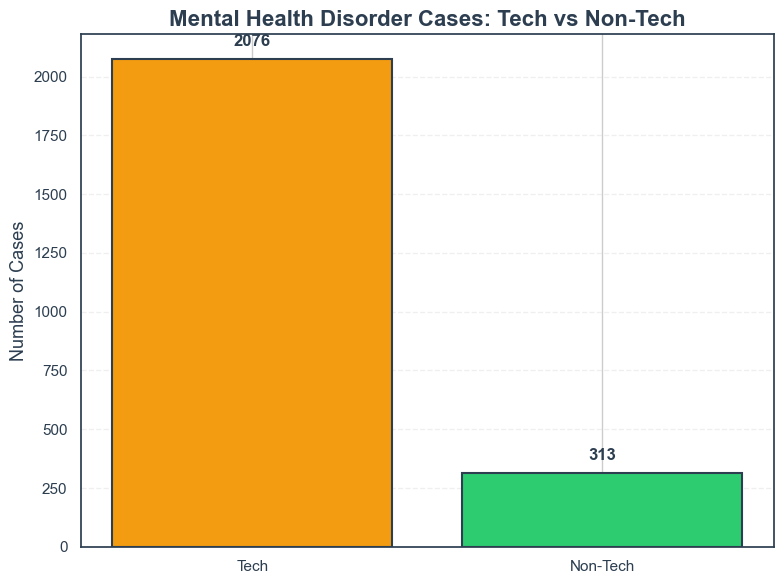

In [435]:
import matplotlib.pyplot as plt

values = [tech_mh, non_tech_mh]
labels = ["Tech", "Non-Tech"]


colors = []
for value, label in zip(values, labels):
    if label == "Tech":
        colors.append(quality_color(value, high_is_bad=True))  # تقييم Tech
    else:
        colors.append(COLORS["green"])  # Non-Tech دائمًا صحي


plt.figure(figsize=(8, 6))

bars = plt.bar(
    labels,
    values,
    color=colors,
    edgecolor=COLORS["dark"],
    linewidth=1.5
)

plt.title(
    "Mental Health Disorder Cases: Tech vs Non-Tech",
    fontsize=16,
    fontweight="bold",
    color=COLORS["dark"]
)
plt.ylabel("Number of Cases", fontsize=13, color=COLORS["dark"])

plt.grid(axis='y', linestyle="--", alpha=0.3)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(values) * 0.02,
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight="bold",
        color=COLORS["dark"]
    )

plt.tight_layout()
plt.show()

#### Percentage of healthy individuals compared to those who are with MH in tech field

In [436]:
# Filter tech workers only
tech_df = CTRl_MIND_DF[CTRl_MIND_DF["Tech Employee?"] == 1]
# Define mental health cases
mh_cases = tech_df["Do you currently have a mental health disorder?"].isin(["Yes", "Possibly"])
# Count MH vs Non-MH
tech_mh = mh_cases.sum()                       # number with MH
tech_no_mh = tech_df.shape[0] - tech_mh        # number without MH
# Calculate percentages
mh_ratio = (tech_mh / tech_df.shape[0]) * 100 if tech_df.shape[0] != 0 else 0
no_mh_ratio = (tech_no_mh / tech_df.shape[0]) * 100 if tech_df.shape[0] != 0 else 0
print("Tech Workers WITH MH Issues:", tech_mh)
print("Tech Workers WITHOUT MH Issues:", tech_no_mh)
print("Percentage WITH MH Issues:", mh_ratio, "%")
print("Percentage WITHOUT MH Issues:", no_mh_ratio, "%")


Tech Workers WITH MH Issues: 2076
Tech Workers WITHOUT MH Issues: 368
Percentage WITH MH Issues: 84.94271685761048 %
Percentage WITHOUT MH Issues: 15.057283142389524 %


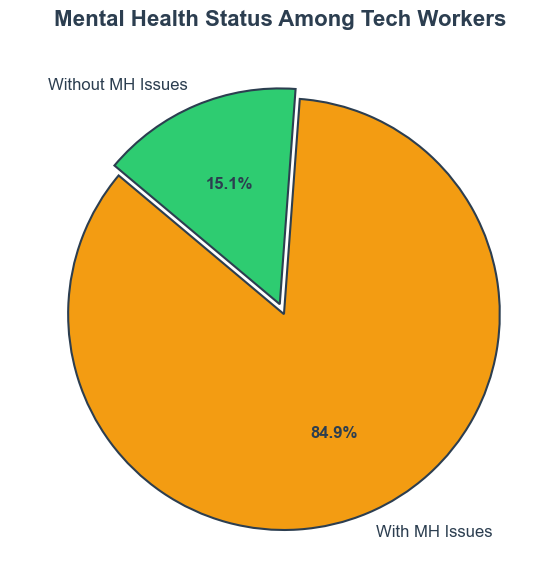

In [437]:
import matplotlib.pyplot as plt

labels = ["With MH Issues", "Without MH Issues"]
values = [tech_mh, tech_no_mh]

colors = [
    COLORS["orange"],   # MH Issues → سيء
    COLORS["green"]     # No MH Issues → جيد
]

plt.figure(figsize=(6, 6))


patches, texts, autotexts = plt.pie(
    values,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    startangle=140,
    explode=[0.05, 0],   # إبراز شريحة MH Issues قليلًا
    wedgeprops={"linewidth": 1.5, "edgecolor": COLORS["dark"]},
    textprops={"color": COLORS["dark"], "fontsize": 12}
)


for autotext in autotexts:
    autotext.set_color(COLORS["dark"])
    autotext.set_fontweight("bold")


plt.title(
    "Mental Health Status Among Tech Workers",
    fontsize=16,
    fontweight="bold",
    color=COLORS["dark"]
)

plt.tight_layout()
plt.show()

#### Gender Distribution of Tech Workers with MH issues

In [438]:
tech_df = CTRl_MIND_DF[CTRl_MIND_DF["Tech Employee?"] == 1]

tech_mh_df = tech_df[
    tech_df["Do you currently have a mental health disorder?"].isin(["Yes", "Possibly"])
]

total_gender_tech = tech_df["Gender"].value_counts()

mh_gender_counts = tech_mh_df["Gender"].value_counts()

gender_percentage = (mh_gender_counts / total_gender_tech * 100).round(2)

print(total_gender_tech)
print(mh_gender_counts)
print(gender_percentage)


Gender
Male      1988
Female     456
Name: count, dtype: int64
Gender
Male      1620
Female     456
Name: count, dtype: int64
Gender
Male       81.49
Female    100.00
Name: count, dtype: float64


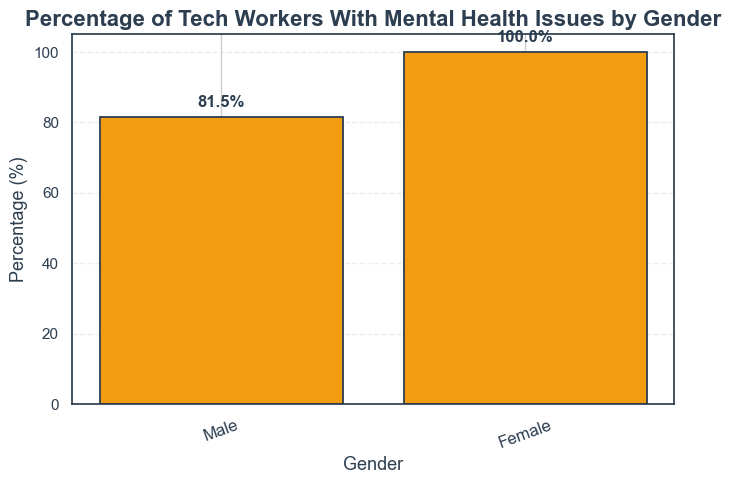

In [439]:
import matplotlib.pyplot as plt

# القيم والتسميات
values = gender_percentage.values.astype(float)
labels = gender_percentage.index

max_val = values.max()

# تحديد ألوان الجودة تلقائيًا باستخدام quality_color
# نعتبر moderate_threshold = 30% من max_val و critical_threshold = 80% من max_val
colors = [quality_color(v, high_is_bad=True, good_threshold=max_val*0.3,
                        moderate_threshold=max_val*0.6,
                        critical_threshold=max_val*0.8) for v in values]

plt.figure(figsize=(7, 5))

# رسم الأعمدة
bars = plt.bar(labels, values, color=colors, edgecolor=COLORS["dark"], linewidth=1.3)

# العنوان والمحاور
plt.title(
    "Percentage of Tech Workers With Mental Health Issues by Gender",
    fontsize=16,
    fontweight="bold",
    color=COLORS["dark"]
)
plt.xlabel("Gender", fontsize=13, color=COLORS["dark"])
plt.ylabel("Percentage (%)", fontsize=13, color=COLORS["dark"])

# Grid
plt.grid(axis='y', linestyle="--", alpha=0.35)

# إضافة القيم فوق الأعمدة
for bar, val in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        val + max_val * 0.02,
        f"{val:.1f}%",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight="bold",
        color=COLORS["dark"]
    )

plt.xticks(rotation=20, fontsize=12)
plt.tight_layout()
plt.show()

#### Age Distribution of tech workers with MH issues

In [440]:
CTRl_MIND_DF['Age'].value_counts()

Age
34    1638
30     115
28     111
35     104
27      90
37      90
32      89
31      86
33      84
36      83
29      82
38      78
39      65
26      65
40      64
42      63
25      62
24      53
23      49
41      46
45      43
44      34
22      34
46      31
43      27
47      26
49      21
21      19
48      18
50      17
53      14
52      12
51      12
20      11
57       9
19       9
54       9
55       7
56       6
59       6
58       4
60       4
18       2
Name: count, dtype: int64

In [441]:
bins = [17, 24, 29, 34, 39, 49, 60]
labels = [
    "18-24",
    "25-29",
    "30-34",
    "35-39",
    "40-49",
    "50-60"
]

# Correct dataframe name
CTRl_MIND_DF["Age_Group"] = pd.cut(CTRl_MIND_DF["Age"], bins=bins, labels=labels)

print(CTRl_MIND_DF["Age_Group"].value_counts())


Age_Group
30-34    2012
35-39     420
25-29     410
40-49     373
18-24     177
50-60     100
Name: count, dtype: int64


In [442]:
mh_filter = CTRl_MIND_DF["Do you currently have a mental health disorder?"].isin(["Yes", "Possibly"])
# حساب عدد المصابين في كل فئة عمرية
mh_by_age = CTRl_MIND_DF[mh_filter]["Age_Group"].value_counts()
# حساب إجمالي عدد كل فئة عمرية
total_by_age = CTRl_MIND_DF["Age_Group"].value_counts()
# حساب النسبة (عدد المصابين / إجمالي الفئة) × 100
mh_age_percentage = (mh_by_age / total_by_age * 100).round(2)
print("عدد المصابين في كل فئة عمرية:\n", mh_by_age)
print("\nالنسبة المئوية للمصابين في كل فئة عمرية:\n", mh_age_percentage)

عدد المصابين في كل فئة عمرية:
 Age_Group
30-34    997
40-49    373
35-39    372
25-29    370
18-24    177
50-60    100
Name: count, dtype: int64

النسبة المئوية للمصابين في كل فئة عمرية:
 Age_Group
18-24    100.00
25-29     90.24
30-34     49.55
35-39     88.57
40-49    100.00
50-60    100.00
Name: count, dtype: float64


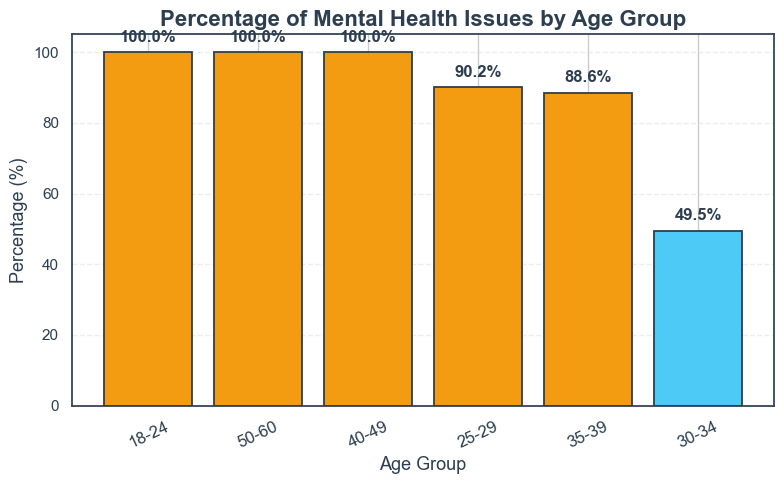

In [443]:
import matplotlib.pyplot as plt

# ترتيب البيانات تنازليًا
mh_age_percentage_sorted = mh_age_percentage.sort_values(ascending=False)
values = mh_age_percentage_sorted.values.astype(float)
labels = mh_age_percentage_sorted.index

max_val = values.max()

# تحديد الألوان باستخدام quality_color
# good_threshold = 30% من max_val, moderate_threshold = 60%, critical_threshold = 80%
colors = [
    quality_color(v, high_is_bad=True,
                  good_threshold=max_val*0.3,
                  moderate_threshold=max_val*0.6,
                  critical_threshold=max_val*0.8)
    for v in values
]

plt.figure(figsize=(8, 5))

# رسم الأعمدة
bars = plt.bar(labels, values, color=colors, edgecolor=COLORS["dark"], linewidth=1.3)

# العنوان والمحاور
plt.title(
    "Percentage of Mental Health Issues by Age Group",
    fontsize=16,
    fontweight="bold",
    color=COLORS["dark"]
)
plt.xlabel("Age Group", fontsize=13, color=COLORS["dark"])
plt.ylabel("Percentage (%)", fontsize=13, color=COLORS["dark"])

# Grid خفيفة للمحور Y
plt.grid(axis='y', linestyle="--", alpha=0.35)

# إضافة القيم فوق الأعمدة
for bar, val in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        val + max_val*0.02,
        f"{val:.1f}%",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight="bold",
        color=COLORS["dark"]
    )

plt.xticks(rotation=25, fontsize=12)
plt.tight_layout()
plt.show()

**Monitoring the evolution of mental health over the years**

#### Count MH cases per year

In [444]:
# Filter mental health cases
mh_filter = CTRl_MIND_DF["Do you currently have a mental health disorder?"].isin(["Yes", "Possibly"])

# Count MH cases per year
mh_by_year = CTRl_MIND_DF[mh_filter].groupby("Survey_Year").size()

print("Mental Health Cases by Year:\n", mh_by_year)

Mental Health Cases by Year:
 Survey_Year
2017    874
2018    805
2019    255
2020    234
2021    221
dtype: int64


**Percentage of MH cases per year**

In [445]:
# Total responses per year
total_by_year = CTRl_MIND_DF.groupby("Survey_Year").size()

# Percentage
mh_percentage_year = (mh_by_year / total_by_year * 100).round(2)

print("\nPercentage of MH Cases Each Year:\n", mh_percentage_year)



Percentage of MH Cases Each Year:
 Survey_Year
2017    81.76
2018    80.90
2019    59.03
2020    54.93
2021    38.77
dtype: float64


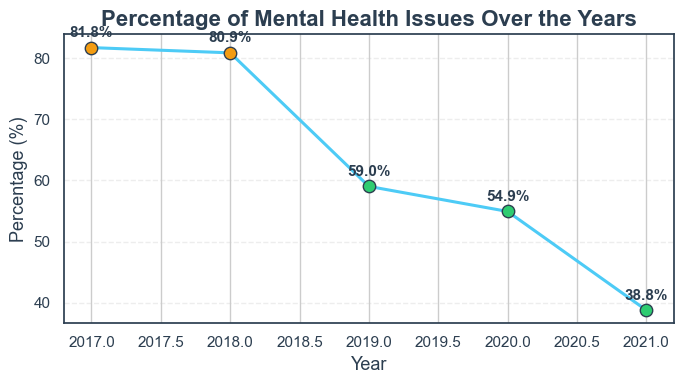

In [446]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))

years = mh_percentage_year.index
values = mh_percentage_year.values.astype(float)

# رسم الخط العام
plt.plot(
    years,
    values,
    color=COLORS["blue"],
    linewidth=2.2
)

# رسم النقاط الملونة بشكل فردي
for i, (x, y) in enumerate(zip(years, values)):
    if i < 2:
        marker_color = COLORS["orange"]   # أول سنتين خطر
    else:
        marker_color = COLORS["green"] if y <= 60 else COLORS["orange"]
    
    plt.scatter(
        x, y,
        color=marker_color,
        edgecolor=COLORS["dark"],
        s=80,       # حجم النقطة
        zorder=3
    )
    
    # كتابة القيم فوق النقاط
    plt.text(
        x, y + values.max()*0.015,
        f"{y:.1f}%",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
        color=COLORS["dark"]
    )

plt.title(
    "Percentage of Mental Health Issues Over the Years",
    fontsize=16, fontweight="bold", color=COLORS["dark"]
)
plt.xlabel("Year", fontsize=13, color=COLORS["dark"])
plt.ylabel("Percentage (%)", fontsize=13, color=COLORS["dark"])
plt.grid(axis='y', linestyle="--", alpha=0.35)

plt.tight_layout()
plt.show()

#### Distribution of  Race for tech workers With MH issues

In [447]:
# فلتر حالات الصحة النفسية
mh_filter = CTRl_MIND_DF["Do you currently have a mental health disorder?"].isin(["Yes", "Possibly"])

# عدد المصابين في كل عرق
mh_by_race = CTRl_MIND_DF[mh_filter]["What is your race?"].value_counts()

print("Number of MH cases by Race:\n", mh_by_race)


Number of MH cases by Race:
 What is your race?
White              1178
Asian               272
Native American     251
African             248
Islander            221
Australoid          219
Name: count, dtype: int64


In [448]:
# إجمالي كل عرق
total_by_race = CTRl_MIND_DF["What is your race?"].value_counts()

# النسبة المئوية لكل عرق
mh_percentage_race = ((mh_by_race / total_by_race) * 100).round(2)

print("\nPercentage of MH cases by Race:\n", mh_percentage_race)



Percentage of MH cases by Race:
 What is your race?
African            55.98
Asian              61.54
Australoid         52.39
Islander           56.52
Native American    58.51
White              86.05
Name: count, dtype: float64


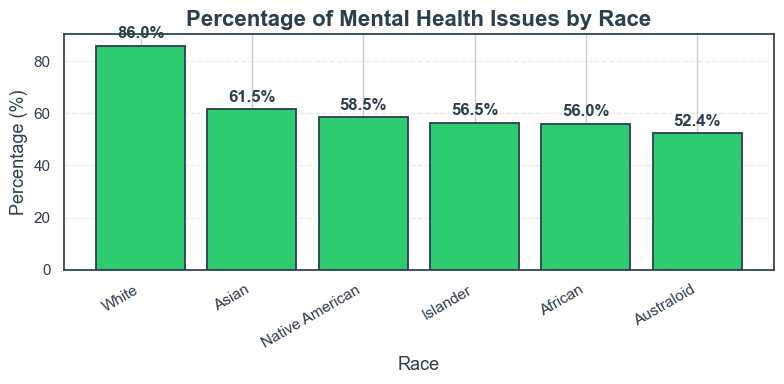

In [449]:
import matplotlib.pyplot as plt

# ترتيب القيم تنازليًا (اختياري)
values = mh_percentage_race.sort_values(ascending=False)
labels = values.index

# كل الأعمدة أخضر لأنه لا توجد حالة خطرة
colors = [COLORS["green"]] * len(values)

plt.figure(figsize=(8, 4))

bars = plt.bar(
    labels,
    values,
    color=colors,
    edgecolor=COLORS["dark"],
    linewidth=1.3
)

# العنوان والمحاور
plt.title(
    "Percentage of Mental Health Issues by Race",
    fontsize=16,
    fontweight="bold",
    color=COLORS["dark"]
)
plt.xlabel("Race", fontsize=13, color=COLORS["dark"])
plt.ylabel("Percentage (%)", fontsize=13, color=COLORS["dark"])

# Grid خفيفة
plt.grid(axis='y', linestyle="--", alpha=0.35)

# إضافة القيم فوق الأعمدة
max_val = values.max()
for bar, val in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        val + max_val * 0.02,
        f"{val:.1f}%",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight="bold",
        color=COLORS["dark"]
    )

plt.xticks(rotation=30, ha='right', fontsize=11)
plt.tight_layout()
plt.show()

### B)Past Psychological State Reasons

#### Does Employers who suffer from MH disorder Were work before or this is the first job?

In [450]:
mh_workers = CTRl_MIND_DF[
    CTRl_MIND_DF['Do you currently have a mental health disorder?'].isin(['Yes', 'Possibly'])
]

q1 = CTRl_MIND_DF['Do you have previous employers?'].value_counts()

print("هل العمال الذين يعانون من مشكلات نفسية كانوا يعملون من قبل؟")
print(q1)

هل العمال الذين يعانون من مشكلات نفسية كانوا يعملون من قبل؟
Do you have previous employers?
1    2366
0    1126
Name: count, dtype: int64


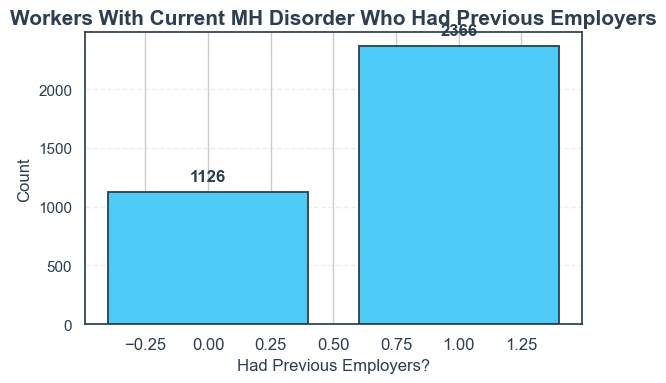

In [451]:
import matplotlib.pyplot as plt

values = q1.values
labels = q1.index

# كل الأعمدة لون محايد (مثلاً أزرق)
colors = [COLORS["blue"]] * len(values)

plt.figure(figsize=(6, 4))

bars = plt.bar(
    labels,
    values,
    color=colors,
    edgecolor=COLORS["dark"],
    linewidth=1.3
)

plt.title(
    "Workers With Current MH Disorder Who Had Previous Employers",
    fontsize=15,
    fontweight="bold",
    color=COLORS["dark"]
)

plt.xlabel("Had Previous Employers?", fontsize=12, color=COLORS["dark"])
plt.ylabel("Count", fontsize=12, color=COLORS["dark"])

plt.grid(axis='y', linestyle="--", alpha=0.35)

# إضافة القيم فوق الأعمدة
max_val = values.max()
for bar, val in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        val + max_val*0.03,
        f"{val}",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight="bold",
        color=COLORS["dark"]
    )

plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

#### If it is not the first job and they currently suffer from MH Issues, were they suffer in the past?

In [452]:
# 1 — Filter workers who currently have MH disorder (Yes / Possibly)
mh_workers = CTRl_MIND_DF[
    CTRl_MIND_DF['Do you currently have a mental health disorder?'].isin(['Yes', 'Possibly'])
]

# 2 — Filter tech employees only
mh_tech = mh_workers[mh_workers['Tech Employee?'] == 1]

# 3 — Filter workers who have previous employers
mh_prev = mh_tech[mh_tech['Do you have previous employers?'] == 1]

# 4 — Count previous diagnosis
q2 = mh_prev['Have you ever been diagnosed with a mental health disorder?'].value_counts()

print("هل كانوا يعانون من قبل (تشخيص سابق)؟")
print(q2)

هل كانوا يعانون من قبل (تشخيص سابق)؟
Have you ever been diagnosed with a mental health disorder?
Yes    999
No     545
Name: count, dtype: int64


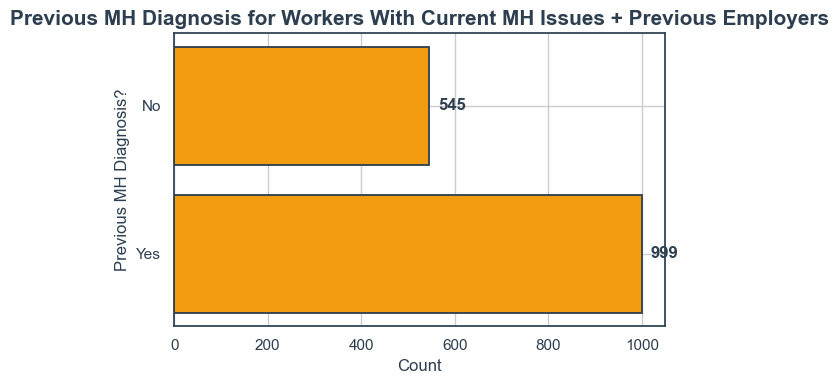

In [453]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# رسم الأعمدة الأفقية
bars = plt.barh(
    q2.index,
    q2.values,
    color=COLORS["orange"],      # لون البرتقالي للخطر
    edgecolor=COLORS["dark"],
    linewidth=1.3
)

# العنوان والمحاور
plt.title(
    "Previous MH Diagnosis for Workers With Current MH Issues + Previous Employers",
    fontsize=15,
    fontweight="bold",
    color=COLORS["dark"]
)
plt.xlabel("Count", fontsize=12, color=COLORS["dark"])
plt.ylabel("Previous MH Diagnosis?", fontsize=12, color=COLORS["dark"])

# إضافة القيم على الأعمدة
for bar, val in zip(bars, q2.values):
    plt.text(
        val + max(q2.values)*0.02,
        bar.get_y() + bar.get_height()/2,
        f"{val}",
        va='center',
        fontsize=12,
        fontweight="bold",
        color=COLORS["dark"]
    )

plt.tight_layout()
plt.show()

#### If They have previous employers and were diagnosed with a mental health disorder ,Is there a Family History with MH Disorder? 

In [454]:
# Filter people who:
# 1) Have previous employers
# 2) Were diagnosed with a mental health disorder

filtered = CTRl_MIND_DF[
    (CTRl_MIND_DF['Do you have previous employers?'] == 1) &
    (CTRl_MIND_DF['Have you ever been diagnosed with a mental health disorder?'] == 'Yes')
]

# Check if they have family history of mental illness
result = filtered['Do you have a family history of mental illness?'].value_counts(dropna=False)
print(result)

Do you have a family history of mental illness?
No              1010
Yes              294
I don't know     163
Name: count, dtype: int64


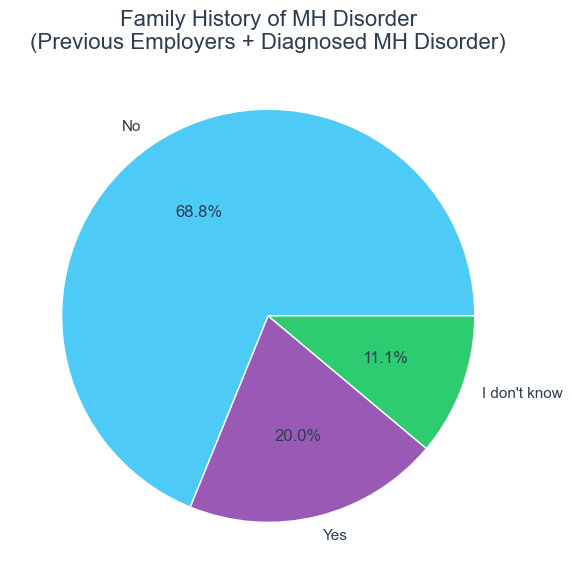

In [455]:
plt.figure()
plt.pie(result, labels=result.index, autopct='%1.1f%%')
plt.title("Family History of MH Disorder\n(Previous Employers + Diagnosed MH Disorder)")
plt.tight_layout()
plt.show()


#### Are they Expatriate from their Families which make them suffer 

In [456]:
# 1) اختيار الأشخاص الذين كان لديهم وظائف سابقة
prev_workers = CTRl_MIND_DF[
    CTRl_MIND_DF['Do you have previous employers?'].astype(str).str.lower().isin(['yes', '1', 'true'])
]

# 2) من هؤلاء، نختار الذين كانوا يعانون من اضطراب نفسي في الماضي
past_mh = prev_workers[
    prev_workers['Have you ever been diagnosed with a mental health disorder?']
    .astype(str).str.lower().isin(['yes', 'possibly'])
]

# 3) الآن نعرف هل كانوا Expatriates بعاد عن عائلتهم
result = past_mh['Is_Expatriate'].value_counts(dropna=False)

print("هل الناس الذين كانوا يعملون سابقاً وكانوا يعانون من اضطراب نفسي هم Expatriates؟")
print(result)


هل الناس الذين كانوا يعملون سابقاً وكانوا يعانون من اضطراب نفسي هم Expatriates؟
Is_Expatriate
True     1214
False     253
Name: count, dtype: int64


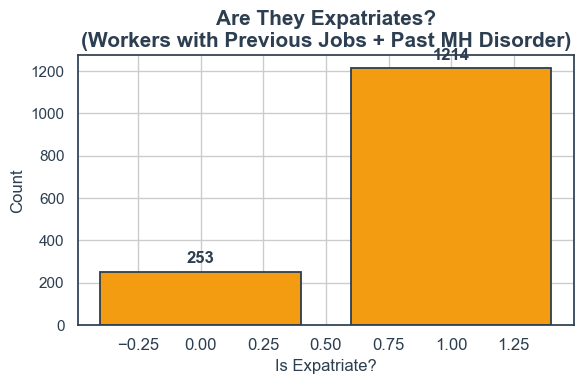

In [457]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# تحويل result لقائمة من القيم إذا لم يكن Series
values = result.values if hasattr(result, 'values') else result
labels = result.index if hasattr(result, 'index') else range(len(values))

# كل الأعمدة برتقالي لأنها تمثل حالات مرتبطة بالاضطراب النفسي
colors = [COLORS["orange"]] * len(values)

bars = plt.bar(labels, values, color=colors, edgecolor=COLORS["dark"], linewidth=1.3)

plt.title(
    "Are They Expatriates?\n(Workers with Previous Jobs + Past MH Disorder)",
    fontsize=15,
    fontweight="bold",
    color=COLORS["dark"]
)
plt.xlabel("Is Expatriate?", fontsize=12, color=COLORS["dark"])
plt.ylabel("Count", fontsize=12, color=COLORS["dark"])
plt.xticks(rotation=0, fontsize=12)

# إضافة القيم فوق الأعمدة
max_val = max(values)
for bar, val in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        val + max_val*0.02,
        f"{int(val)}",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight="bold",
        color=COLORS["dark"]
    )

plt.tight_layout()
plt.show()

#### Are they Resident far from Work which make them suffer

In [458]:
# 1) اختيار الأشخاص الذين كان لديهم وظائف سابقة
prev_workers = CTRl_MIND_DF[
    CTRl_MIND_DF['Do you have previous employers?']
    .astype(str).str.lower().isin(['yes', '1', 'true'])
]

# 2) اختيار الذين كانوا يعانون من اضطراب نفسي في الماضي
past_mh = prev_workers[
    prev_workers['Have you ever been diagnosed with a mental health disorder?']
    .astype(str).str.lower().isin(['yes', 'possibly'])
]

# 3) حساب: هل يسكنون بعيداً عن العمل؟
result = past_mh['Residence_far_from_Work'].value_counts(dropna=False)

print("هل الأشخاص الذين كانوا يعملون سابقاً ويعانون من اضطراب نفسي في الماضي يسكنون بعيداً عن العمل؟")
print(result)


هل الأشخاص الذين كانوا يعملون سابقاً ويعانون من اضطراب نفسي في الماضي يسكنون بعيداً عن العمل؟
Residence_far_from_Work
True     1321
False     146
Name: count, dtype: int64


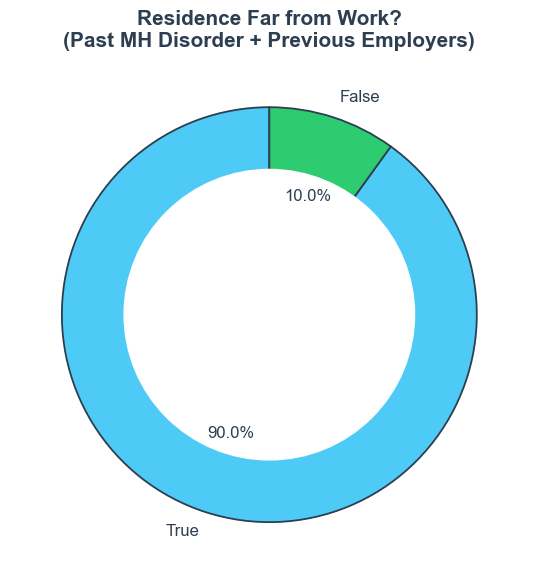

In [459]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

colors = [COLORS["blue"], COLORS["green"]]  # تخصيص ألوان حسب الفئات

# الرسم الدائري الأساسي
wedges, texts, autotexts = plt.pie(
    result,
    labels=result.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": COLORS["dark"], "linewidth": 1.3},
    textprops={"color": COLORS["dark"], "fontsize":12}
)

# إضافة دائرة داخلية لعمل شكل Donut
centre_circle = plt.Circle((0,0), 0.70, fc=COLORS["white"])
plt.gca().add_artist(centre_circle)

plt.title(
    "Residence Far from Work?\n(Past MH Disorder + Previous Employers)",
    fontsize=15,
    fontweight="bold",
    color=COLORS["dark"]
)
plt.tight_layout()
plt.show()

#### if worker was suffer from MH in the past ,Were that because his previous Company polices? 
####     were their scores about their compaines importance of mental health were as physical health or Not?
     

In [460]:
# 1) اختيار الناس اللي كان عندها وظائف سابقة
prev_workers = CTRl_MIND_DF[
    CTRl_MIND_DF['Do you have previous employers?']
    .astype(str).str.lower().isin(['yes', '1', 'true'])
]

# 2) اختيار اللي كانوا بيعانوا من اضطراب نفسي في الماضي
past_mh = prev_workers[
    prev_workers['Have you ever been diagnosed with a mental health disorder?']
    .astype(str).str.lower().isin(['yes', 'possibly'])
]

# 3) مقارنة اهتمام الشركة بالصحة النفسية VS الجسدية
past_mh['MH_vs_PH'] = past_mh.apply(
    lambda row: 'Equal' if row['Overall_MH_Importance_Score'] == row['Overall_PH_Importance_Score']
    else ('MH < PH' if row['Overall_MH_Importance_Score'] < row['Overall_PH_Importance_Score']
          else 'MH > PH'),
    axis=1
)

# 4) نحسب النتيجة
result = past_mh['MH_vs_PH'].value_counts(dropna=False)

print("هل اهتمام الشركات بالصحة النفسية كان مساوي أو أقل أو أكبر من اهتمامهم بالصحة الجسدية؟")
print(result)

هل اهتمام الشركات بالصحة النفسية كان مساوي أو أقل أو أكبر من اهتمامهم بالصحة الجسدية؟
MH_vs_PH
MH < PH    982
MH > PH    317
Equal      168
Name: count, dtype: int64


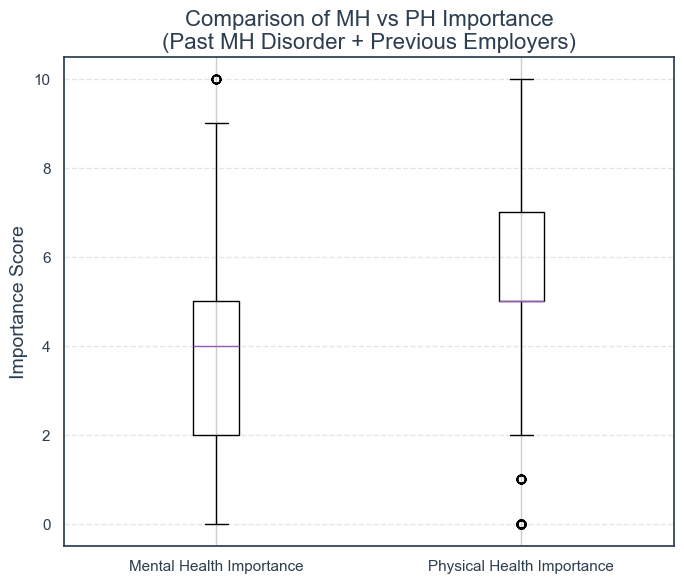

In [461]:
import matplotlib.pyplot as plt

# Filter group: previous employers + past mental health disorder
filtered = CTRl_MIND_DF[
    (CTRl_MIND_DF['Do you have previous employers?'] == 1) &
    (CTRl_MIND_DF['Have you ever been diagnosed with a mental health disorder?'] == 'Yes')
]

# Create a DataFrame for plotting
box_data = {
    "Mental Health Importance": filtered['Overall_MH_Importance_Score'],
    "Physical Health Importance": filtered['Overall_PH_Importance_Score']
}

plt.figure(figsize=(7,6))

plt.boxplot(box_data.values(), labels=box_data.keys())

plt.title("Comparison of MH vs PH Importance\n(Past MH Disorder + Previous Employers)")
plt.ylabel("Importance Score")

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### C) Current Psychological State Reasons: 

#### if worker Currently Suffer from MH disorder , is that Because his current company?

In [462]:
# اختيار العمال الذين يعانون حاليًا من اضطراب نفسي
current_mh = CTRl_MIND_DF[
    CTRl_MIND_DF['Do you currently have a mental health disorder?'].isin(['Yes', 'Possibly'])
]

# حساب الفرق بين اهتمام الشركة بالصحة الجسدية والنفسية
current_mh['Importance_Diff'] = (
    current_mh['Overall, how much importance does your employer place on physical health?'] -
    current_mh['Overall, how much importance does your employer place on mental health?']
)

# تصنيف السبب
current_mh['Company_Reason'] = current_mh['Importance_Diff'].apply(
    lambda x: 'Company Likely a Reason' if x > 0 
              else ('Equal Importance' if x == 0 else 'Company Not a Reason')
)

reason_counts = current_mh['Company_Reason'].value_counts()
print(reason_counts)


Company_Reason
Company Likely a Reason    1577
Equal Importance            551
Company Not a Reason        261
Name: count, dtype: int64


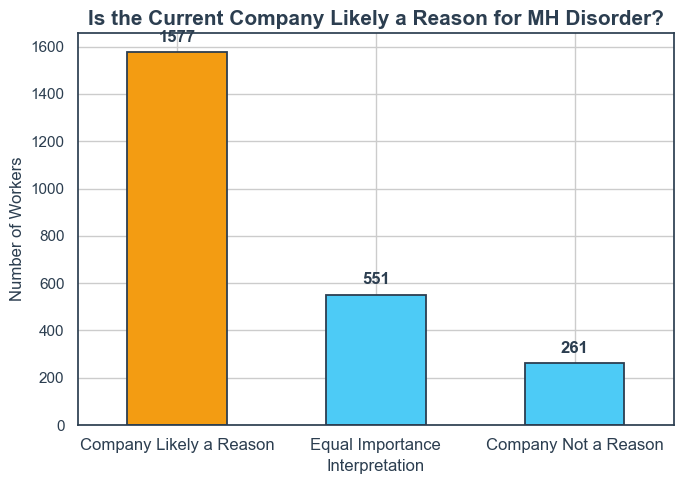

In [463]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

# تلوين الأعمدة حسب الخطر
colors = [
    COLORS["orange"] if label == "Company Likely a Reason" else COLORS["blue"]
    for label in reason_counts.index
]

bars = reason_counts.plot(
    kind='bar',
    color=colors,
    edgecolor=COLORS["dark"],
    linewidth=1.3
)

plt.title(
    "Is the Current Company Likely a Reason for MH Disorder?",
    fontsize=15,
    fontweight="bold",
    color=COLORS["dark"]
)
plt.xlabel("Interpretation", fontsize=12, color=COLORS["dark"])
plt.ylabel("Number of Workers", fontsize=12, color=COLORS["dark"])
plt.xticks(rotation=0, fontsize=12)

# إضافة القيم فوق الأعمدة
max_val = reason_counts.max()
for i, val in enumerate(reason_counts.values):
    plt.text(
        i,
        val + max_val*0.02,
        f"{int(val)}",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight="bold",
        color=COLORS["dark"]
    )

plt.tight_layout()
plt.show()

#### Distribution of Company categories with ratio of workers with MH issues? 

In [465]:
company_col = "Company_Size_Category"

total_by_company = CTRl_MIND_DF[company_col].value_counts()

mh_df = CTRl_MIND_DF[CTRl_MIND_DF["Do you currently have a mental health disorder?"].isin(['Yes', 'Possibly'])]

mh_by_company = mh_df[company_col].value_counts()

company_mh_ratio = (mh_by_company / total_by_company * 100).fillna(0).round(2)

print("Total workers by company type:\n", total_by_company)
print("\nWorkers with MH issues by company type:\n", mh_by_company)
print("\nRatio of MH issues within each company type:\n", company_mh_ratio)


Total workers by company type:
 Company_Size_Category
Medium        1339
Small          902
Enterprise     812
Large          439
Name: count, dtype: int64

Workers with MH issues by company type:
 Company_Size_Category
Medium        984
Enterprise    626
Small         524
Large         255
Name: count, dtype: int64

Ratio of MH issues within each company type:
 Company_Size_Category
Enterprise    77.09
Large         58.09
Medium        73.49
Small         58.09
Name: count, dtype: float64


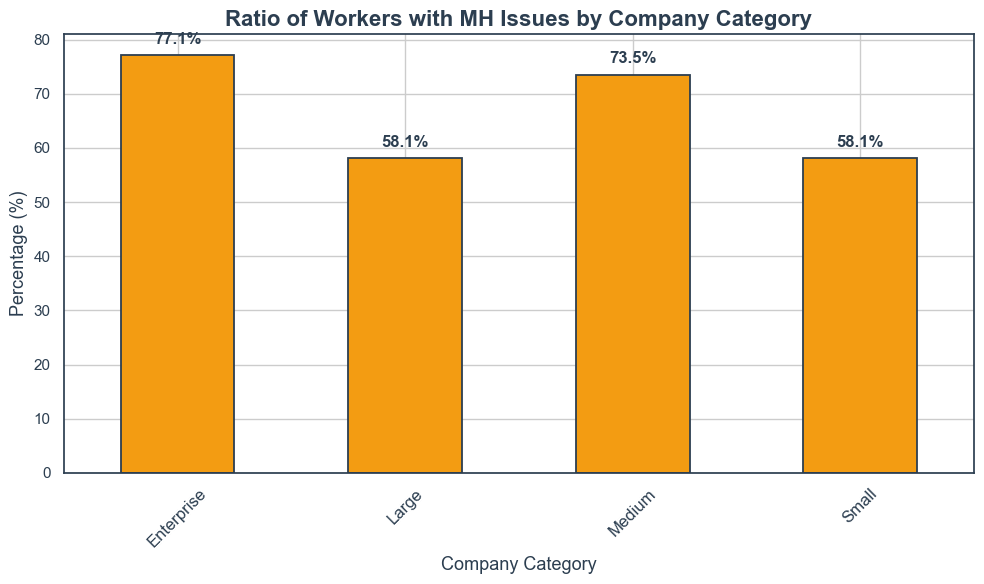

In [466]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# تحديد الألوان حسب مستوى النسبة
max_val = company_mh_ratio.max()
colors = [
    COLORS["orange"] if val > max_val*0.5 else COLORS["blue"]
    for val in company_mh_ratio.values
]

bars = company_mh_ratio.plot(
    kind='bar',
    color=colors,
    edgecolor=COLORS["dark"],
    linewidth=1.3
)

plt.title(
    "Ratio of Workers with MH Issues by Company Category",
    fontsize=16,
    fontweight="bold",
    color=COLORS["dark"]
)
plt.xlabel("Company Category", fontsize=13, color=COLORS["dark"])
plt.ylabel("Percentage (%)", fontsize=13, color=COLORS["dark"])
plt.xticks(rotation=45, fontsize=12)

# إضافة القيم فوق الأعمدة
for i, val in enumerate(company_mh_ratio.values):
    plt.text(
        i,
        val + max_val*0.02,
        f"{val:.1f}%",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight="bold",
        color=COLORS["dark"]
    )

plt.tight_layout()
plt.show()

#### which company categories provide mental health more? 

In [467]:
CTRl_MIND_DF['Overall, how much importance does your employer place on physical health?'].value_counts()

Overall, how much importance does your employer place on physical health?
6     1884
7      352
8      316
5      313
9      177
10     170
3      106
4       85
2       65
1       24
Name: count, dtype: int64

In [469]:
mh_by_company = CTRl_MIND_DF.groupby("Company_Size_Category")[
    "Overall, how much importance does your employer place on mental health?"
].mean()

ph_by_company = CTRl_MIND_DF.groupby("Company_Size_Category")[
    "Overall, how much importance does your employer place on physical health?"
].mean()

df_compare = pd.DataFrame({
    "Mental Health Importance": mh_by_company,
    "Physical Health Importance": ph_by_company
}).round(1).sort_index()

print("Comparison of MH vs PH Importance by Company Size:\n")
print(df_compare)

Comparison of MH vs PH Importance by Company Size:

                       Mental Health Importance  Physical Health Importance
Company_Size_Category                                                      
Enterprise                                  5.2                         6.5
Large                                       5.1                         6.3
Medium                                      5.2                         6.3
Small                                       5.1                         6.1


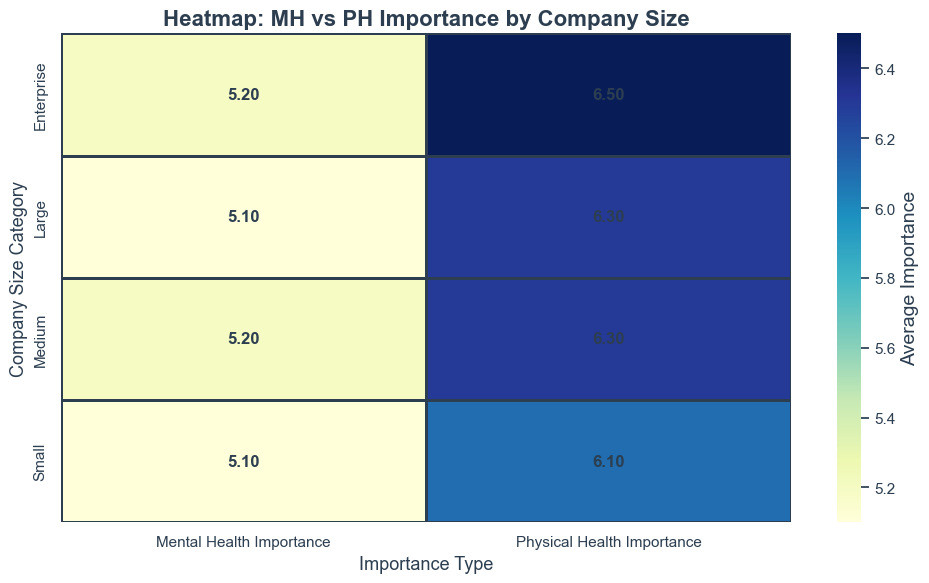

In [471]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.heatmap(
    df_compare,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",                   
    linewidths=0.8,
    linecolor=COLORS["dark"],         
    cbar_kws={'label': 'Average Importance'},
    annot_kws={"fontsize":12, "fontweight":"bold", "color": COLORS["dark"]}
)

plt.title(
    "Heatmap: MH vs PH Importance by Company Size",
    fontsize=16,
    fontweight="bold",
    color=COLORS["dark"]
)
plt.xlabel("Importance Type", fontsize=13, color=COLORS["dark"])
plt.ylabel("Company Size Category", fontsize=13, color=COLORS["dark"])

plt.tight_layout()
plt.show()

#### which company categories provide mental health more (in formal way)? 

In [472]:
CTRl_MIND_DF['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'].value_counts()

Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
No              2280
Yes              860
I don't know     352
Name: count, dtype: int64

In [473]:
CTRl_MIND_DF["formal_MH"] = CTRl_MIND_DF[
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"
].map({"Yes": 1, "No": 0})

formal_mh_by_company = CTRl_MIND_DF.groupby("Company_Size_Category")["formal_MH"].mean() * 100


formal_mh_by_company = formal_mh_by_company.round(1)

print("Percentage of Companies That Formally Discuss Mental Health by Company Size:\n")
print(formal_mh_by_company)


Percentage of Companies That Formally Discuss Mental Health by Company Size:

Company_Size_Category
Enterprise    38.0
Large         29.6
Medium        26.4
Small         18.6
Name: formal_MH, dtype: float64


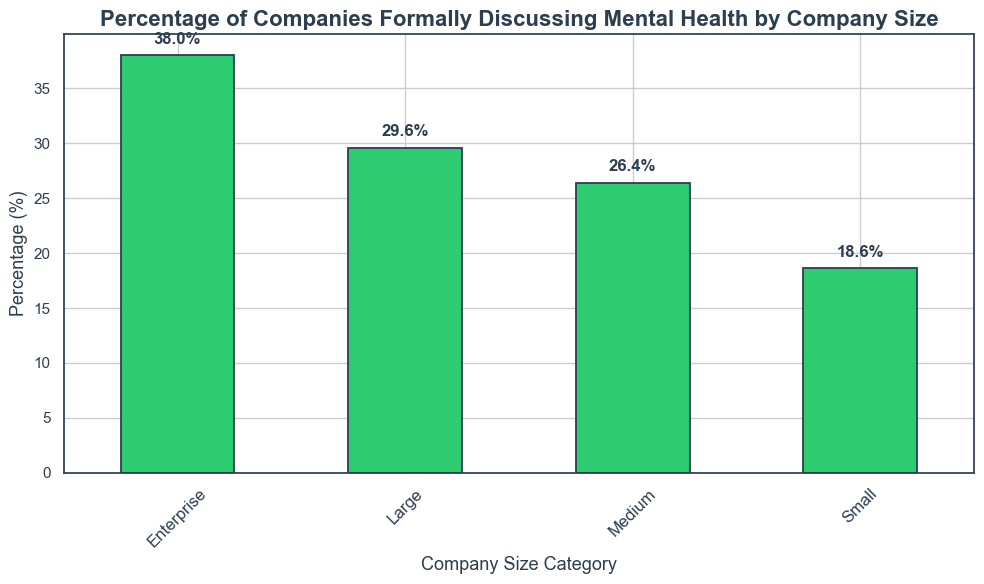

In [474]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

colors = [COLORS["green"]] * len(formal_mh_by_company)

bars = formal_mh_by_company.plot(
    kind='bar',
    color=colors,
    edgecolor=COLORS["dark"],
    linewidth=1.3
)

plt.title(
    "Percentage of Companies Formally Discussing Mental Health by Company Size",
    fontsize=16,
    fontweight="bold",
    color=COLORS["dark"]
)
plt.xlabel("Company Size Category", fontsize=13, color=COLORS["dark"])
plt.ylabel("Percentage (%)", fontsize=13, color=COLORS["dark"])
plt.xticks(rotation=45, fontsize=12)

# إضافة القيم فوق الأعمدة
max_val = formal_mh_by_company.max()
for i, val in enumerate(formal_mh_by_company.values):
    plt.text(
        i,
        val + max_val*0.02,
        f"{val:.1f}%",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight="bold",
        color=COLORS["dark"]
    )

plt.tight_layout()
plt.show()

#### How do workers with MH issues Rate their company interest of Mental health compared with physical health? 

In [477]:
mh_workers = CTRl_MIND_DF[
    CTRl_MIND_DF["Do you currently have a mental health disorder?"].isin(["Yes", "Possibly"])
]

mh_scores = mh_workers["Overall, how much importance does your employer place on mental health?"] \
                .value_counts(normalize=True).sort_index() * 100

ph_scores = mh_workers["Overall, how much importance does your employer place on physical health?"] \
                .value_counts(normalize=True).sort_index() * 100

percentage_df = pd.DataFrame({
    "Mental Health Importance (%)": mh_scores.round(2),
    "Physical Health Importance (%)": ph_scores.round(2)
}).fillna(0)

print("Percentage distribution for employees who suffer from MH issues:")
print(percentage_df)

Percentage distribution for employees who suffer from MH issues:
    Mental Health Importance (%)  Physical Health Importance (%)
1                           2.43                            1.00
2                           4.77                            2.72
3                           6.57                            4.44
4                           5.48                            3.56
5                          53.79                           13.10
6                           6.70                           33.91
7                           9.00                           13.69
8                           6.66                           13.06
9                           2.47                            7.41
10                          2.13                            7.12


<Figure size 1000x600 with 0 Axes>

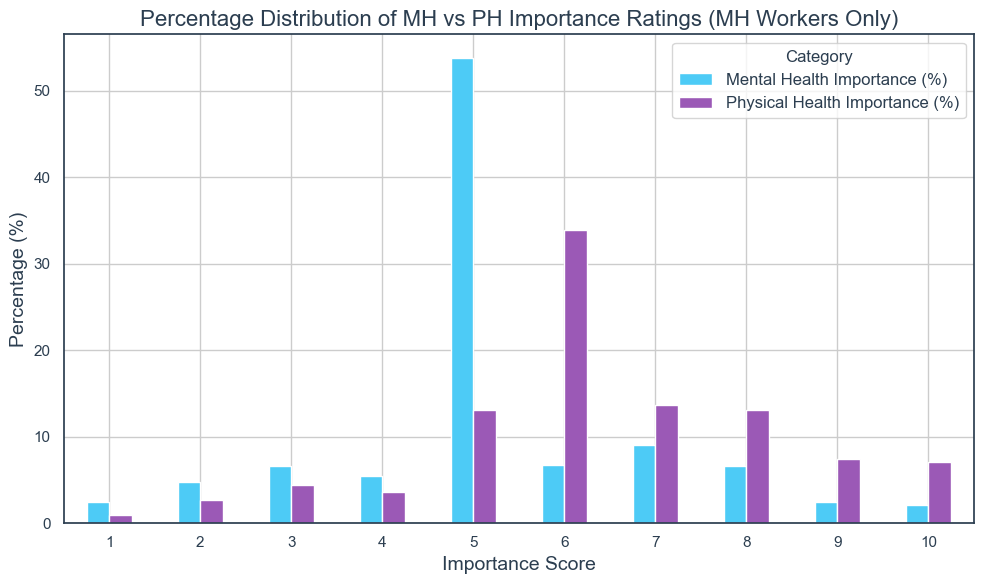

In [478]:
# Filter workers who currently suffer from Mental Health issues
mh_workers = CTRl_MIND_DF[
    CTRl_MIND_DF["Do you currently have a mental health disorder?"].isin(["Yes", "Possibly"])
]

# Percentage distributions
mh_scores = mh_workers["Overall, how much importance does your employer place on mental health?"] \
                .value_counts(normalize=True).sort_index() * 100

ph_scores = mh_workers["Overall, how much importance does your employer place on physical health?"] \
                .value_counts(normalize=True).sort_index() * 100

# Combine
percentage_df = pd.DataFrame({
    "Mental Health Importance (%)": mh_scores.round(2),
    "Physical Health Importance (%)": ph_scores.round(2)
}).fillna(0)

# --- Visualization ---

plt.figure(figsize=(10,6))
percentage_df.plot(kind='bar', figsize=(10,6))

plt.title("Percentage Distribution of MH vs PH Importance Ratings (MH Workers Only)")
plt.xlabel("Importance Score")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

####  If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? 

In [479]:
df = CTRl_MIND_DF.copy()

mh_col = "Do you currently have a mental health disorder?"
q6 = "If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?"

# --- Filter respondents who currently have (Yes OR Possibly) a MH disorder ---
df_mh = df[df[mh_col].isin(["Yes", "Possibly"])]

# --- Frequency table ---
q6_freq = (
    df_mh[q6]
    .value_counts(dropna=False)
    .rename_axis("Response")
    .reset_index(name="Count")
)

q6_freq["Percentage"] = (q6_freq["Count"] / q6_freq["Count"].sum()) * 100

print("Q6 – Difficulty Requesting Leave (Yes or Possibly have MH disorder):\n")
print(q6_freq)


Q6 – Difficulty Requesting Leave (Yes or Possibly have MH disorder):

          Response  Count  Percentage
0  not easy at all    966   40.435329
1         not easy    716   29.970699
2    i need to lie    481   20.133947
3             easy    226    9.460025


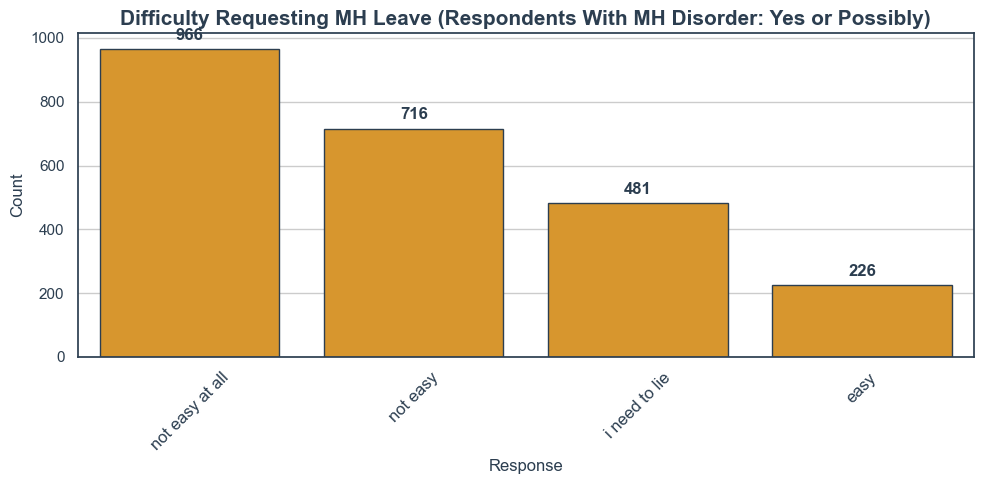

In [481]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.barplot(
    data=q6_freq, 
    x="Response", 
    y="Count", 
    color=COLORS["orange"], 
    edgecolor=COLORS["dark"]
)

plt.title(
    "Difficulty Requesting MH Leave (Respondents With MH Disorder: Yes or Possibly)",
    fontsize=15,
    fontweight="bold",
    color=COLORS["dark"]
)
plt.xlabel("Response", fontsize=12, color=COLORS["dark"])
plt.ylabel("Count", fontsize=12, color=COLORS["dark"])
plt.xticks(rotation=45, fontsize=12)

# إضافة القيم فوق الأعمدة
max_val = q6_freq["Count"].max()
for i, val in enumerate(q6_freq["Count"]):
    plt.text(
        i,
        val + max_val*0.02,
        f"{int(val)}",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight="bold",
        color=COLORS["dark"]
    )

plt.tight_layout()
plt.show()

#### Do employers in the current Company offer recourses to learn more about how to deal with MH issues?

In [482]:
df = CTRl_MIND_DF.copy()

mh_col = "Do you currently have a mental health disorder?"
q7 = "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"

# --- Filter respondents with MH disorder (Yes or Possibly) ---
df_mh = df[df[mh_col].isin(["Yes", "Possibly"])]

# --- Frequency table for employer MH resources ---
q7_freq = (
    df_mh[q7]
    .value_counts(dropna=False)
    .rename_axis("Response")
    .reset_index(name="Count")
)

q7_freq["Percentage"] = (q7_freq["Count"] / q7_freq["Count"].sum()) * 100

print("Q7 – Employer MH Resources (Only respondents with MH disorder: Yes or Possibly):\n")
print(q7_freq)


Q7 – Employer MH Resources (Only respondents with MH disorder: Yes or Possibly):

       Response  Count  Percentage
0            No   1489   62.327334
1           Yes    650   27.208037
2  I don't know    250   10.464630


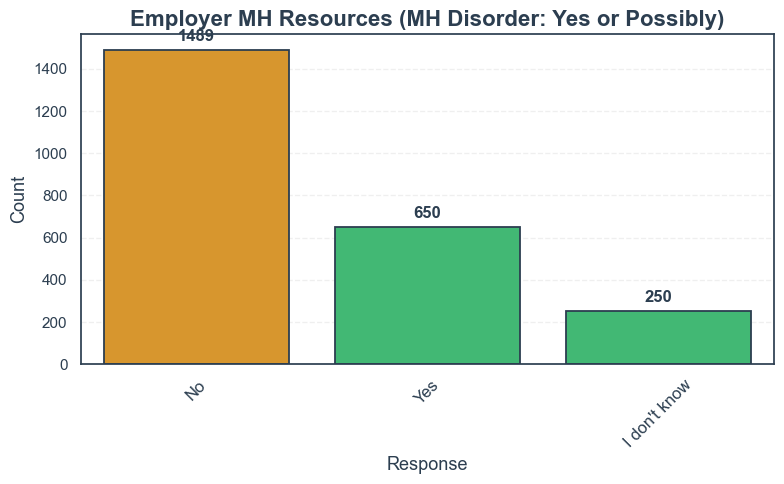

In [483]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# تحديد الألوان لكل عمود
colors = [COLORS["orange"] if resp == "No" else COLORS["green"] for resp in q7_freq["Response"]]

# رسم الأعمدة باستخدام seaborn مع الألوان المخصصة
sns.barplot(
    data=q7_freq, 
    x="Response", 
    y="Count", 
    palette=colors,
    edgecolor=COLORS["dark"],
    linewidth=1.3
)

# العنوان والمحاور
plt.title(
    "Employer MH Resources (MH Disorder: Yes or Possibly)",
    fontsize=16,
    fontweight="bold",
    color=COLORS["dark"]
)
plt.xlabel("Response", fontsize=13, color=COLORS["dark"])
plt.ylabel("Count", fontsize=13, color=COLORS["dark"])
plt.xticks(rotation=45, fontsize=12)

# إضافة القيم فوق الأعمدة
max_val = q7_freq["Count"].max()
for i, val in enumerate(q7_freq["Count"]):
    plt.text(
        i,
        val + max_val*0.02,
        f"{int(val)}",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight="bold",
        color=COLORS["dark"]
    )

# Grid خفيفة للمحور Y
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

#### which countries and cities with companies with higher rates of MH issues? 

**countries**

In [486]:
df = CTRl_MIND_DF.copy()

mh_col = "Do you currently have a mental health disorder?"
country_col = "What country do you work in?"
state_col = "US_State_work"   

df_mh = df[df[mh_col].isin(["Yes", "Possibly"])]

country_total = df[country_col].value_counts(dropna=False)

country_mh = df_mh[country_col].value_counts(dropna=False)

country_mh_rate = (
    (country_mh / country_total * 100)
    .fillna(0)
    .rename("MH_Rate(%)")
    .to_frame()
)

country_mh_rate["MH_Count"] = country_mh
country_mh_rate["Total_Workers"] = country_total

print(country_mh_rate.sort_values("MH_Rate(%)", ascending=False))


                              MH_Rate(%)  MH_Count  Total_Workers
What country do you work in?                                     
India                          71.235521       369            518
Poland                         71.017274       370            521
Germany                        70.777989       373            527
United Kingdom                 69.471624       355            511
Netherlands                    67.620751       378            559
Canada                         66.336634       335            505
United States of America       59.544160       209            351


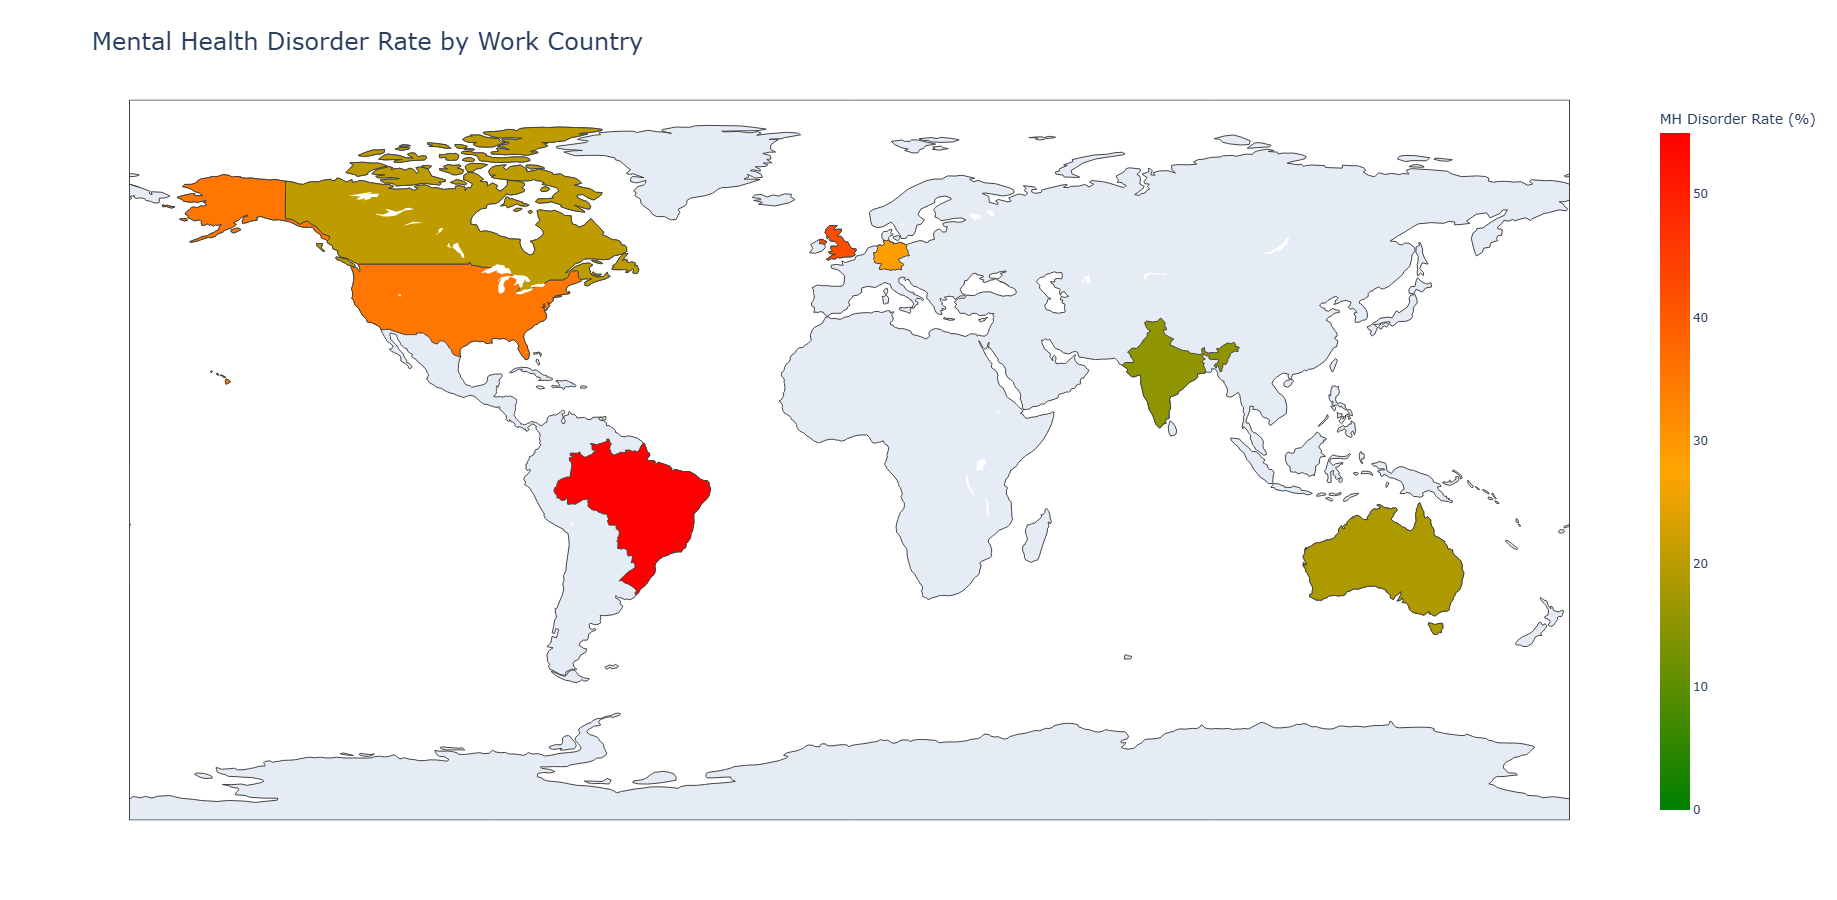

In [487]:
import pandas as pd
import plotly.express as px
country_rates = pd.DataFrame({
    "Work_Country": ["USA", "Canada", "UK", "Germany", "India", "Brazil", "Australia"],
    "MH_Disorder_Rate_%": [35.2, 20.5, 42.1, 28.7, 15.3, 55.0, 18.7]
})

world_map_df = country_rates.copy()

def mh_risk_color(rate):
    if rate < 20:
        return "Safe (Green)"
    elif rate < 50:
        return "Moderate (Orange)"
    else:
        return "High Risk (Red)"

world_map_df["Risk_Level"] = world_map_df["MH_Disorder_Rate_%"].apply(mh_risk_color)

fig = px.choropleth(
    world_map_df,
    locations="Work_Country",
    locationmode="country names",
    color="MH_Disorder_Rate_%",          
    hover_name="Work_Country",
    hover_data={"MH_Disorder_Rate_%": ':.1f', "Risk_Level": True},
    title="Mental Health Disorder Rate by Work Country",
    color_continuous_scale=["green", "orange", "red"],
    range_color=(0, world_map_df["MH_Disorder_Rate_%"].max())
)

fig.update_layout(
    width=1400,    # عرض أكبر
    height=900,    # ارتفاع أكبر
    title_font_size=24,
    coloraxis_colorbar=dict(
        title="MH Disorder Rate (%)",
        tickformat=".0f"
    )
)

fig.show()

**STATES**

In [556]:
import pandas as pd
state_col = "US_State_work"

state_total = df[state_col].value_counts(dropna=False)

state_mh = df_mh[state_col].value_counts(dropna=False)


state_mh_rate = (
    (state_mh / state_total * 100)
    .fillna(0)
    .rename("MH_Rate(%)")
    .to_frame()
)

state_mh_rate["MH_Count"] = state_mh
state_mh_rate["Total_Workers"] = state_total

print(state_mh_rate.sort_values("MH_Rate(%)", ascending=False))

                MH_Rate(%)  MH_Count  Total_Workers
US_State_work                                      
Minnesota        76.315789        87            114
Michigan         75.213675        88            117
New York         74.796748        92            123
New Jersey       74.675325       115            154
Illinois         73.809524        93            126
Texas            73.015873        92            126
Nebraska         71.698113        76            106
Washington       71.544715        88            123
Arizona          70.270270       104            148
Georgia          70.078740        89            127
Iowa             69.298246        79            114
Wisconsin        69.172932        92            133
Pennsylvania     68.794326        97            141
Florida          68.548387        85            124
Virginia         67.910448        91            134
Missouri         67.647059        69            102
Oregon           67.164179        90            134
Colorado    

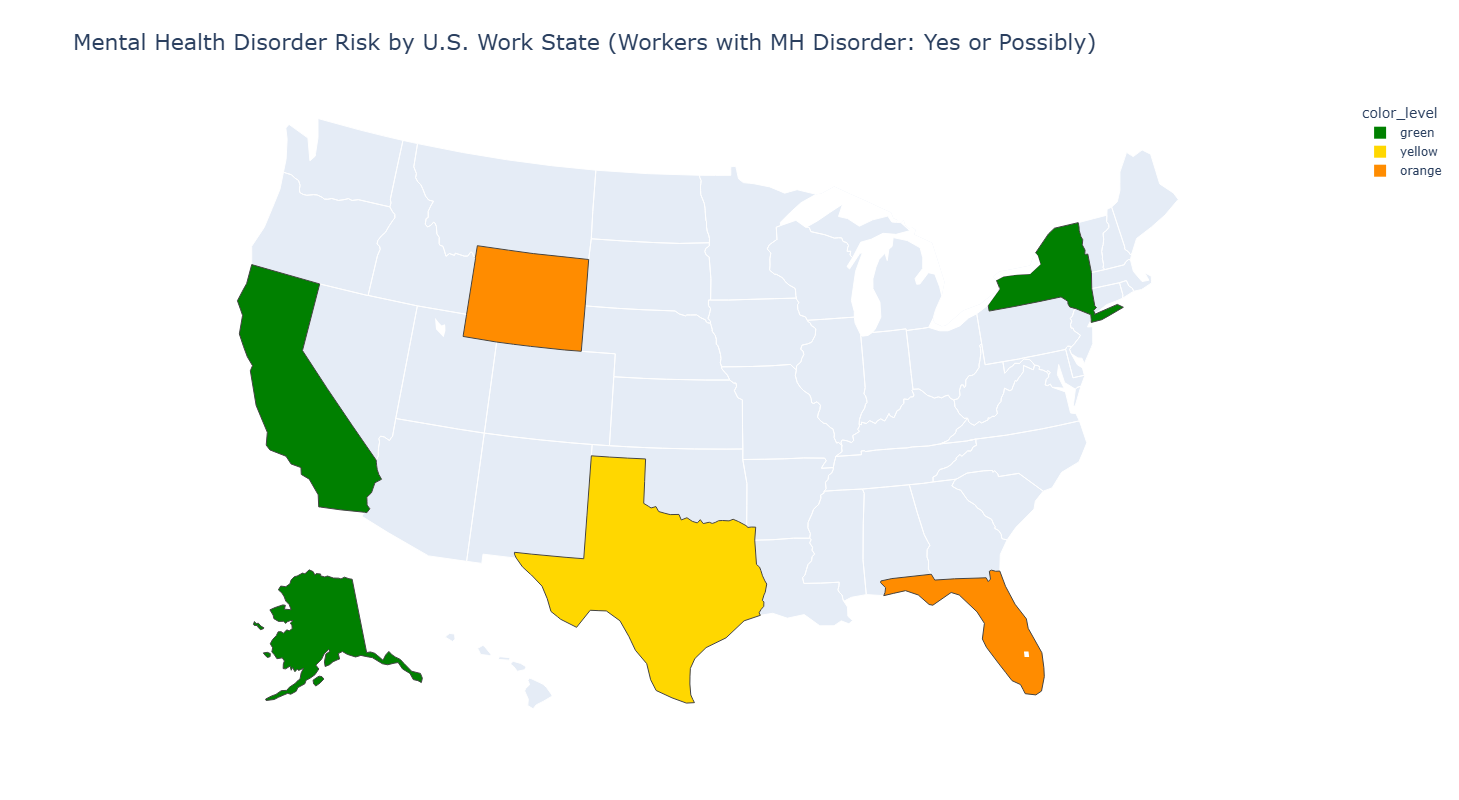

In [557]:
import pandas as pd
import plotly.express as px

data = {
    "state": ["California", "Texas", "New York", "Florida", "Alaska", "Wyoming"],
    "MH_rate": [25, 35, 28, 55, 18, 60]
}
state_rates = pd.DataFrame(data)
state_col = "state"

state_rates["state_abbrev"] = state_rates[state_col].map(us_state_to_abbrev)


def mh_level_color(rate):
    if rate < 30:
        return "green"   
    elif rate <= 50:
        return "yellow"  
    else:
        return "orange"  

state_rates["color_level"] = state_rates["MH_rate"].apply(mh_level_color)


fig = px.choropleth(
    state_rates,
    locations="state_abbrev",
    locationmode="USA-states",
    color="color_level",
    scope="usa",
    hover_name=state_col,
    hover_data={"MH_rate": True, "state_abbrev": False},
    color_discrete_map={"green": "green", "yellow": "gold", "orange": "darkorange"},
    title="Mental Health Disorder Risk by U.S. Work State (Workers with MH Disorder: Yes or Possibly)"
)


fig.update_layout(
    width=1200,   
    height=800,   
    title_font_size=22
)

fig.show()

### D) Awareness and Courage: 

**Helper Function (use for all questions)**

In [490]:
df = CTRl_MIND_DF.copy()

mh_col = "Do you currently have a mental health disorder?"

# Filter Yes or Possibly
df_mh = df[df[mh_col].isin(["Yes", "Possibly"])]
def freq_percent(df, col):
    tb = df[col].value_counts(dropna=False).reset_index()
    tb.columns = ["Response", "Count"]  # enforce correct names
    tb["Count"] = pd.to_numeric(tb["Count"], errors="coerce")
    tb["Percentage"] = (tb["Count"] / tb["Count"].sum() * 100).round(2)
    return tb



#### Sought MH treatment before?

In [491]:
q1 = "Have you ever sought treatment for a mental health disorder from a mental health professional?"
print("Sought Mental Health Treatment:")
print(freq_percent(df_mh, q1))


Sought Mental Health Treatment:
   Response  Count  Percentage
0         0   1913       80.08
1         1    476       19.92


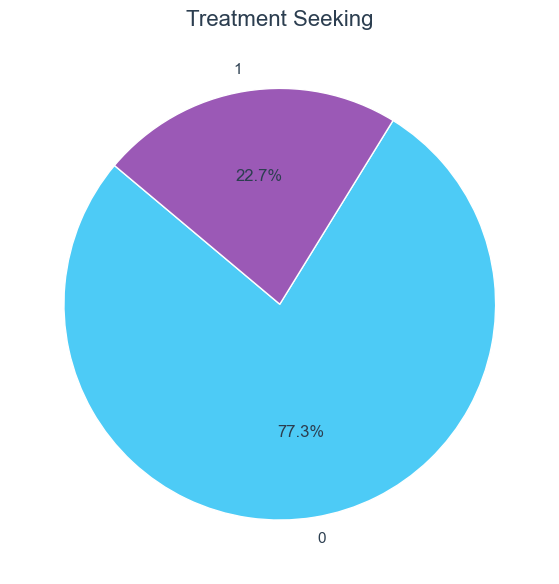

In [492]:
import matplotlib.pyplot as plt

col = "Have you ever sought treatment for a mental health disorder from a mental health professional?"
counts = df[col].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Treatment Seeking")
plt.show()


#### Aware of MH care options?

In [493]:
q2 = "aware of the options for mental health care?"
print(" Awareness of MH Care Options:")
print(freq_percent(df_mh, q2))


 Awareness of MH Care Options:
   Response  Count  Percentage
0         0   2168       90.75
1         1    221        9.25


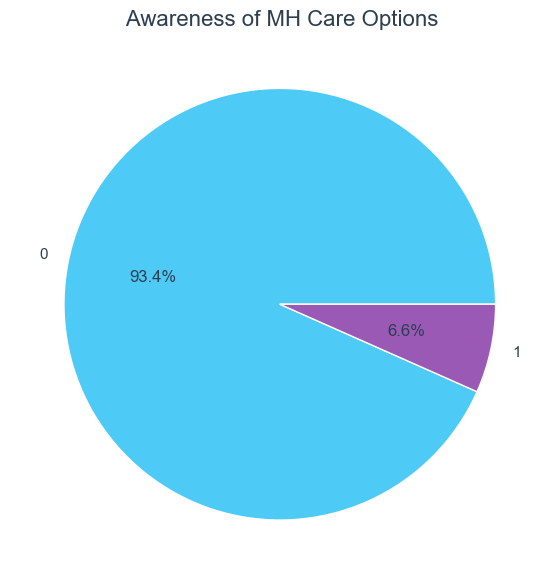

In [494]:
col = "aware of the options for mental health care?"
counts = df[col].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title(" Awareness of MH Care Options")
plt.show()


#### Willing to talk more about MH issues in tech?

In [495]:
q3 = "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?"
print("Willing to Talk More About MH Experiences:")
print(freq_percent(df_mh, q3))


Willing to Talk More About MH Experiences:
   Response  Count  Percentage
0         0   1721       72.04
1         1    668       27.96


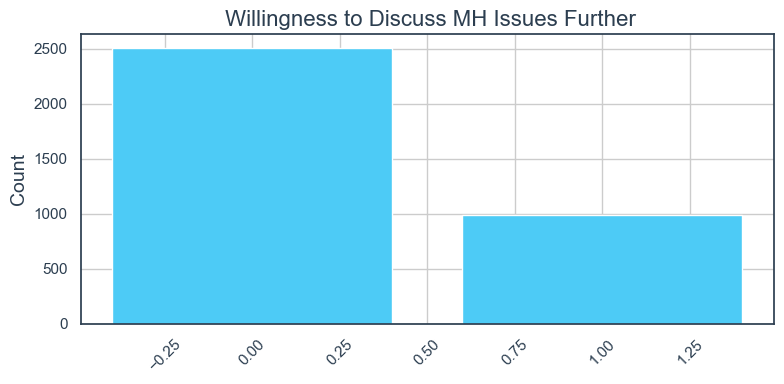

In [496]:
col = "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry?"
counts = df[col].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index, counts.values)
plt.title(" Willingness to Discuss MH Issues Further")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


#### Observing others → makes you less likely to disclose?

In [497]:
q4 = "Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?"
print("– Effect of Observing Others’ MH Disclosure:")
print(freq_percent(df_mh, q4))


– Effect of Observing Others’ MH Disclosure:
  Response  Count  Percentage
0      yes   1668       69.82
1       no    721       30.18


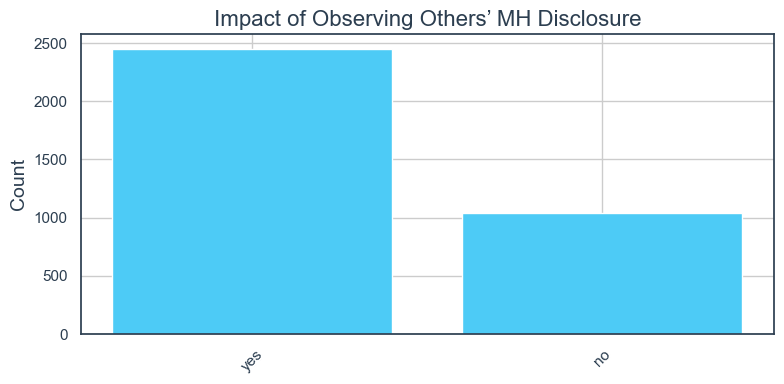

In [498]:
col = "Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?"
counts = df[col].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index, counts.values)
plt.title("Impact of Observing Others’ MH Disclosure")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


#### Courage MH vs PH

In [499]:
q5_mh = "Employee Courage Disclosing MH"
q5_ph = "Employee Courage Discussing PH"

print(" – Courage Disclosing MH:")
print(freq_percent(df_mh, q5_mh))

print("\n – Courage Discussing PH:")
print(freq_percent(df_mh, q5_ph))


 – Courage Disclosing MH:
   Response  Count  Percentage
0         1    886       37.09
1         2    718       30.05
2         0    435       18.21
3         3    292       12.22
4         4     52        2.18
5         5      6        0.25

 – Courage Discussing PH:
   Response  Count  Percentage
0         5   1170       48.97
1         2    998       41.77
2         0    221        9.25


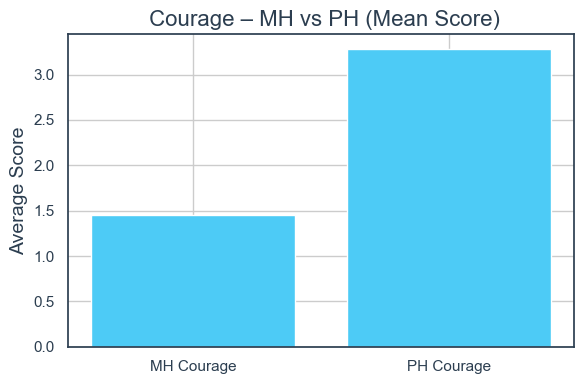

In [500]:
import numpy as np

mh = df["Employee Courage Disclosing MH"].dropna()
ph = df["Employee Courage Discussing PH"].dropna()

labels = ["MH Courage", "PH Courage"]
values = [mh.mean(), ph.mean()]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.title(" Courage – MH vs PH (Mean Score)")
plt.ylabel("Average Score")
plt.show()


#### Was anonymity protected?

In [501]:
q6 = "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?"
print(" Anonymity Protection:")
print(freq_percent(df_mh, q6))


 Anonymity Protection:
       Response  Count  Percentage
0  I don't know   1093       45.75
1           Yes    718       30.05
2            No    578       24.19


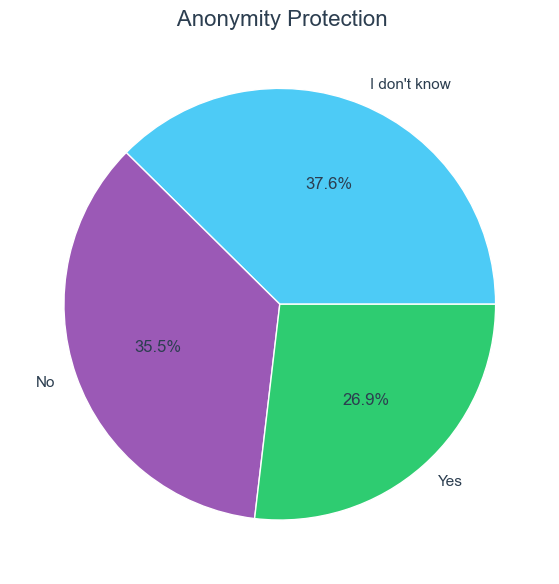

In [502]:
col = "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?"
counts = df[col].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title(" Anonymity Protection")
plt.show()


#### Describe managers' reactions

In [503]:
q7 = "Describe your Managers Reactions to your Mental Issues complaints"
print(" Manager Reaction to MH Complaints:")
print(freq_percent(df_mh, q7))


 Manager Reaction to MH Complaints:
         Response  Count  Percentage
0      Aggressive   1423       59.56
1  Not interested    733       30.68
2     Sympathetic    233        9.75


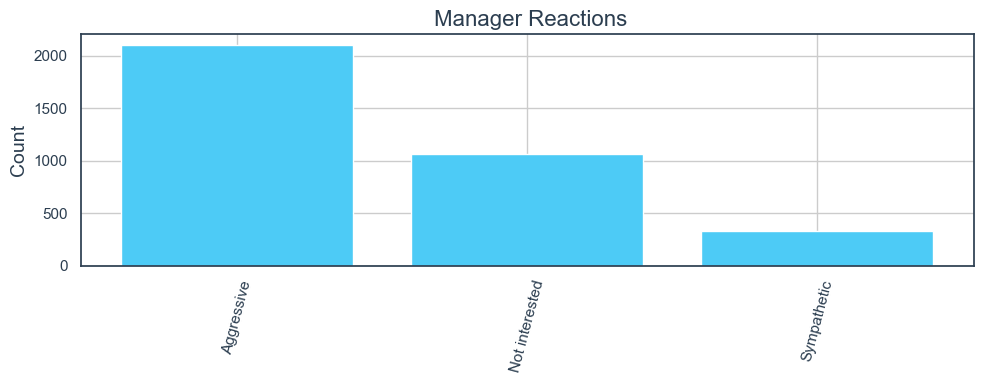

In [504]:
col = "Describe your Managers Reactions to your Mental Issues complaints"
counts = df[col].value_counts()

plt.figure(figsize=(10,4))
plt.bar(counts.index, counts.values)
plt.title(" Manager Reactions")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()


#### Experienced badly handled MH issue? 

In [505]:
q8 = "experienced badly handled response to a mental health issue"
print("Badly Handled MH Response:")
print(freq_percent(df_mh, q8))


Badly Handled MH Response:
  Response  Count  Percentage
0      yes   2156       90.25
1       no    233        9.75


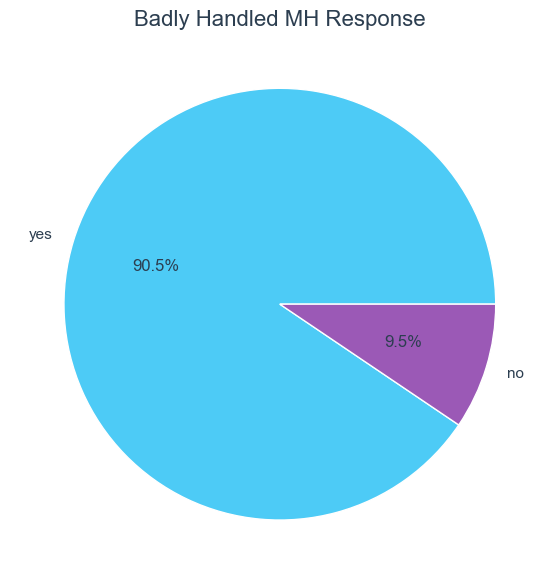

In [506]:
col = "experienced badly handled response to a mental health issue"
counts = df[col].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title("Badly Handled MH Response")
plt.show()


### E) Productivity: 

#### Is your mental health issues Impact on the relations between you and your coworkers?

In [507]:

df = CTRl_MIND_DF
q1 = 'Is your mental health issues Impact on the relations between you and your coworkers?'
counts1 = df[q1].value_counts(dropna=False)
counts1

Is your mental health issues Impact on the relations between you and your coworkers?
yes,and they offer to help    2415
no.they did not care          1077
Name: count, dtype: int64

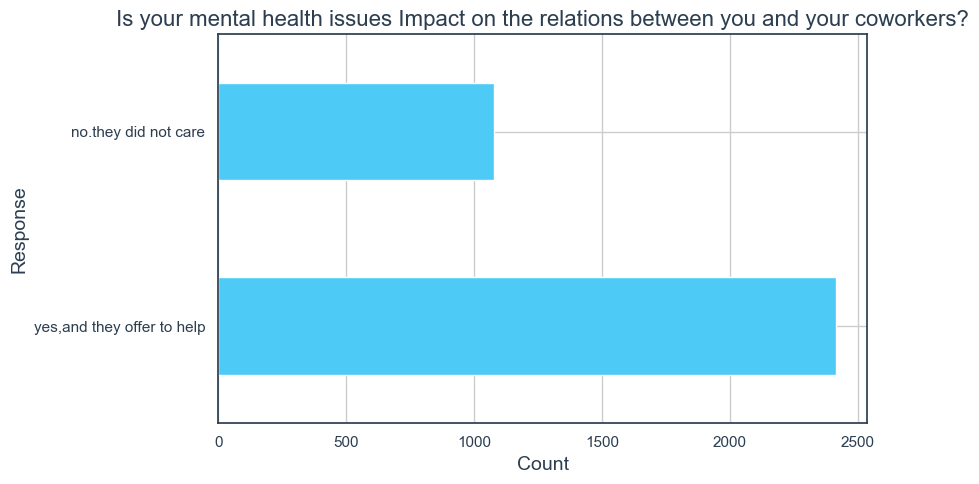

In [508]:

plt.figure(figsize=(9,5))
counts1.plot(kind='barh')
plt.title(q1)
plt.xlabel("Count")
plt.ylabel("Response")
plt.tight_layout()
plt.show()

#### Do you believe your productivity is ever affected by a mental health issue?

In [509]:
q2 = 'Do you believe your productivity is ever affected by a mental health issue?'

counts2 = df[q2].value_counts(dropna=False)
counts2

Do you believe your productivity is ever affected by a mental health issue?
yes    2423
no     1069
Name: count, dtype: int64

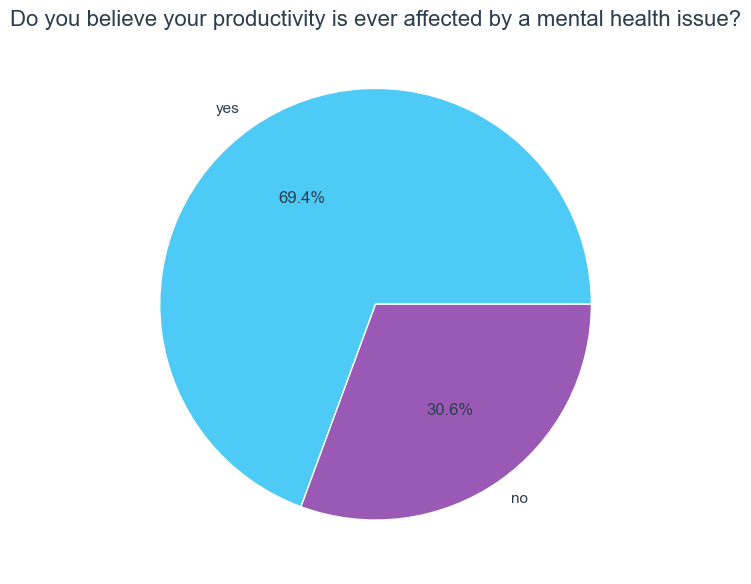

In [510]:
plt.figure(figsize=(6,6))
counts2.plot(kind='pie', autopct='%1.1f%%')
plt.title(q2)
plt.ylabel('')
plt.tight_layout()
plt.show()

#### How has it affected your career?

In [511]:
q3 = 'How has it affected your career?'
counts3 = df[q3].value_counts(dropna=False)
counts3

How has it affected your career?
my productivity decreases            1467
not affected ,I am able to manage    1069
I cannot concentrate on my job        956
Name: count, dtype: int64

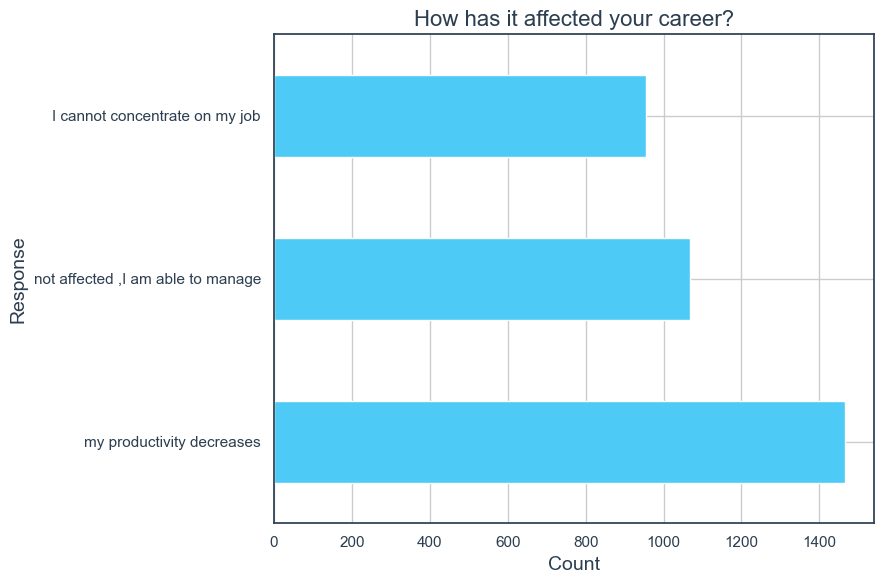

In [512]:
plt.figure(figsize=(9,6))
counts3.plot(kind='barh')
plt.title(q3)
plt.xlabel("Count")
plt.ylabel("Response")
plt.tight_layout()
plt.show()

#### Do you know local or online resources to seek help for a mental health issue?

In [513]:
q4 = 'Do you know local or online resources to seek help for a mental health issue?'
counts4 = df[q4].value_counts(dropna=False)
counts4

Do you know local or online resources to seek help for a mental health issue?
no     2090
yes    1402
Name: count, dtype: int64

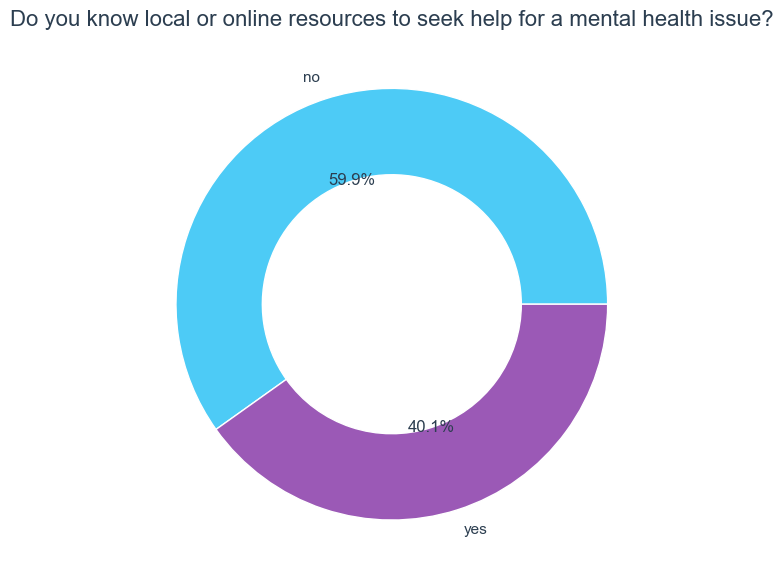

In [514]:
plt.figure(figsize=(6,6))
plt.pie(counts4, labels=counts4.index, autopct='%1.1f%%', wedgeprops={'width':0.4})
plt.title(q4)
plt.tight_layout()
plt.show()

## ForCasting

**Our Target to Forecast**

**✔ Current mental health state**

**✔ Productivity impact** 

**✔ MH resource awareness**


#### Forcasting SetUP

In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ------------------------------------------------------
# 1. SETUP
# ------------------------------------------------------
df = CTRl_MIND_DF.copy()
year_col = "Survey_Year"

metrics = {
    "Current_MH_Disorder": "Do you currently have a mental health disorder?",
    "Productivity_Affected": "Do you believe your productivity is ever affected by a mental health issue?",
    "Awareness": "Do you know local or online resources to seek help for a mental health issue?",
}

**standardize values**

In [516]:
yes_values = ["yes",1]

# standardize all values to Yes=1, No=0
def clean_yes_no(val):
    if pd.isna(val):
        return np.nan
    return 1 if str(val).strip() in yes_values else 0

**Clean the dataset**

In [517]:
for metric in metrics.values():
    df[metric] = df[metric].apply(clean_yes_no)

**FORECASTING FUNCTIONs**

In [518]:
def forecast_metric(df, year_col, metric, metric_label):

    yearly = df.groupby(year_col)[metric].mean().reset_index()
    yearly = yearly.sort_values(year_col)

    last_year = int(yearly[year_col].max())
    H = 2030 - last_year

    y = yearly[metric].values

    try:
        # Try SARIMAX first
        model = SARIMAX(y, order=(1,1,1)).fit(disp=False)
        forecast = model.get_forecast(steps=H)
        mean_forecast = forecast.predicted_mean
        ci = forecast.conf_int()
        model_used = "SARIMAX"

        # Convert CI to numpy-friendly format
        if hasattr(ci, "iloc"):
            lower = ci.iloc[:, 0].values
            upper = ci.iloc[:, 1].values
        else:
            lower = ci[:, 0]
            upper = ci[:, 1]

    except Exception as e:
        # Fallback Holt-Winters
        model = ExponentialSmoothing(y, trend="add").fit()
        mean_forecast = model.forecast(H)

        lower = mean_forecast * 0.9
        upper = mean_forecast * 1.1
        model_used = "Holt-Winters"

    forecast_years = np.arange(last_year+1, 2031)

    forecast_df = pd.DataFrame({
        "Year": forecast_years,
        "Forecast": mean_forecast,
        "Lower_CI": lower,
        "Upper_CI": upper
    })

    return yearly, forecast_df, model_used


**Forcasting Plot**

In [519]:
def plot_forecast(yearly, forecast_df, metric_label, model_used):

    plt.figure(figsize=(10,5))

    # Historical
    plt.plot(
        yearly[year_col],
        yearly[yearly.columns[1]],
        marker='o',
        label="Historical"
    )

    # Forecast
    plt.plot(
        forecast_df["Year"],
        forecast_df["Forecast"],
        marker='o',
        linestyle='--',
        label="Forecast"
    )

    # CI
    plt.fill_between(
        forecast_df["Year"],
        forecast_df["Lower_CI"],
        forecast_df["Upper_CI"],
        alpha=0.2
    )

    plt.title(f"{metric_label} Forecast to 2030 ({model_used})")
    plt.xlabel("Year")
    plt.ylabel(metric_label)
    plt.grid(True)
    plt.legend()
    plt.show()

    print("\nForecast Table:")
    print(forecast_df)
    print("\n" + "="*80 + "\n")

#### Do you currently have a mental health disorder(FORCAST)

C:\Users\3B\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



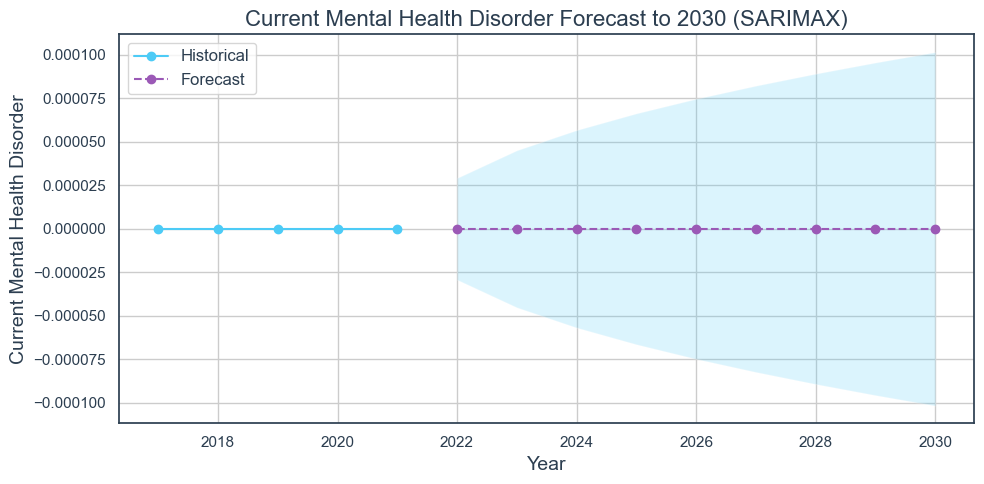


Forecast Table:
   Year  Forecast  Lower_CI  Upper_CI
0  2022       0.0 -0.000029  0.000029
1  2023       0.0 -0.000045  0.000045
2  2024       0.0 -0.000057  0.000057
3  2025       0.0 -0.000066  0.000066
4  2026       0.0 -0.000075  0.000075
5  2027       0.0 -0.000082  0.000082
6  2028       0.0 -0.000089  0.000089
7  2029       0.0 -0.000096  0.000096
8  2030       0.0 -0.000102  0.000102




In [520]:
yearly, forecast_df, model_used = forecast_metric(
    df, year_col, metrics["Current_MH_Disorder"], 
    "Current Mental Health Disorder"
)

plot_forecast(yearly, forecast_df, "Current Mental Health Disorder", model_used)


#### Has your productivity been affected by mental health(FORCASTING)

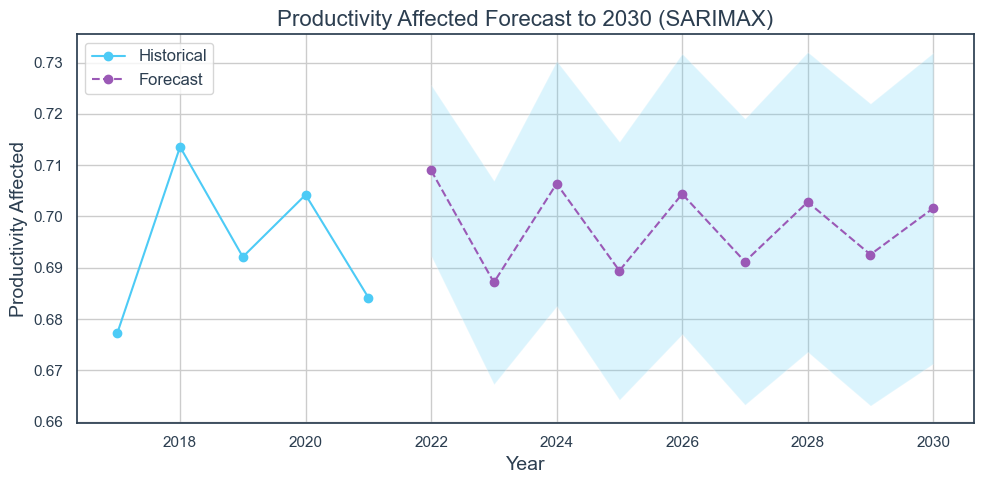


Forecast Table:
   Year  Forecast  Lower_CI  Upper_CI
0  2022  0.708983  0.692344  0.725622
1  2023  0.687148  0.667326  0.706970
2  2024  0.706394  0.682508  0.730280
3  2025  0.689430  0.664298  0.714562
4  2026  0.704382  0.677049  0.731715
5  2027  0.691203  0.663328  0.719078
6  2028  0.702820  0.673611  0.732028
7  2029  0.692580  0.663154  0.722007
8  2030  0.701605  0.671325  0.731886




In [521]:
yearly, forecast_df, model_used = forecast_metric(
    df, year_col, metrics["Productivity_Affected"], 
    "Productivity Affected"
)

plot_forecast(yearly, forecast_df, "Productivity Affected", model_used)

#### Are you aware of available mental health resources(FORCASTING)

C:\Users\3B\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



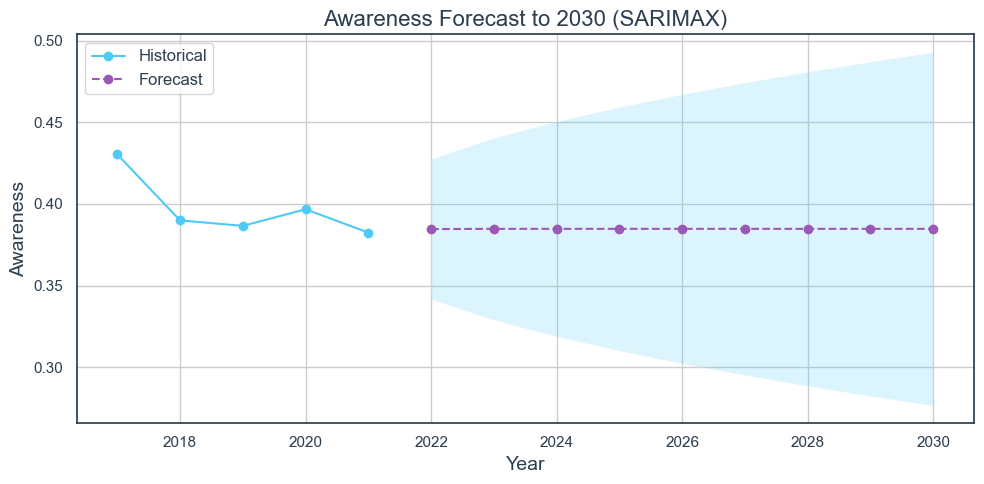


Forecast Table:
   Year  Forecast  Lower_CI  Upper_CI
0  2022  0.384618  0.341719  0.427518
1  2023  0.384752  0.329057  0.440446
2  2024  0.384760  0.318947  0.450572
3  2025  0.384760  0.310204  0.459317
4  2026  0.384760  0.302383  0.467138
5  2027  0.384760  0.295243  0.474278
6  2028  0.384760  0.288632  0.480888
7  2029  0.384760  0.282448  0.487073
8  2030  0.384760  0.276616  0.492905




In [522]:
yearly, forecast_df, model_used = forecast_metric(
    df, year_col, metrics["Awareness"], 
    "Awareness of MH Resources"
)

plot_forecast(yearly, forecast_df, "Awareness", model_used)

## ML (Random Forest)

### **Random Forest Model**

### SETUP

**Our Target using ML**

**✔ Current mental health state**

**✔ Productivity impact** 

**✔ MH resource awareness**

In [523]:
from sklearn.preprocessing import LabelEncoder

df_ml = CTRl_MIND_DF.copy()

target = "Do you currently have a mental health disorder?"

# حذف الصفوف الفارغة في الهدف
df_ml = df_ml.dropna(subset=[target])

# Label Encoding
le = LabelEncoder()
df_ml[target] = le.fit_transform(df_ml[target])

print("Classes:", le.classes_)
print(df_ml[target].value_counts())


Classes: ["Don't Know" 'No' 'Possibly' 'Yes']
Do you currently have a mental health disorder?
3    1814
1     768
2     575
0     335
Name: count, dtype: int64


**libraries Importation**

In [524]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

**Load & Prepare Data**

In [525]:
df = CTRl_MIND_DF.copy()
target = "Do you currently have a mental health disorder?"
df = df.dropna(subset=[target])


**Encode TARGET Only**

In [526]:
le_target = LabelEncoder()
df[target] = le_target.fit_transform(df[target])


**Data Encoding**

In [527]:
def convert_age(age):
    if isinstance(age, str) and "-" in age:
        a, b = age.split("-")
        return (int(a) + int(b)) / 2
    return age

if "What is your age?" in df.columns:
    df["What is your age?"] = df["What is your age?"].apply(convert_age)
label_encoders = {}

for col in df.select_dtypes(include=["object", "category"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


**Outlier Removal**

In [528]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

condition = ~(
    (df[num_cols] < (Q1 - 1.5 * IQR)) |
    (df[num_cols] > (Q3 + 1.5 * IQR))
).any(axis=1)

df_clean = df[condition]

**Train / Test Split**

In [529]:
X = df_clean.drop(columns=[target])
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

**RandomForest Training Phase**

In [530]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

### Model Evaluation

In [535]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.80      0.98      0.88        53
           2       0.88      0.64      0.74        33
           3       1.00      0.78      0.88         9

    accuracy                           0.86       113
   macro avg       0.92      0.83      0.87       113
weighted avg       0.87      0.86      0.85       113

[[17  1  0  0]
 [ 0 52  1  0]
 [ 0 12 21  0]
 [ 0  0  2  7]]


#### Confusion Matrix

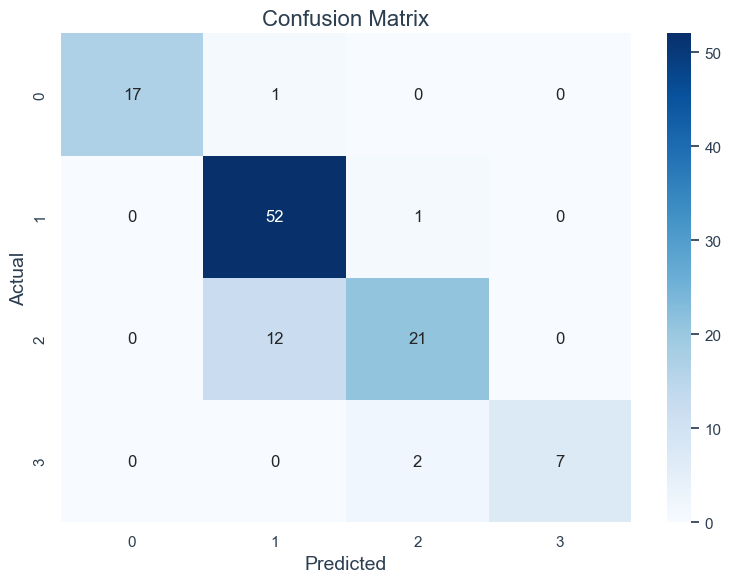

In [532]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Classification Report as Heatmap

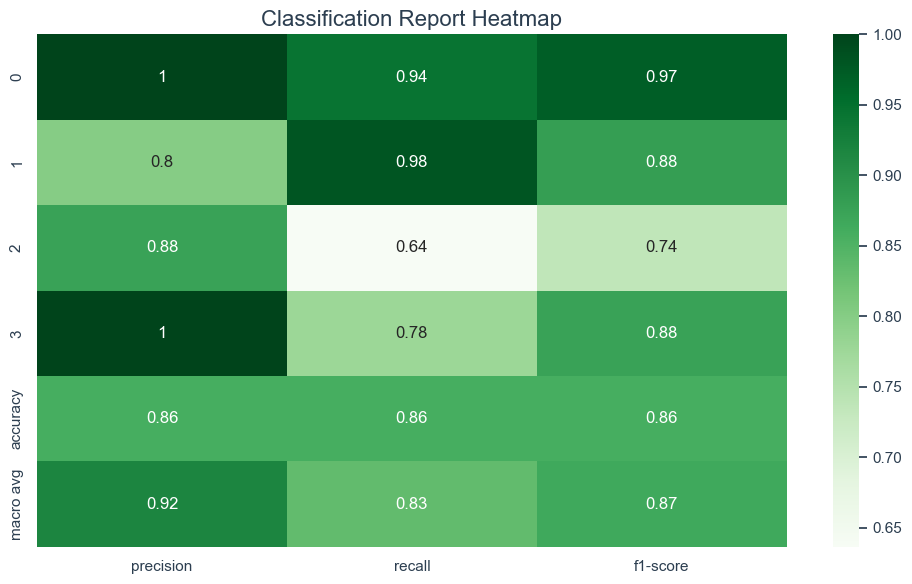

In [533]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).T

plt.figure(figsize=(10,6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Greens")
plt.title("Classification Report Heatmap")
plt.show()

#### Feature Importance (Top 20 only)

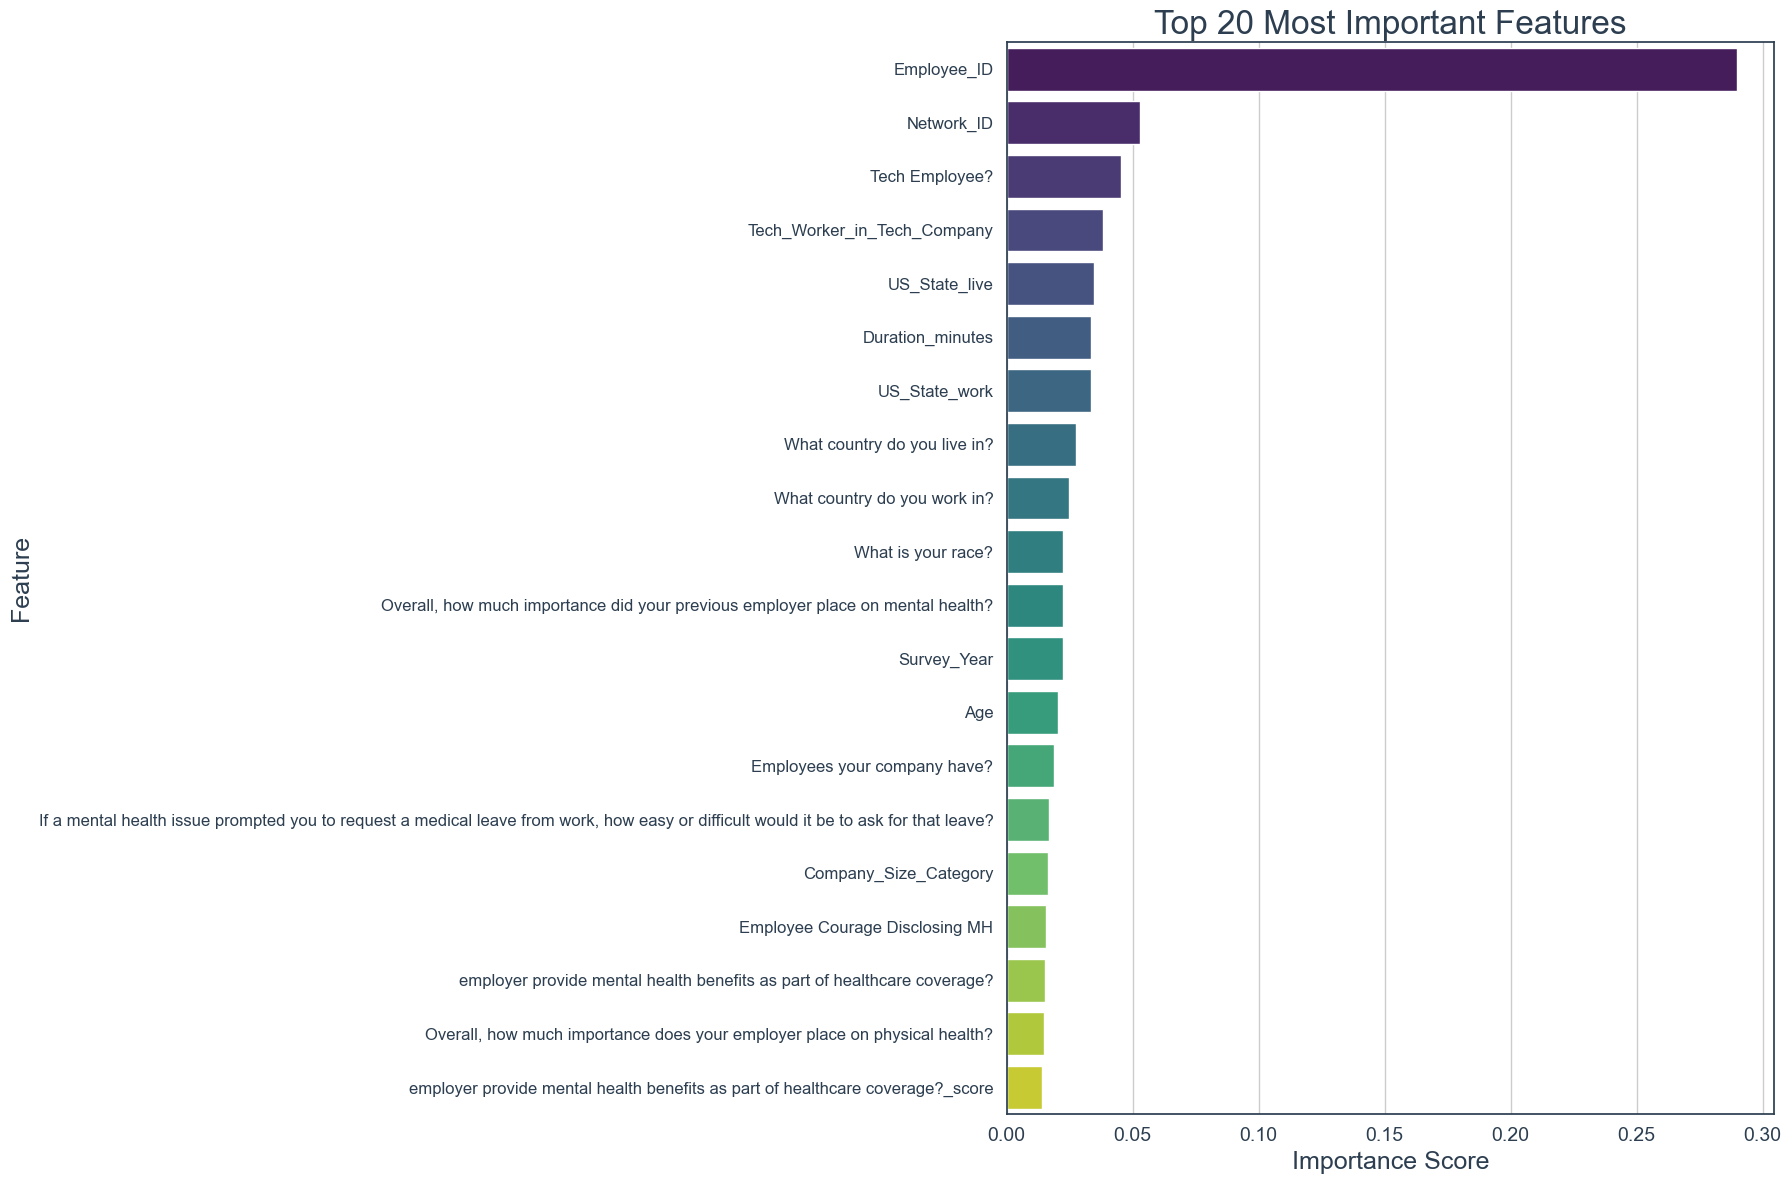

In [536]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(18,12))
sns.barplot(
    x=importances[indices][:20],
    y=X_train.columns[indices][:20],
    orient='h',
    palette="viridis"
)

plt.title("Top 20 Most Important Features", fontsize=24)
plt.xlabel("Importance Score", fontsize=18)
plt.ylabel("Feature", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

#### Class Distribution

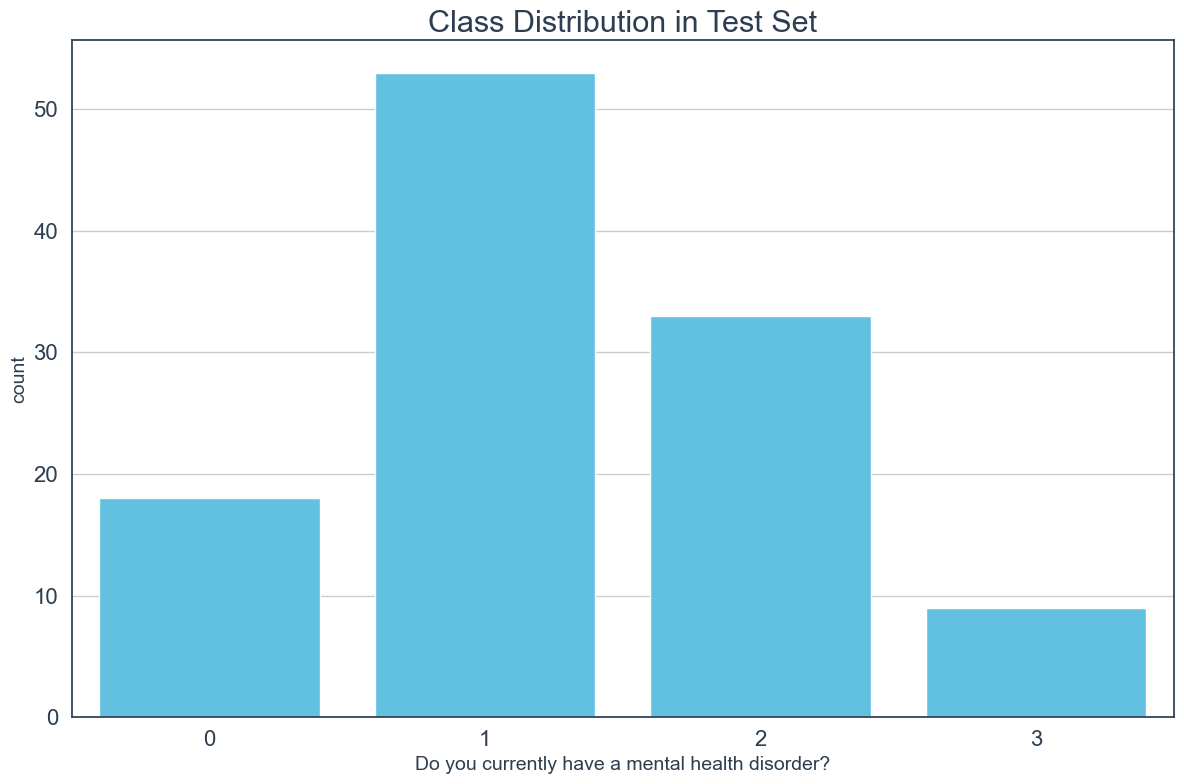

In [537]:
plt.figure(figsize=(12,8))
sns.countplot(x=y_test)
plt.title("Class Distribution in Test Set", fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Actual vs Predicted

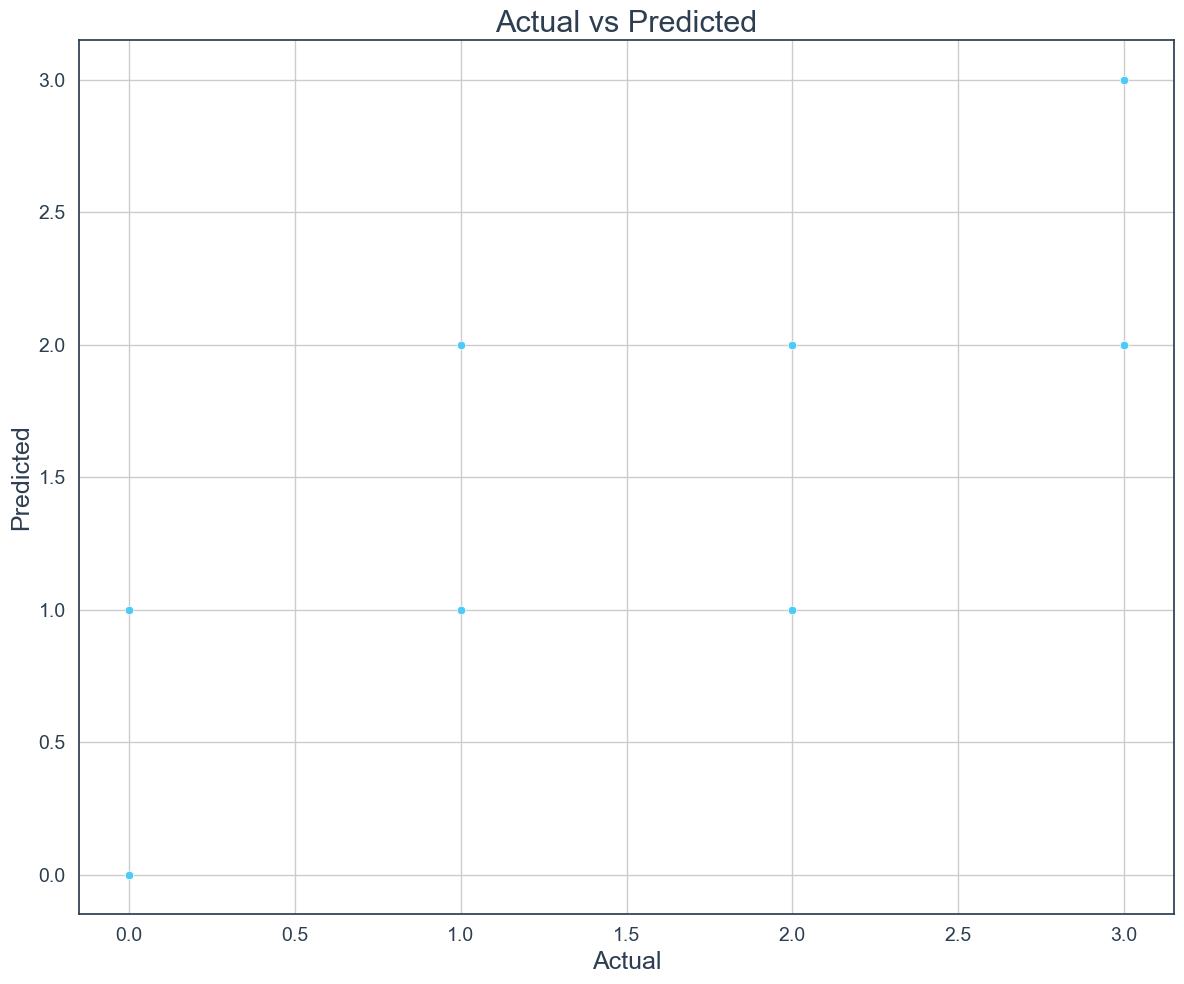

In [538]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Actual vs Predicted", fontsize=22)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### **CatBoost Model**

### SETUP

**Import Libraries**

In [555]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

from catboost import CatBoostClassifier, Pool

**Load & Prepare Data**

In [540]:
df = CTRl_MIND_DF.copy()

target = "Do you currently have a mental health disorder?"
df = df.dropna(subset=[target])


**Encode TARGET Only**

In [541]:
le_target = LabelEncoder()
df[target] = le_target.fit_transform(df[target])

**Convert Age (18-24 → 21) + Keep categories as they are**

In [542]:
def convert_age(age):
    if isinstance(age, str) and "-" in age:
        a, b = age.split("-")
        return (int(a) + int(b)) / 2
    return age

if "What is your age?" in df.columns:
    df["What is your age?"] = df["What is your age?"].apply(convert_age)

**Split Features / Target**

In [543]:
X = df.drop(columns=[target])
y = df[target]


**Identify Categorical and Numeric Columns**

In [544]:
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object", "category"]).columns.tolist()

**Impute Missing Values**

In [545]:
# numeric
imp_num = SimpleImputer(strategy="median")
X[numeric_cols] = imp_num.fit_transform(X[numeric_cols])

# categorical
imp_cat = SimpleImputer(strategy="most_frequent")
X[categorical_cols] = imp_cat.fit_transform(X[categorical_cols])

**Apply Label Encoding ONLY to categorical features**

In [546]:
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

**Apply SMOTE**

In [547]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

**Train/Test Split**

In [548]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.25,
    random_state=42,
    stratify=y_resampled
)

**CatBoost Model**

In [549]:
model = CatBoostClassifier(
    iterations=600,
    learning_rate=0.05,
    depth=8,
    loss_function="MultiClass",
    eval_metric="TotalF1",
    verbose=False
)

**CatBoost Model Training**

In [550]:
train_pool = Pool(X_train, y_train, cat_features=categorical_cols)
test_pool  = Pool(X_test,  y_test,  cat_features=categorical_cols)

model.fit(train_pool)

### ModelEvaluation

In [551]:
y_pred = model.predict(test_pool)

print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       454
           1       0.86      0.91      0.88       453
           2       0.87      0.88      0.87       454
           3       0.98      0.95      0.96       453

    accuracy                           0.92      1814
   macro avg       0.92      0.92      0.92      1814
weighted avg       0.92      0.92      0.92      1814


--- Confusion Matrix ---
[[426  23   5   0]
 [  6 414  33   0]
 [  0  47 399   8]
 [  1   0  23 429]]


### Confusion Matrix

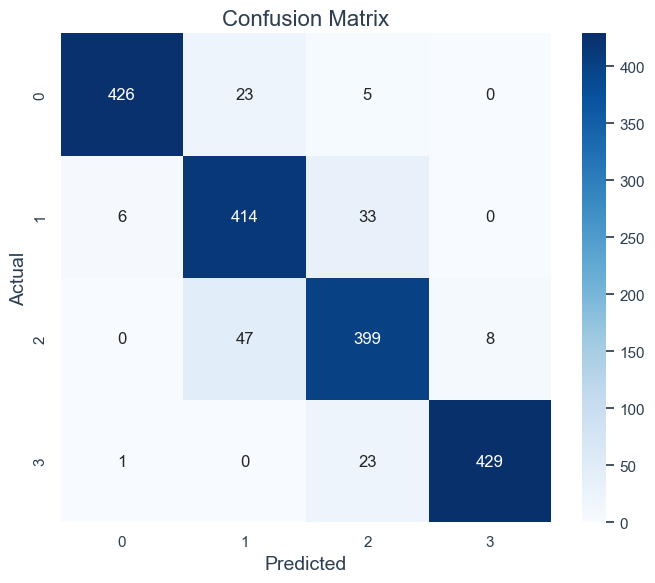

In [552]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Classification Report

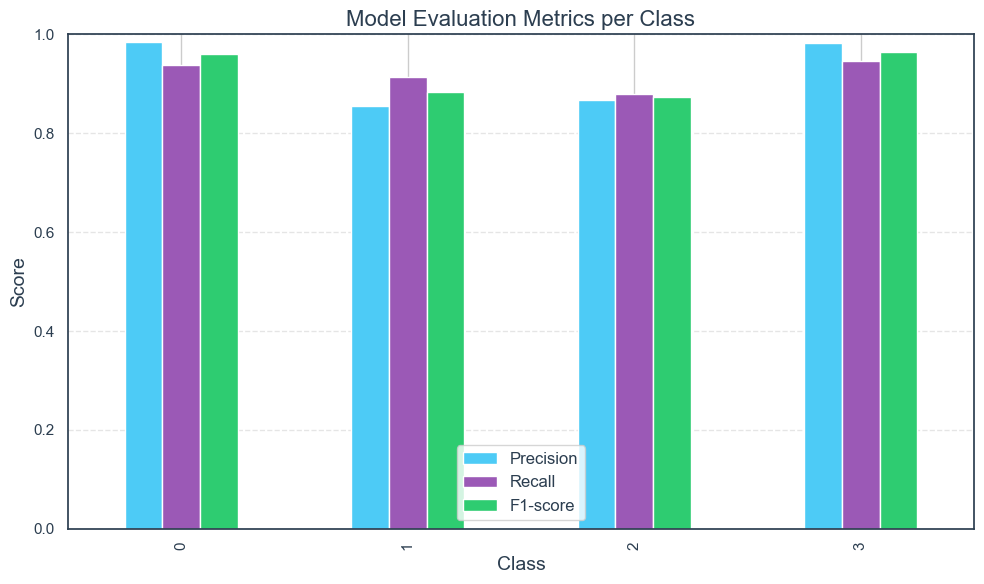

In [553]:
from sklearn.metrics import precision_recall_fscore_support

# استخراج المقاييس
prec, rec, f1, sup = precision_recall_fscore_support(y_test, y_pred)

df_scores = pd.DataFrame({
    "Class": range(len(prec)),
    "Precision": prec,
    "Recall": rec,
    "F1-score": f1
})

df_scores.plot(x="Class", kind="bar", figsize=(10,6))
plt.title("Model Evaluation Metrics per Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


#### Feature Importance

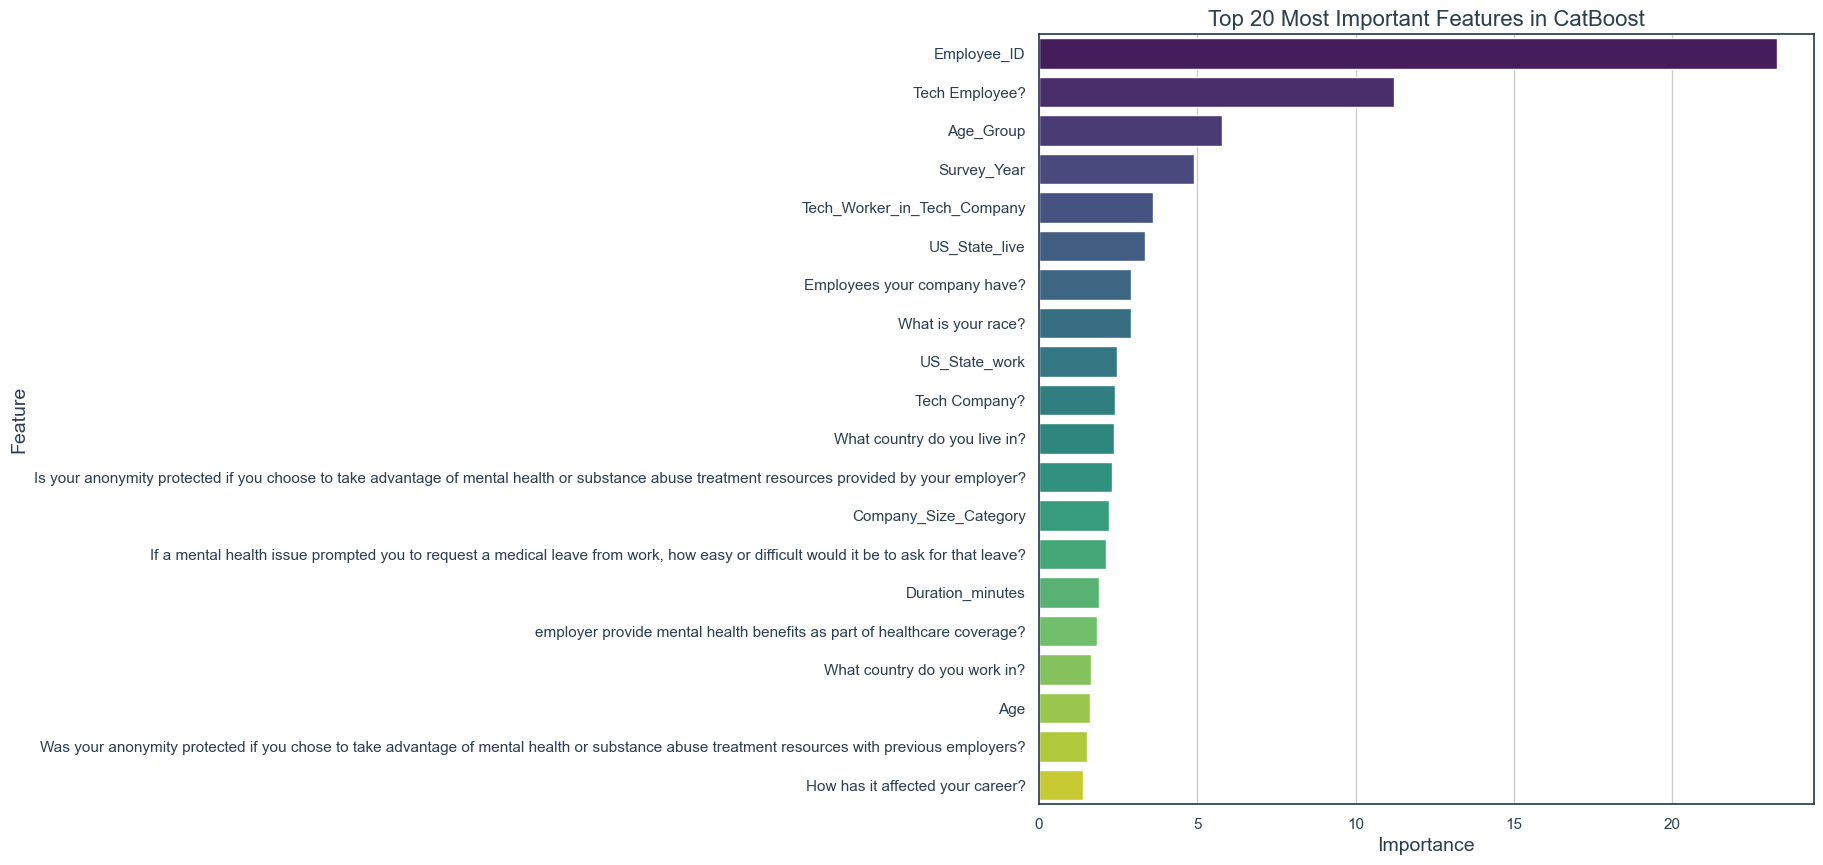

In [554]:
feature_importance = model.get_feature_importance()
feature_names = X_train.columns

# تحويلها إلى DataFrame
fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values("Importance", ascending=False)

# أخذ أعلى 20
fi_top20 = fi_df.head(20)

# رسمها
plt.figure(figsize=(10, 10))
sns.barplot(data=fi_top20, x="Importance", y="Feature", palette="viridis")
plt.title("Top 20 Most Important Features in CatBoost", fontsize=16)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()